  # **IMDB Movie Dataset Analysis**

# **Introduction To  Dataset Analysis**

In this analysis, I explored the IMDb movie dataset, which contains information about the top 1000 movies available on IMDb. The dataset is a resource for understanding the characteristics and trends of popular movies, providing insights into factors that contribute to a movie's success.

The analysis encompassed several key steps, including data cleaning, exploratory data analysis (EDA), data visualization, and correlation analysis. Each step aimed to uncover valuable insights and patterns within the dataset.

Through data cleaning, I ensured that the dataset was ready for analysis by addressing missing values and ensuring proper data types. EDA involved summarizing and visualizing the data to gain a better understanding of its distribution and characteristics. Visualizations such as histograms, scatter plots, and bar plots were employed to highlight trends and relationships within the data.

Correlation analysis allowed me to investigate potential relationships between movie attributes, such as IMDb rating and gross revenue, shedding light on whether specific factors influenced a movie's success. Additionally, genre analysis provided insights into how movie genres have evolved over the years and identified changing audience preferences.

Overall, this analysis aimed to uncover valuable insights into the world of cinema, providing a data-driven perspective on what makes a movie successful and how movie genres have evolved over time.

  ### **Description of IMDB Movie Dataset**

The IMDb movie dataset is a comprehensive collection of information about the top 1000 movies available on IMDB, a popular online database of movies and television shows. The dataset is structured in a tabular format(csv) and contains various details about these movies, allowing for in-depth analysis and exploration. Here are some key attributes gathered from the dataset:



*   **Columns:**The dataset comprises several columns, including but not limited to:

  1. **`Poster_Link`:** Contains links to movie posters.
  2. **`Series_Title`:** Represents the title of the movies or series.
  3. **`Released_Year`:** Indicates the year in which the movie was released.
  4. **`Certificate`:** Contains the movie's certification rating.
  5. **`Runtime`:** Represents the movie's duration in minutes.
  6. **`Genre`:** Describes the genre(s) of the movie.
  7. **`IMDB_Rating`:** Contains the IMDb rating of the movie, which is a score between 0 and 10.
  8. **`Overview`:** Provides a brief overview or summary of the movie.
  9. **`Meta_Score`:** Represents the metascore of the movie, indicating critical reception.
  10. **`Director:`** Names the director(s) of the movie.
  11. **`Star1`**, **`Star2`**, **`Star3`**, **`Star4`:** Lists major stars in the movie.
  12. **`No_of_Votes`:** Indicates the number of votes given by IMDb users.
  13. **`Gross`:** Represents the gross revenue earned by the movie in dollars.


## **Analysis Steps:**

1.   **Data Cleaning:** I began by cleaning the dataset, addressing missing values, and ensuring that columns have the correct data types.

2. **Exploratory Data Analysis(EDA):** I performed EDA, which includes visualizing and summarizing the data to understand its distribution and characteristics better. This step helps in identifying patterns and trends within the dataset.

3. **Data Visualization:**  performed EDA, which includes visualizing and summarizing the data to understand its distribution and characteristics better. This step helps in identifying patterns and trends within the dataset.

4. **Correlation Analysis:** I explored potential correlations between movie attributes, such as IMDb rating and gross revenue, to determine if certain factors influence a movie's success.

5. **Genre Analysis:** I separated and analyzed movie genres, which allowed me to understand the distribution of genres over the years and identify trends in movie preferences.

## **Data Cleaning Stage**

Firstly, **Import of Neccessary Libraries:** Pandas, Matplotlib, Seaborn.

**`from google.colab import drive`**: this line imports the necessary library (drive) from Google Colab. Since I used colab as my preferred notebook environment to work with.

**`drive.mount('/content/drive')`:** This command mounts my google Drive to the Colab environment. This prompted me to authorize access to my google drive account. Once authorized, my google drive will be accessible within the Colab environment at the path **`/content/drive.`**

**`# load the Dataset into a DataFrame`**

`df = pd.read_csv('/content/imdb_top_1000.csv'):` This step began with first loading the dataset into a dataframe called `df`

**`# view first five rows`**

`df.head()`: Checked the first five rows to have a glance of dataframe

**`# check information and summary of DataFrame's structure`**

`df.info()`: Used this method to provide a concise summarty of the DataFrame's structure and content, including:

*   number of rows and columns in the DataFrame,
*   column names and their data types.


*   number of non-null values in each column.
*   Memory usage information, which indicates the memory footprint of the DataFrame.

The DataFrame had a total of 1000 entries. With attributes like `Certificate`, `Meta_Score`, `Gross`, with some missing entries.


**# make copy of dataframe**

`df_copy = df.copy():` I made a copy of the DataFrame. This was done to ensure original DataFrame remains unchanged.


**# Data Cleaning Checking Missing Values**

`missing_values = df_copy.isnull().sum()`
`missing_values`
Checking for missing or null values and summing up all missing values which is assigned to the variable `missing_values`.
Columns; `Certificate` had `101`, `Meta_Score` had `157`, `Gross` had `169` missing/null values.

**In addressing missing values for various attributes**


1.   I ignored missing values in the *`Certificate`* column since it is made up of string data and can't be filled or imputed with just any data

2.   For *`Meta_Score`* column I filled missing entries with zeros. `df_copy['Meta_score'].fillna(0, inplace=True)`

3.   For *`Gross`* column I filled missing entries with zeros. `df_copy['Gross'].fillna(0, inplace=True)`

checked the DataFrame again to see if all changes were effected
`df_copy.info()`

**# Converting 'Released_Year' to datetime format**

`df_copy['Released_Year'] = pd.to_datetime(df['Released_Year'], format='%Y').dt.year`. From the DataFrame it appears the attribute `Released_Year` was formatted as string. Since it contains dates it should be converted to `datetime` format

**# Entry for 'Released_Year' in row number 966 had a wrong value(PG) instead of year**

`filter_out = df_copy.loc[df_copy['Released_Year'] == 'PG']`

`filter_out:` Used `loc` to pullout dataframe with entry giving error as `PG`

**# Luckily for that entry, the 'Released_Year' is available on the internet**

`df_copy[df_copy['Released_Year'] == 'PG'] = 1995` Entry was corrected with its associated value from the internet.

**# checking again to see if any entry for 'Released_Year' has incorrect data**

`df_copy.loc[df_copy['Released_Year'] == 'PG']`
The result yielded empty dataframe. Since all values corrected for `Released_Year` column.

**# converting 'Released_Year' to datetime format**

`df_copy['Released_Year'] = pd.to_datetime(df_copy['Released_Year'], format='%Y').dt.to_period('Y')`.         Converting the `Released_Year` column to `datetime` format and extracting just the `Year` part. This conversion was done for the second time, because a wrong entry was corrected.

**# converting 'Gross' to numeric format since it appears to be a string**

`df_copy['Gross'] = df_copy['Gross'].str.replace(',', '').astype('Int64')`
Removing commas from the `Gross` column and converts the column's data type to integer.

**# converting 'Gross' to numeric format since it appears to be a string**
`df_copy['Gross'] = df_copy['Gross'].str.replace(',', '').astype('Int64')`

Converting `Gross` column's data type to an integer data type. Initially it was just string

**# Changing the 'Runtime' format to int, taking away 'min' suffix**
Changing the `Runtime` column from `string` format to `integer` through these steps:

*   `df_copy['Runtime'] = df_copy['Runtime'].astype(str)` Firstly, calling `str` method on the column to a string data type.
*   `df_copy['Runtime'] = df_copy['Runtime'].str.extract('(\d+)', expand=False)`
Then I extracted the first group of digits in `Runtime` column of the DataFrame and replace the cloumn with these extracted values.
*   `df_copy['Runtime'] = pd.to_numeric(df_copy['Runtime'], errors='coerce')`
Next, I convert `Runtime` column to a numeric data type. If any errors are encountered during conversion(like a value can't be converted to a number), those values are replaced with `NaN` due to `errors=coerce` argument


*   `df_copy['Runtime'].fillna(0, inplace=True)`
Then I replace all the missing or `NaN` values in the `Runtime` column with `0`.
*   `df_copy['Runtime'] = df_copy['Runtime'].astype(int)`
Finally convert `Runtime` column to an integer data type by calling the `astype` method with `int` as argument on the column.


**# Checking for duplicated rows**

`from pandas._libs.hashtable import duplicated`
This line of code imports the `duplicated` function from the `hashtable` module in the `pandas._libs` package which is used to check for duplicate values.

`duplicate_rows = df_copy[df_copy.duplicated()]`
Trying to find all duplicate rows and store result in the variable `duplicate_rows`

**# Counting the number of duplicated rows**

`num_duplicates = duplicate_rows.shape[0]`
Here I calculate the number of duplicate rows in the DataFrame by getting the number of rows(first dimension) of the `duplicate_rows` DataFrame.


## **Exploratory Data Analysis (EDA)**

**# Checking summary statistics of dataframe**

`df_copy.describe()`
Here I used pandas `describe` function to provide statistics of the DataFrame. It gives a summary of the central tendency, dispersion, and shape of the distribution of a dataset, excluding NaN values. The output includes count, mean, standard deviation, minimum and maximum values, and the quantiles of the data.

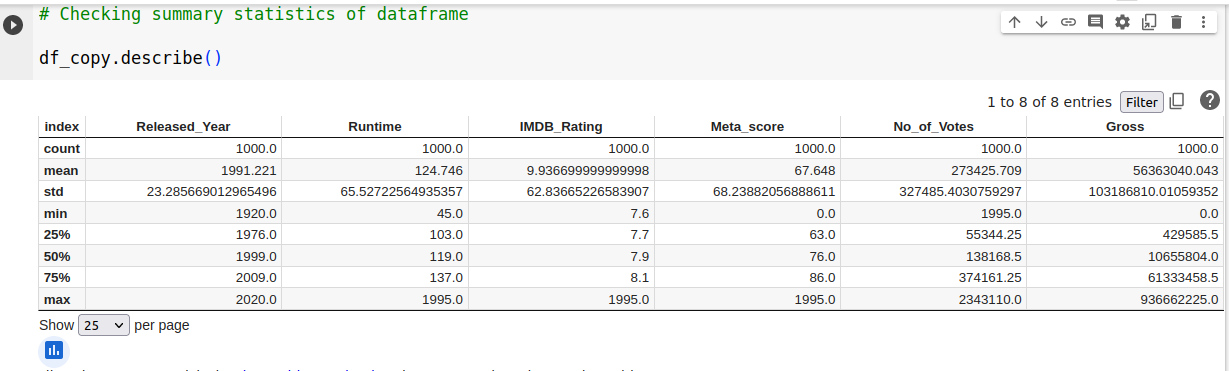

### Inference from the table.
1.   **Released Year (Released_Year):**
    * The dataset includes movies released between 1920 and 2020, indicating a wide range of historical movie data.

    * The majority of the movies fall within the range of 1976 to 2009 (25th to 75th percentiles), suggesting a concentration of movies from this period.

    * There are no missing values in this column (count equals 1000), indicating complete data for movie release years.
2.   **Runtime:**
    * The dataset includes movies released between 1920 and 2020, indicating a wide range of historical movie data.

    * The majority of the movies fall within the range of 1976 to 2009 (25th to 75th percentiles), suggesting a concentration of movies from this period.

    * There are no missing values in this column (count equals 1000), indicating complete data for movie release years.

3.   **IMDB Rating:**
    * IMDB_Ratings range from a minimum of 7.6 to a maximum of 1995.0, with the majority of ratings concentrated between 7.7 and 8.1 (25th to 75th percentiles).
    
    * The average IMDb rating is approximately 9.94, indicating that, on average, the movies in the dataset have high ratings.
    
    * However, the presence of the extremely high maximum rating (1995.0) suggests the possibility of outliers or errors in the data.

4.   **Meta_score:**
    * The Metascore values also exhibit a wide range, with a minimum of 0.0 and a maximum of 1995.0.

    * The 25th percentile (Q1) is 63.0, and the 75th percentile (Q3) is 86.0, suggesting that the majority of movies have Metascores between these values.

    * The presence of a minimum Metascore of 0.0 could indicate missing or poorly rated movies in the dataset.

5. **Number of Votes(No_of_Votes):**
    * The number of votes varies widely, with a minimum of 1995 and a maximum of 2,343,110.

    * The 25th percentile (Q1) is 55,344.25, and the 75th percentile (Q3) is 374,161.25, indicating that most movies have a moderate number of votes.
    
    * The dataset contains no missing values for the number of votes.

6. **Gross Revenue(Gross):**
    * Gross revenue also exhibits significant variability, with a minimum of 0.0 and a maximum of 936,662,225.0 (approximately 936 million dollars).

    * The dataset shows a wide range of revenue figures, with a substantial difference between the 25th percentile (Q1) and the 75th percentile (Q3).

    * There are no missing values in the gross revenue column. Because all missing entries were imputed with `0`.
**# Exploring Relationship Between Variables**

`plt.style.use('Solarize_Light2')`:
First I set the style of the plot to be `Solarize_light2`.

`sns.pairplot(df_copy)`:
Then went on to create a pairplot of scatterplots where each variable is plotted against every other variable. This was to visualize the relationships between all pairs of variables.


**# Distribution of IMDB Ratings**

`fig, ax = plt.subplots(figsize=(15, 10))`: Creating a new figure with a single subplot and size of `15` by `10` and assign the figure and axes objects to the variables `fig` and `ax`

**# Create a histogram on the axes created by plt.subplots()**

`sns.histplot(df['IMDB_Rating'], bins=20, kde=True, ax=ax)`: Here a histogram of the `IMDB_Rating` column is plotted. It uses 20 bins, indcludes a kernel density estimate(KDE), and plots it on the axes `ax`.

**# Set the title and labels**

`ax.set(title='Distribution of IMDB Ratings', ylabel='Frequency', xlabel='IMDB Rating')`: I set the title of the plot to **'Distribution of IMDB Ratings'**, the label of the `y-axis` to `Frequency` and label `x-axis` to **'IMDB Rating'**

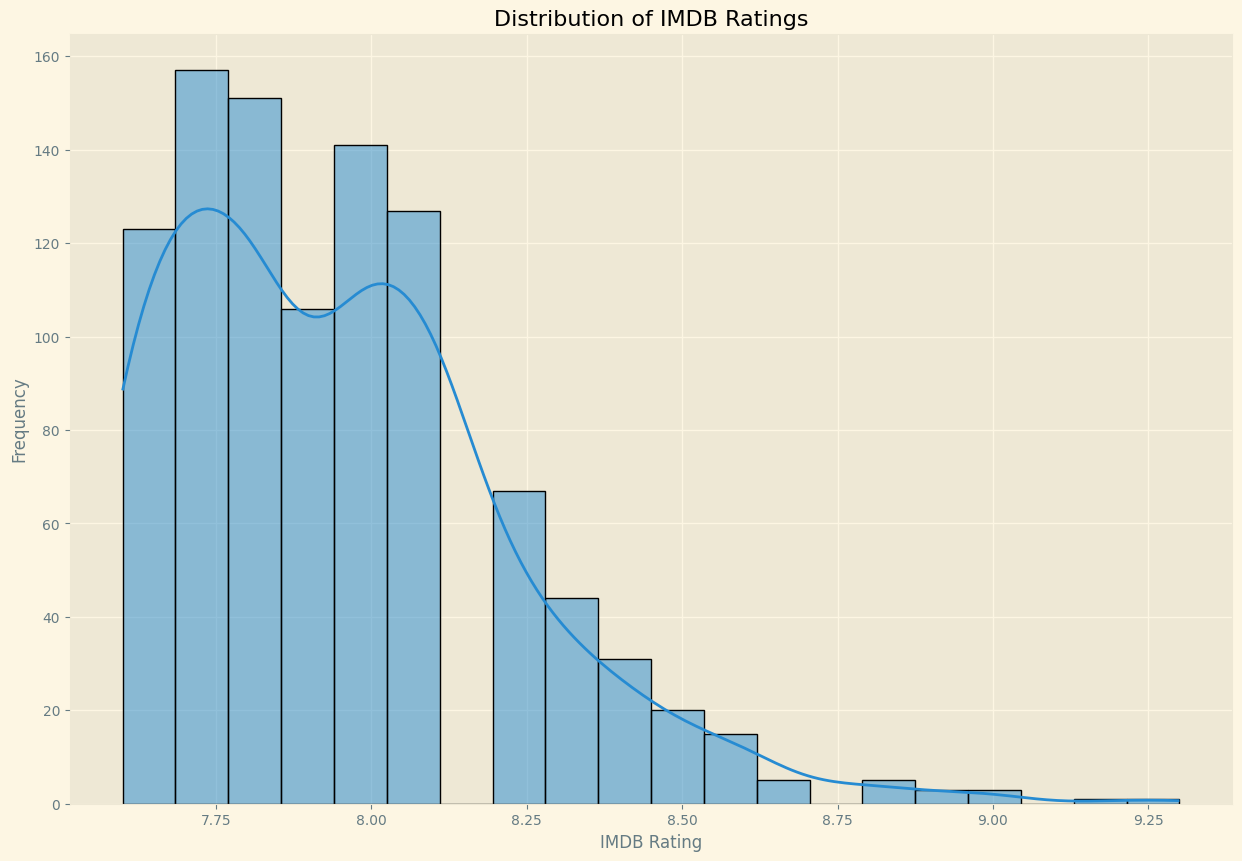

## Inference from the Histogram Plot.

**X-axis (IMDB Rating)**: This represents the IMDB rating of movies. The ratings range from 7.75 to 9.25.

- **Y-axis (Frequency)**: This represents the frequency of movies with a particular IMDB rating. The frequency ranges from 0 to 160.

- **Bars**: Each bar represents the number of movies (frequency) that have a certain IMDB rating. For example, the highest bar corresponds to a rating of 8.25, indicating that around 140 movies have this rating.

- **Trend**: The graph shows a downward trend, meaning that as the IMDB rating increases, fewer movies achieve that rating. This makes sense as higher ratings are harder to achieve.


**# Distribution of Individual movie Genres**
**# Split the genres and expand them into separate rows**

`expanded_df = df_copy.assign(Genre=df_copy['Genre'].str.split(', ')).explode('Genre')`: Checking the distribution  of individual movie Genres. This line splits the `Genre` column into multiple rows, expanding the DataFrame so that each genre is in a separate row for each movie. and then stored in `expanded_df`.

**# Get the count of each genre**

`genre_counts = expanded_df['Genre'].value_counts()`: In this line, I split the `Genre` column into multiple rows, expanding the DataFrame so that each genre is in a separate row for each movie. And then stored in `expanded_df`.

**# Get the top 10 genres**

`top_genres = genre_counts`: In this line `top_genres = genre_counts` is assigning the variable `genre_counts` to a new variable called `top_genres`. This means that the frequency of each genre, which was calculated and stored in `genre_counts`, is now also stored in `top_genres`.

**# Create a bar plot**

`fig, ax = plt.subplots(figsize=(15,10))`

`sns.barplot(y=top_genres.index, x=top_genres.values)`

`ax.set(title='Movie Genres Distribution', xlabel='Count', ylabel='Genre')`

`plt.show()`: create a bar plot of movie genres distribution using the seaborn library. Here's a brief explanation of each line:

- `fig, ax = plt.subplots(figsize=(15,10))`: This line creates a new figure with a single subplot. The `figsize` parameter sets the width and height of the figure in inches.

- `sns.barplot(y=top_genres.index, x=top_genres.values)`: This line creates a bar plot using seaborn (sns). The y-axis represents the genres (taken from the index of `top_genres`), and the x-axis represents the count of each genre (taken from the values of `top_genres`).

- `ax.set(title='Movie Genres Distribution', xlabel='Count', ylabel='Genre')`: This line sets the title of the plot and labels for the x and y axes.

- `plt.show()`: This line displays the plot.

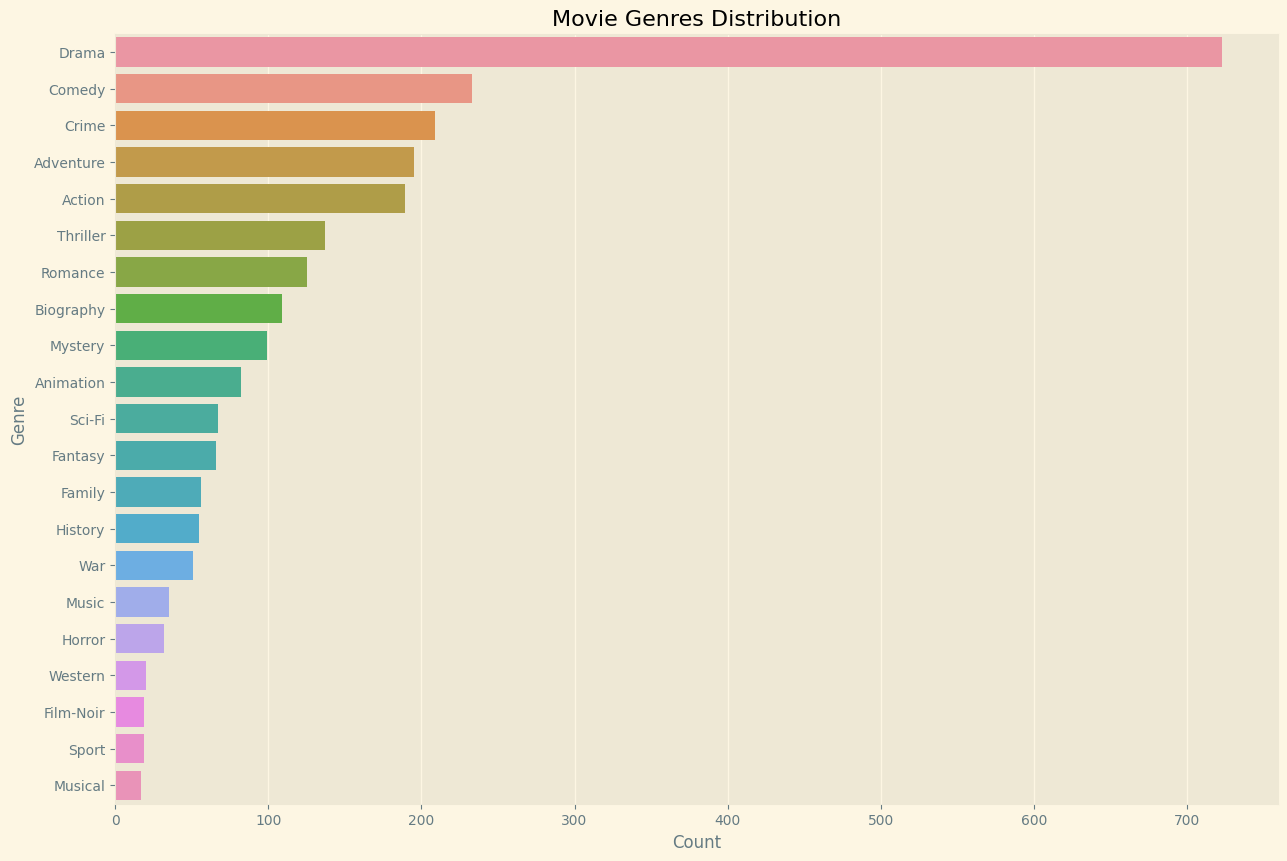

## Inference from the Bar Plot.

From the bar plot titled we can infer the following:

- **Drama** is the most common genre, with a count of around 700. This suggests that a significant number of movies fall under the Drama category.
- The **Musical** genre has the lowest count, around 50, indicating that it is the least common among the represented genres.
- The distribution of genres is uneven, with only a few genres making up the majority of movies.


**# Correlation Heatmap of Variables**

`corr_matrix = df_copy.corr()`

`fig, ax = plt.subplots(figsize=(15, 10))`

`sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')`

`ax.set(title='Correlation Heatmap')`

`plt.show()`: created a correlation heatmap. Here's a brief explanation of each line:

- `corr_matrix = df_copy.corr()`: This line calculates the pairwise correlation of columns in the dataframe `df_copy`. The result is stored in `corr_matrix`.

- `fig, ax = plt.subplots(figsize=(15, 10))`: This line creates a new figure with a single subplot. The `figsize` parameter sets the width and height of the figure in inches.

- `sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')`: This line creates a heatmap using seaborn (sns). The heatmap represents the correlation matrix. The `annot` parameter is set to True, which means that the correlation values will be written on each cell of the heatmap. The `cmap` parameter is set to 'coolwarm', which means that the colors of the heatmap will range from cool to warm colors.

- `ax.set(title='Correlation Heatmap')`: This line sets the title of the plot.

- `plt.show()`: This line displays the plot.

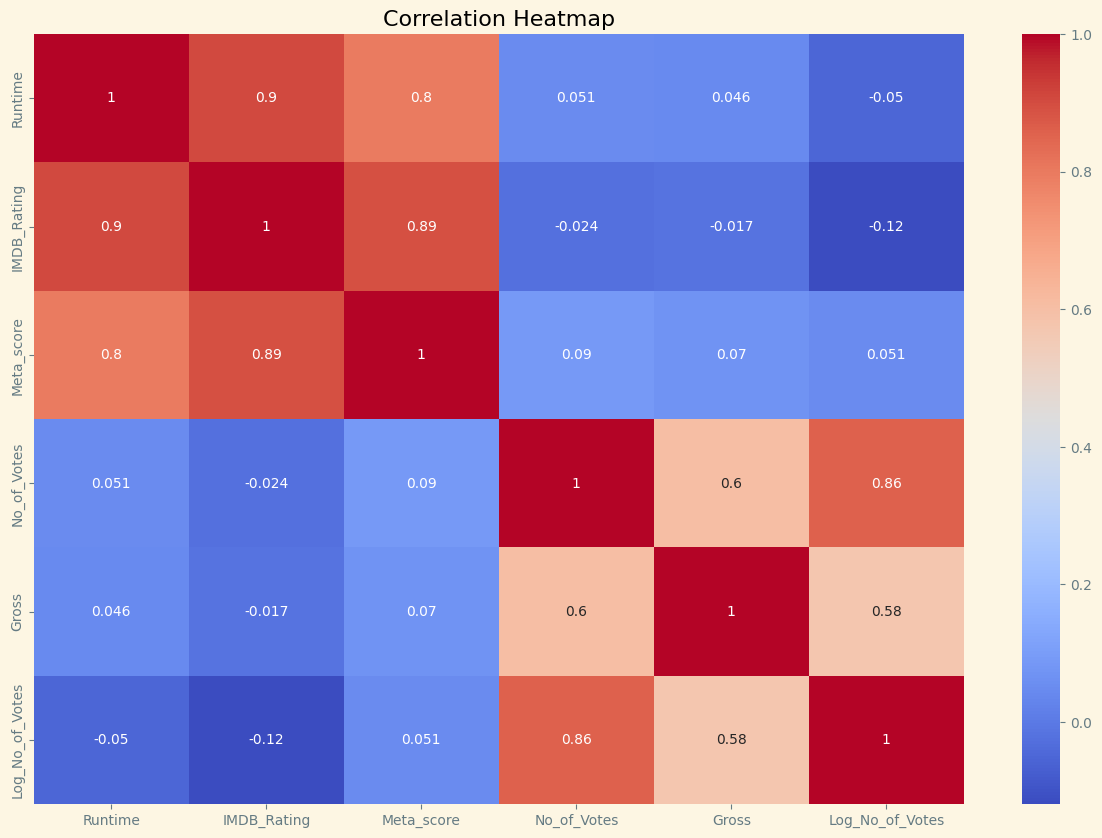

## Inference from the Heatmap Plot.
From the correlation heatmap, we can infer that:

1. **Runtime and IMDb Rating (0.9):** There is a strong positive correlation between a movie's runtime and its IMDb rating. This suggests that longer movies tend to receive higher IMDb ratings, indicating a potential preference for longer, more immersive films.

2. **Runtime and Meta Score (0.8):** There is a strong positive correlation between a movie's runtime and its Meta score. This implies that movies with longer runtimes often receive higher Meta scores from critics.

3. **No_of_Votes and Gross (0.6):** There is a moderate positive correlation between the number of votes a movie receives and its gross revenue. This suggests that more popular movies, as indicated by higher vote counts, tend to generate higher gross revenues.

4. **IMDb Rating and Meta Score (0.89):** There is a strong positive correlation between a movie's IMDb rating and its Meta score. This indicates that movies with high IMDb ratings also tend to receive high Meta scores, reflecting a consensus between user and critic reviews.

5. **No_of_Votes and Meta Score (0.09):** The correlation between the number of votes and Meta score is positive but weak. This suggests that the number of votes a movie receives has a limited impact on its critical reception.

6. **No_of_Votes and IMDb Rating (-0.024):** There is a very weak negative correlation between the number of votes and IMDb rating. This implies that highly rated movies do not necessarily receive a significantly higher number of votes.

7. **Gross and No_of_Votes (0.6):** There is a moderate positive correlation between a movie's gross revenue and the number of votes it receives. This indicates that financially successful movies often attract a larger audience and, consequently, more votes.

8. **Gross and IMDb Rating (-0.017):** There is a very weak negative correlation between a movie's gross revenue and IMDb rating. This suggests that high gross revenue does not guarantee a high IMDb rating.

 Longer runtimes tend to be associated with higher ratings and critic scores, while the number of votes and gross revenue are positively related. Additionally, there is a strong alignment between IMDb ratings and Meta scores, indicating a degree of agreement between user and critic evaluations.



 **# Top 10 Directors by Number of Movies**
Here I created a bar plot of the Top 10 Directors by the number of movies they have directed.
 `top_directors = df_copy['Director'].value_counts()[:10]`: This line counts the number of movies each director in the ‘Director’ column of df_copy has directed, and selects the top 10 directors with the most movies.

`fig, ax = plt.subplots(figsize=(15,10))`: This line creates a new figure with a single subplot. The figsize parameter sets the width and height of the figure in inches.

`sns.barplot(y=top_directors.index, x=top_directors.values)`: This line creates a bar plot using seaborn (sns). The y-axis represents the directors (taken from the index of top_directors), and the x-axis represents the count of movies each director has directed (taken from the values of top_directors).

`ax.set(title='Top 10 Directors by Number of Movies', xlabel='Count', ylabel='Director')`: This line sets the title of the plot and labels for the x and y axes.

`plt.show()`: This line displays the plot.

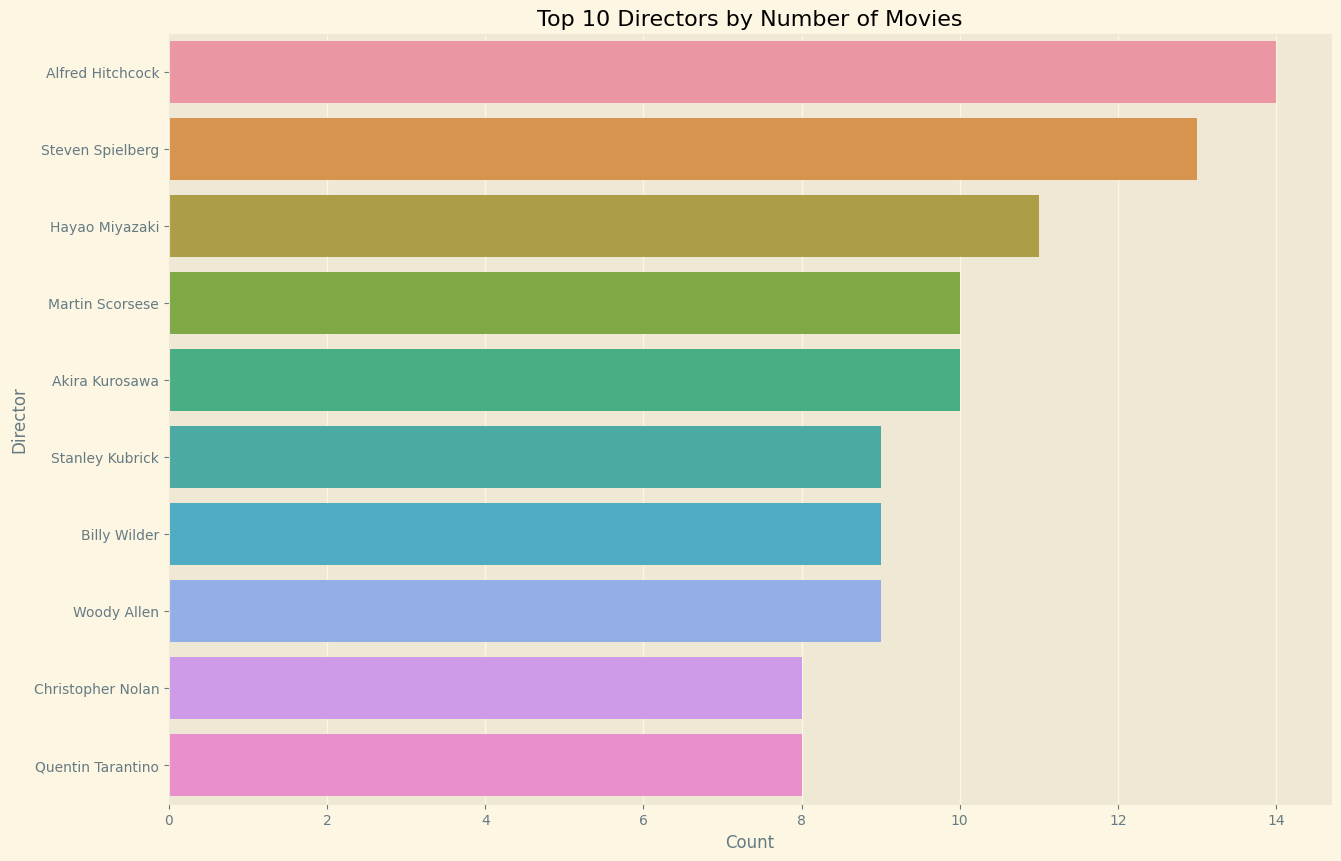

## Inference from the Bar Plot.
From the bar plot above, we can infer the following:

Alfred Hitchcock has directed the most movies among the top 10 directors, with a count of 14. This suggests that Alfred Hitchcock has had a prolific career in terms of the number of movies directed.

Steven Spielberg is the second most prolific director with 13 movies.

Quentin Tarantino has the least number of movies among the top 10 directors, with a count of 8. However, being in the top 10, Tarantino is still among the more prolific directors.

Other directors on the list include Hayao Miyazaki, Martin Scorsese, Stanley Kubrick, Billy Wilder, Woody Allen, and Christopher Nolan. This suggests that these directors have also had significant careers in terms of the number of movies directed.

**# Relationship between IMDB Rating and Gross Revenue**

Created a scatter plot of the relationship between IMDB Rating and Gross Revenue using the seaborn library in Python. Here’s a brief explanation of each line:

`fig, ax = plt.subplots(figsize=(15,10))`: This line creates a new figure with a single subplot. The figsize parameter sets the width and height of the figure in inches.

`sns.scatterplot(y='IMDB_Rating', x='Gross', data=df_copy)`: This line creates a scatter plot using seaborn (sns). The y-axis represents the IMDB Rating and the x-axis represents the Gross Revenue.

`ax.set(title='IMDB Rating vs. Gross Revenue', ylabel='IMDB Rating', xlabel='Gross Revenue')`: This line sets the title of the plot and labels for the x and y axes.

`plt.show()`: This line displays the plot.

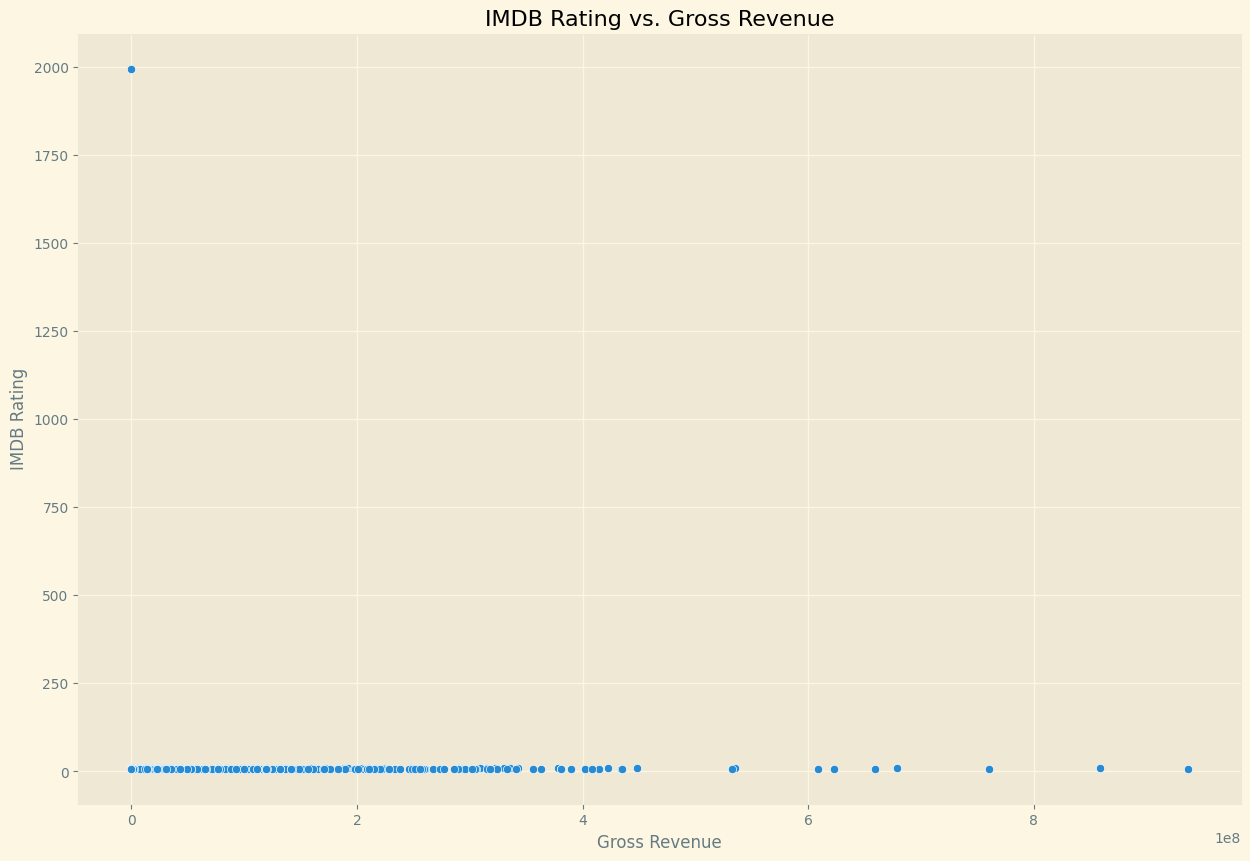

## Inference from the Scatter Plot.

From the scatter plot titled "IMDB Rating vs. Gross Revenue", we can infer the following:

- There is a wide range of Gross Revenue and IMDB Ratings represented in the data, as indicated by the spread of dots across the graph.

- There is a higher concentration of movies with lower Gross Revenue and lower IMDB Ratings, as indicated by the higher density of dots in the lower left corner of the graph. This suggests that most movies do not achieve high box office revenues or high IMDB ratings.

- There are a few movies with high Gross Revenue and high IMDB Ratings, as indicated by the outlier dots in the top right corner of the graph. These could represent blockbuster or critically acclaimed movies.

- The scatter plot does not show a clear linear relationship between Gross Revenue and IMDB Rating. This suggests that a movie's box office success (Gross Revenue) does not necessarily correlate with its critical success (IMDB Rating).

## Certificate Distribution
Made a bar plot of the distribution of movie certificates using the seaborn library in Python. Here's a brief explanation of each line:

- `certificate_counts = df_copy['Certificate'].value_counts()`: This line counts the number of movies for each certificate in the `Certificate` column of `df`. The result is stored in `certificate_counts`.

- `fig, ax = plt.subplots(figsize=(15,10))`: This line creates a new figure with a single subplot. The `figsize` parameter sets the width and height of the figure in inches.

- `sns.barplot(y=certificate_counts.index, x=certificate_counts.values)`: This line creates a bar plot using seaborn (sns). The y-axis represents the certificates (taken from the index of `certificate_counts`), and the x-axis represents the count of movies for each certificate (taken from the values of `certificate_counts`).

- `ax.set(title='Distribution of Certificates', ylabel='Certificate', xlabel='Count')`: This line sets the title of the plot and labels for the x and y axes.

- `plt.show()`: This line displays the plot.

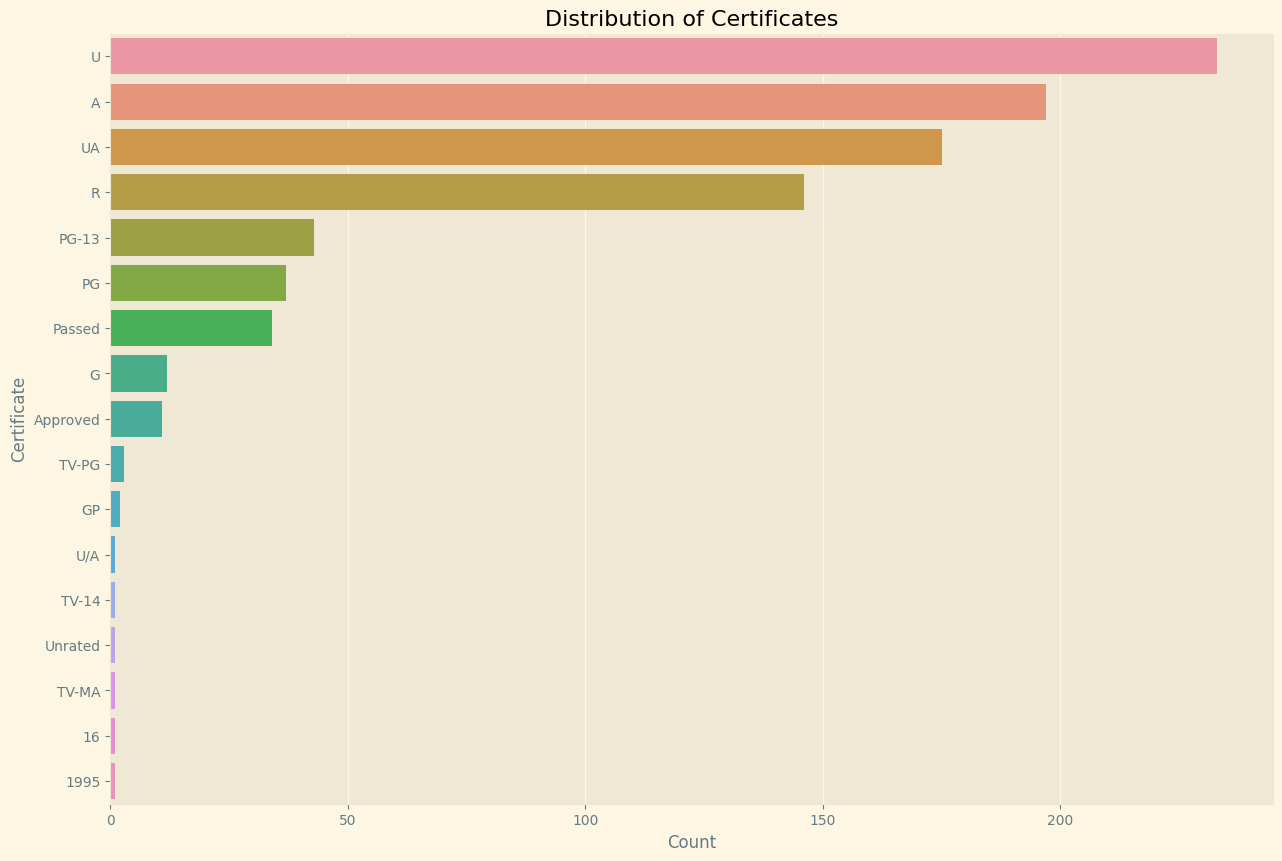

## Inference from the Bar Plot

From the bar plot titled `Distribution of Certificates`, we can infer the following:

- The `certificate` category with the highest count is **"Unapproved"**, with around 200 movies falling under this category. This suggests that a significant number of movies in the dataset did not receive an approval `certificate`.

- The `certificate` category with the second highest count is **"Passed"**, with around 150 movies. This indicates that a substantial number of movies in the dataset passed the certification process.

- The `certificate` category with the lowest count is **"1995-1"**, with around 10 movies. This suggests that very few movies in the dataset fall under this category.

- Other categories include "Approved", "Failed", "Unknown", "THA-4", "THA-3", "THA-2", and "THA-1". The distribution among these categories varies, indicating a diverse range of certification statuses in the dataset.



## **Exploratory Data Analysis (EDA)**

**# Checking summary statistics of dataframe**
`df_copy.describe()`
Here I used pandas `describe` function to provide statistics of the DataFrame. It gives a summary of the central tendency, dispersion, and shape of the distribution of a dataset, excluding NaN values. The output includes count, mean, standard deviation, minimum and maximum values, and the quantiles of the data.

![Screenshot from 2023-09-26 23-32-51.png](
+E37ezGvF6Y9usP9oa7JuV44iBnDfD3G+iTe3iXI9mMn0/pn3luZ58sdzMd+a8/NeTsO8sWsX8f8vaeYrpHmueZU0pf6zYN48up8JG49yzYXpFqQV/b7KAf33EEzw5aOXZI5uXMre07YcOv0I5u3LeS96g/yiMczPOhsgfwP4e7jyaP59rFi9QmMfEF0evtZgqrUpXvPZjxxj8363iMk7fmJnj3m4zHgA5o/euMFl7gZvOJdFr+oN1lWugdDXipP1oPwmdjPsGLoK4y60Jbh3SuRD7B6dWBI1/x83yKIwOBqhLZfQJnefWn8qBNYilC2VmNq1O/K14vWs37hFzRL+5GuPadwzBZPXHwa25bsodLAX1i6ajFfNk/mm9feZ16sYMRfIvb0StYazzNh3kpW/vYuHhvf5fUvd2O3PkNY+JNs/nECGy/YkdSTrBz/M1vsaaSmJpOcYlCgYMbj7RYKFMhPSlLKLRzFvvl1yx9Qk6C4OUyaeYgksRO3exrfLjiJPTWVNLv5fCz5niGseS2iXhjDnLUbWP5dZ4ov7EXXcbuwYXB69geMOteGwe09cMm0ljrjXSOMAsu+5Yed8RiSxOH5XzNzr53U1FQkKY745P0s3fIob/6wiJXLfqRLsdm80XsKMbdyyP5+ZNzJPsks989N49jsfnT5viBvDG2Pe8YVwDjO75/Po3TnjlQqyM2yya8bbo5H0zE5mDtyidUjBrIl8kO6+RfMfJC2RHVqeB9k+tfLOJUGtvObmfTDahJtaaRdn6ydbSNqU75CEP/7/CKNhvQlsqTFPOevxaP9KJNaeVO+ciMG7qpK/4HPUtop96+xxC5i3E9WWnepyQPadwJCfFw8l9ct50SdUfyxYiWzR4RweGRXRmxIzvxU0xgDLA8Q9c5gQv/uRc3A6gQF1mX4ueZ88Eql62/Qctr3prXIQb3/R/IrmxxxWB8fr0rzqJq0/Og3Vm1cxa9ve7Bl4MsMX58EBSrTY2grLgyvR2BQdarV7MX26v3pGV78Rr7kEMtma0VqUhLJLgUpmGHsloIFKUAKickZirajepEHmfYFOPF4y4H0c1tIh5BqBAcG8ux3+ek04Hk8TDvxnGMqfUVfqnj5ENpxKi4vDqN7tULgYDumPVFGWXNRUk17F7mTem8Wyw5y3mw+2n/8uxz36Dn39wBJGycy8WR9Xmv62PU3mLZDP/Dut4XpPrAZj2d9/2Va8yyU8qtP3RpNeeenZWxcO4shIccZ+/L7zLt482GznLcjJCclQYECFMiwfjsXLIhzcjLJ1+5Rld3cHeRIxpC7ee7m4zft7zNNL2u9MO/RHe0PlRu5i5mc1mNTpvXPQW+Vmx7hTuZzy8/NuhkH+WLar+currNfI3NfK+TSZsZ17c/2GkPoW6uYg9ct6/z+o3K8xjppn0x/r7WE+7qLa5ky4upaTqq3HibLT9tF0pZLH383cb92T7O0ldK3spu4+vWWpVcvcrXHTJKWnnpPs39Pqhyd118ahbWQYStO53C/CJskntou09+qLVXafi+Hc7iphHFpi0zoWEOiXv9J9iRe/6mcm/eGhNZ+VxadSBERQxIPTZduYeHSb3l89vcx2z1G6lV4QX4+e1QmtSgvjT7bf2Ncaevk/eoB0md5mqSteFsCfLvLguv3K7LLqcltpEKLiVfuQZYcLTMHtpPaIcESXv9ElK6OAAAgAElEQVR5ee/HL6Vb1SgZvj1B5nT1kXpjdmeYb5qs7ldNggeslxu3rjHk7E/P33RPM/PXzS7n14+Xbk3DpXpopDTvOlp+/OhZ8ek8Q+Lsx0znczO7nPqhjVRo9IXsP/arvFLjBfnh6otvOzJBnvW7cU8zMeJl++S3pFXNYAmp0Ug6DPlFxrzkLS0mHRN7/Ax5uULwjXtFiIhtzxipX6GT/J5NUuWpfLiDfRLt8LZa2TzXdkZWj3xOwhq8I7OP3Hwlv233aKlf7U1ZdNONA3PKr2tyk8dZxpRmNvdUubj0bYlqOkZ2JIuIGHJpekfxuXZPMxFJP75YRnZuIKHBYVK7VS/56pt+ElX1bVmR5WUzUi/KwRWfyvOBNaT/6mwmJhly/nzmimCLPyYbv3tVwoJel1lnsqsW2e0Puxz/vo34t58q2f5KBnkn1m2yfXiklG83Rc5ef00SZe7rFaXW8G3X9795jF2VtkM+a1pd2k3YIXE2EbFdkD8/bi5V/zdJst5S66Z9b1aLYv+BXDTNrxxy5Bbro8hlmfOar4R++KekHPlRXgxqJsPXn5N0EbHH7ZSvXwyUeiO33nSfjptjOee14uLu0VLP5zWZm5Rhtse/lf9VaCs/nr4R1Gb1IqO8E+fioC+4LOs+jJLw13+Vg4mGiKTKySXvSe3ALjLjdHZ3ShGHNfvKJlLk3J75MrhZZWk0+m9JFbPt2HLVE2Wfi4m57F0yzD1X9T5NbGaxbJrzDnq8XOaXbd9n0vCme5pdkyoLuvvoPc1ylFOP7qAvMGJl9muVpen4AxliYr9MeK6mdJ995sq9g9K3yNBa4df3n2mcZDe0tHXyXlBF6bEwy00DTbdzNW7bTJaMtyG7PKuLeDcYK3szTSTr3HOZI9nN3eH4Tfr768PJoV6Y9ei3OKa8G+c33FwvbiVmTHrL9A0yMCTLPc1M6595b5Way3y5s/nk/rk3b+dW15Qs/Xpu4lokmzUyG9nUisS9U6VH7XB5afxfV+4fl4P7555mBT159sOfWL5lO2vn/cQnXfxJ//NrBn2X4Vtwrl8/9wAPPmCBlHOcS7jyQ9uJ41fuk6L+BWkcnv4mL41O4MVvJvN2+CM37lkUu5N501ZwyAZgpdCjvjR9qT6ltq1gU9Z7MAESu56R7d9gaYUhTB3bhrLXr4hKZ+ui5UhwY2o8nh+wUKhMQ+r7XmDt2v3YU06ze9NuzmQ81dSWhg0XXFwewd29GPGxlzJ9OiQ442wFq6snrsYlYhMk44PgZL0yjwLuNBnwAwtXr2HF3MkMrJrOEaMcvq4FcfcqzZn9B29cF26cZn90Em5errk49TPn1w2cKBnYhU9nrGDtqsX89kVHSp45xjO+5SnsZD6f9AvR/PX3cTKe92FLT4d8zlxaOY/N8fuZ0C6C0NBQIlqPY2fCUt6LbMLIv2xgKYrv88P5ZekaVi+bxaReTxN3uATeFR7FqZAb7k+kcDE2LeNGESdnrPdeRfln3fY+cclytl8unms/zcL3XuC9vVF8MfUjGj6d9RweO/sXLeZ05VoEZrmVXs75BWbxaDomq9ncU9g4ZxkXTv3Kq1GhhIaGUX/IepI2fUyTyPdYmgzOT0TSe8IcVq1ZycJfRtA4fwznvHzwsqZzbO10Zm+5cOWeDfkexDW8E8/5n2XVyv3YzHLecoa/Zv7G+pNXRmQt+hRV27QjjDWs2JGeu/1hnGHZwh2UrRHOTVdc5VlOlPZyI9+li1zKsLNFwGq9Ei3mMXaD/ehqFke7Ua9pBYpZAWsJ/BuG89DONWyJTzPf92a1yPkOc9E0v0xqtml9NIg7soWthzN+u6Idm01wcXEmbsNi/ipVk2ZVSuEMOBUrT8MoN46t2cDx9NOmsWy2VhQr7YW7yyH2H7mRJGkH9nK0pCceJW9cQpVTvcjLTPsC2x6WLjlDxYaNcC1kAfLxWHgDgpw2sGpHNvcByTGmhMToZfy6cPfVy5vzU6psbTo28+TQyrUcTzXbTrJ5T4RZLuY37V2M2673wiWTWD522DznTeej/ce/wnGPbtanXnV5LQvWP0xE+DPXH7MfWMj86Hg2DX+W8NBQQmu8ypRjJ5neLZIXvt7PBbOaZ0sk5u+/iL6Y8WzYdGyGlXxZGibz7RzkAQ93Hjy67+r8AOwc2nuQfO5ePBlvNvd8uevvs5k74mj8Jv09mK9BZj262ZhULjlR0iRmnrI4Wo9zZt7zWEx6KyfTunrc9A45DuZjvd3nZmW+pljN+nUrJnH9CMlma2QuakXSzom88vJPPNB7ChO7BNzWVSP32BKTwsZh9fHza8qgebu5QFEefqwEBSxOFClaGHAhvwsYp/9i0dKNRMd5EBbyGE5pG/hm+DRWrZnJyNGzOWcAZqcXqtuS+vfndB+TzquTRvKsW5ZbEFpOsHhUbwZM2kasHUg7zbrfl3DssbJ4FrWA7Shrps9h6zkDjDPMfq83q6p8zMQ3AimRKUqtlPEqQ+zGJWy5WlHsZ1eybIczbl5P4ZS2g0ndXqDPNzuIs4M9fg9Tx83gQlBdgovlp0rzBjjPHcePexIRSeLg9O9ZYgRTw9cZpyfq0rzKbr77bAWnbWA/v5Fvpu3CIyKER53s7J/QmppdfuRgsmCP381PI6aQ1Lg1YUWsuDdqhvuf3zJhUyx20ji5+HN+OhZKi6iHHJ76afa6Sdxi+tZqyuC1F7FLCieXj+bz9eV4rqk7VvKZzsc4PI232nXns/XnsGGQdGQen07ZR9naNfF//hs2/bWe1atXs3r1alb83BXvorUYvOQP+lR2JvXP4TSs24c5J9PBdoFN4z9hzgMtaRXgAtbyNGn6FGsmfnXl/ippJ1j83R+crhxB1Tx/u6fb3Sc1eNJJiP17PtNXHiIFHDzXzuHJvfjgcFO+/LwD3kWyiTKJZfuWozztU55Mu8U0v8zj0XxMZnMvSt1P/mTzhjVXY24V8/oFUahKb/5YMpha+U/x66sRtP3sbxIMg6TDcxg58QDhberxiJMTKdt+4J23R7HoWDKCQcLe35m1xQXPcqUd5LzB/hmD6P3Rr+y/bIAkc2zRDNbEu1PO1epgPtdekB1s3lOSChVK3WsL5r/IQvHw5tQ8P43PZx8lBYP4Hd/z0/qShIV7YHUQY8bpTfzx+3pOGGB91B2PwntZvvQYV07ATyJ6+TpiHvbArajVdN9bTWvRneSieX6ZrnWmYxLOzh/EC68MZ/HxVERSOLXycyatf5So2uV50MODh46uYcm+pCstSloMK1ftp4iHB49YzWPZdK0oHELz2pf5bfwfHEkRjPgdfDdhKSWaNKfStWuvcqoXeZxpX+D8FJ5uFrYvXXH1TYBB3NYVbIovg1cZa+a+BrOYsuAcu5Yv+rzL5+vOkA7YY7fx27zdFPUsy6MuZtvJZ9oTmeeiee8it13vXShmEsuPPW6W887m89H+49/hoEc3rXlX2fZuYQfl8Ha98a7aWu51fv9rE+uu9pqrl4+nTenHafHZEn7o5Gle85wSWDemM+3f/40DSQK2C2yZ9BWLrLWoG+CSKb/Mt+NBAf/mNC6yiK8m7+ayISQd/JVxM1Kp3yKEQqZzd85Vf5/d3BHz8Zv39w7WILMe3WxMKtdczGIG8/XYjHnP42TSWznIFwe72Xw+md9/mD/XdHam+YJpv24xiet85mukg1ohCasZ2m0Kj/X/hvejHje/LZSZnE9Ou7tyOl3UfnatfPF6UwmtVE7c3TykQrU68tKHM2R/kojIZdk0ppVUK+cuXhXryvBN6WJcXC9j29eQil5lxS/8eRk6fay08yojXi/8fP2yoP+vsd/f0uXPD0PE3d1DvLy8MvyrIM3HR4tNDLm4+Rvp1SJM/H19xce3stRs3U+m7rp85fKB+BnSuXyIfLAxXYxzU+QFL1dx9/TK9LfK+veSxakiknxAZg16UeqGhUh4RLiEhjeSLqOXy0mbiIghF//6Wt5oFiyVfLzFu1KoNH9zovx58dqJnUmy79d+0jK8svhX8pfqjbrLxL9ufPWt/ewaGftKXQn0rySVqtSU5wfNlWtnRBuxm+Sr1xpItYo+4usfLv9777erX/9+Zf4xCz6SdjUri6+vnwQ1eFXGbbjylcBinJdfOvhcmYeHu7i6XX2NfLvJnERHr1uaHJn9gbQJ9xcfn4pSrV4X+XzduQynqZrNJ1F2/9JP/hfuL77e3lIxqKF0GXPtdcrspssz7adl+agOUrtyRfGpWFkiXxomi2IynFibfkwWfNROalX1l0qVqkmdzqNlxensTwDPe/lwu/vEJtuH15Ly1y9ZNHmubb983shD3Nw9M8dN+Zry0aar+8m2Uz6pU0E6/Zb5mjDz/HIUj45iyjy/MozipsszE3dPkT7Ng8XP10cqVW8qPb/bJvHXfjH1iMwf2kHqBvqJj6+P+AU1lC5jVsipXOS87dQq+bRrI6leyVd8fSpK1dovyeA5h6+ezu04R+wnv5PnKjwrE2++pvomeSvWDYnb+o30aBwsAf6VxD+shfSdulsSxVGMiaSteEsCvK/VG7tc2PCV9GheQ0JCwyU8NFSiWr8jP++8ujaY7ntxUItuMxdN8yvZQY44GFPqEZk7+EWJqlJRfLx9pErtl2TwnEOSIiJiJMiOn96R5yJDJCQ8XMJCa0jzHhPkz4tXRmwey+ZrhRG3Vb7p0UiCKvmKb0C4PNd/phzIeIVTDvUiO3krzs37AtuJZTLqlUYSHhwm4eEhElb3JRk0++r+zNDXOK7ZibLn1/ekTa3K4uvjIz7+odL8za/lr2v73mw7Jj2Rw37KrHe5k3pvGssOct60xxOT/LJJ9PjmUsHLS7w83cXN1V08vLzEq1yIvL82TSR1sfTyLyteXl7i4e56fV94Pz9ZTmZT3vNWnJv16I76gisSZ3WRCjWHyTazawGzXJ7puOatkDGv1JfAit7i7e0vEa3flak7E2563+BwOyKStH+69GsZKv6+vuIf3Ex6Td4hCYajuYuY54j53E3Hb1azHdULRz16bveH5LU4z8hBvRCzmDFfj9M3fSQ1y3uJl5enuLu6irvHlXxpOGaX2BzVP5Peyjxf7mQ+Wd9/mD/XfDtm+eLgPbppXDtYI01yLXVBd6lwbZwZ/vl0+EXOZ3MsKKfLMy0i8p885yo6OhoPD4+7PYzbci+PXal/muaDyis01lVeoHGu8gKNc5UXaJwrldm1nNi6dSslSpSgcOHC5M+fX682UUoppZRSSimllFIqKz1oppRSSimllFJKKaVUFnrQTCmllFJKKaWUUkqpLPSgmVJKKaWUUkoppZRSWfynvwhAKaWUUkoppZRSSql/W3ZfBOB8twdl5qmnnrrbQ7gtMTEx9+zYlfqnaT6ovEJjXeUFGucqL9A4V3mBxrlSmcXExGT7c708UymllFJKKaWUUkqpLPSgmVJKKaWUUkoppZRSWehBM6WUUkoppZRSSimlstCDZkoppZRSSimllFJKZaEHzZRSSimllFJKKaWUykIPmimllFJKKaWUUkoplcV9ftDMxpZhUfh4hzFwXfrdHoxS/4zU4ywf04EafiG8tyZzXNtOLmfMa82ICKxGUFgDOo1YRMy1p8hldk8bwIt1g6lauQrV6zxP/1/3kXTlQRL3TOPdtrUJCQoiuGYLen27hTjJfghyaTOTeragZnB1gkJq0/a9X9mX9C/OWanbkbKTz1r449d5GhcEIIX5b/jj7euHn9+1f/40GLkVW3a/bz/DqrGv0iSiOkFBodRrP5QFx9L+f+eg1K2yH2JSm8oZYtwPP7+K+PhEMXRztpFO2pF5DOlQj5BqgYREtqL3t1uJz6H+K/XfkcbReUNoXz+UoOrViWjclc/WnMWe7XNvrc9R6rZIEgfnfMRzwRVpOHpnplg079ET2Dn1PdrVCaZaYDC1WvXhh+3xXAnPW+tdtEdX97///9p/nx80s+La/APGfjqE1mWd7/ZglLpz9t1M6NiFn+w++DyQ9bFDTO7Tl2WPdOfnlRtYM/N9yv81kLe+P4gdSFr3Md3HHiN4+GzW/7WBOR/4snPYO3y3zw4pW/i81+ecr/c5i9atZ/nkDlh/7s2IFQncVFMkjmVDezPV+SW+X7aOdYvGUf/85/T6Yiup/z+vglK5kMy28R+w4PKDNxY6SSA+3krwwOVs3baNbdu2sW3bFub2qcTNK4TBqd/702/ZE/T+dRXr18xlWOVdDH57MgezX5WV+m+wutJxyl9X4/vKvzUTnsO9bAMaVMimF0rZxmc9PuZ4zVHMW7eexV81h/nfsyBGA139t9mjv+Otj3YR8NEc1qxbzfS3nmBp3wH8cca4+cm30ucodVuS2TiyHb0WlaSSl0vmhxz06AmrhtP9i7NEjp7PuvVLmPg/G9+/OZwV8XJrvYv26CoPuBu1/547aJYy/w0qlfej/fjZfNa5DtX8K1Oz9SAW7tvC16/VJ7CSPyHN32X2MTtg59DvA+jRvR8/77WBfS+fNfXBp+ZAfps9mHZRVfHzD6HZW9PYn3K3Z6ZUbhQnuN8PfNUjhEeyrJRyYROr97nTrH04j+W3YC1Rjc4vVObQvIUctAv2h8J5bWh/XqxYAitWSlSOJKjUCY4ct5O+dQ4L02rT8X+eFLJAvifq0LFxcZbNXsdNH05dXsvslQ/SrFM9nsoPlkLutHypFkkL5rIt+5MYlPp/l/jX53y4ugq92nneaCqNBOIuO1G0aCEsjv6AcYZlc7bi2bozwQ85g7UYFV9oS5Ujc1hwQA8mqHtI0mbGDd1IUN9X8C1w88MpG39ltvVZerQuTzGrhYJuz/HxtDG0Km39/x+rUrlmZ/+CecQEvshLlYpjxUqp6h1p6f4Xs5edI+tbp1vqc5S6LRYeqT+MyWM74F8i81ts8x7dxp4160kPe57nyhfDaimIa9NONCqynDkbkm6td9EeXd337k7tv+cOmjnly4fVks6O6QtweX4w/Rs8wrntv9C/0yecqjeIEe3LkbLvD0ZMXM/Nx8FcyO9iwTg/nx/WlOHVUWN5vTJEzx3OJ/PO6ydN6r/P+gQVypcg27cyThYsGIhxI5LzFyuK8/HDHLNbKOpZg2ZhruS/+ljK3lWsT/Qn0NuJC4cOE/+UG09f/8NWSruWxnb4AMezHB+wnzjIEeNp3DK8oXJ+2o2n4g5y+KJmkbr7JGEjYwZvJKT/6wQUtmR8gLgEODS9J63qhBMaVoc2fSaw4Vw2B8HsRzhwrChlypS4sVAWeoYyD5/gwFG93F/dK2zsmzyCpeW684p/wWwetxOzey9pT1rZMqg9zerUIrJRewb+uodELefqPy2NIwdP8ojr01yPbKeSuD5TmKMHj2R542TcUp+j1O0pwDPeHhTN7siWaY8OFixIxneilqIUL5LC0cOnsd9C76I9urr/3Z3af88dNIMrhaVQSGvah1ehbrNwHrcapHk2pkuDAEJa1qeCs0H80SNcvOkMvStVTCyePNu9NdV9g3j+f9UpTBqHDx7P4TpYpe4NlgerEV7+EL9/u5LTaWC7sIXvpqwl0ZZGWqbgFpL2TeWt3ovweOc9mjxiITkpCQoUoECGhd5asADWlGRSsqyxkpRMsktBCmSoHpYCBchPCknJ2ZwWq9T/J4lj7Scfsb3G+3StVDDzp7KWInjVqE943ZcZN3sFK2aPoUnaVHq8/QsxWUNXUkhKyU+BjElBfgrmN0hJStMPWdQ9QWKXMuEXK606hVM821MUhIS4BBI3ruRk1DCmLVzEb0OCODq6B6P/1FPw1X+YpJCcbFCgYMbTJy3kL5if1KSULG+c5Jb6HKX+aeY9ujPlw0MosHIyU3YlYEgSRxZ9y6z9BmmpqbfUu2iPru57d6n235MHzcDCAyVK4AxYCheiIBbylXqI4hawFCpEQQtg2HI+COZUglJXT5u1FilKIQsYdi0k6h5nfZo2w4YRee5z2tWrTfM3fsU5OIInixSj2PXr09KIWTSYF7vN4en3vmNogyewYqFQ4cKQkpKpeKQnJWMveDWfMrAULkSh9GRSMqSMJCeTQkEKF7xHS4q6TwixKz9m2O46DHjFl5uuRLO60fitAfRoVpFS+SxYi5ejRddneXz7cjZcyrJyWgpRuGAqKZlW1BSSUqwUKpTP8SUSSt11BqfmTWWDR3Mal8npUksL+fLnw+rTjBerP4ILVor7PM9zgXGsXxutHyaq/y5LAQoVciIlOePBXSElOYUChQtmeYNza32OUv84Bz164eBejHntUZb1aUrt+i8yfIc3kf4uFCteDMst9C7ao6v73l2q/fdu9ugCp9RNnB+vwRtf/M7ipYuYNfkjGuQ/znlPbzysAGkcmfE2L3+aQNsvv6ZXyMNXL/N0ooS7Gw8ci+bw9fsd2DkcfYh87p48meW9lvVJT1ydjxB99MbbqbRD+zhWwh23EpqY6m5KYdP8FcSe/p0eDSOJjIyi6cgNJG0eQ8sGA1ked4a9m/dyNuORgPR00i0uuGQ9pmB9Bs9nLnPo4MXrn1rJ5YNEnymNp1uWG/wq9V9knGXFkl14hodSMsfS7MRTHmXIFxdLXMY3WQJWq97TTP2X5cPV40nOHDh04740xhmiDyTj6lEmy20sbq3PUerfYNqjW4ri3Xowk+ctZcn8XxnfozRxRx+kXPlHcErJfe+iPbq6/92d2n/vHjRTSmVmnOb37nVoP34nCYZB0pF5jP7mEGGtonjYCVJ3fkmvz9Po/OUQmrpmPgfHxa8JDYssYdKUvVw2hORDvzNhVhq1mwZRCDDObGbOHxs5aQCFg2gaeZmZE+ZwNEUwEnYyedJyHmzYhIr6JbXqripI7eGrWbtyKUuWLGHJksXM7BNIoYA3+HXuQCKcdvFdz070+2En8XawJ+xj+oRZxFaLIqioBWzHWDdjPtvPG+D0ELWaVuPgz1+y8kw62C/y54Tv2VquCfWe0XdY6h6Qtotte0tQvnzJzM2eJBK9fAZL9yYgWCgW2pSIC7/x5bxjpGCQsPNHpm4sSUioW/b3z1TqP8GKW/3GuG36gW82x2InjVNLv+SXmGCa1iqFBSF25yJmrDlMCo77HKX+VY569L9G0bxJP+afSgfbRTZP/JT5xZvTopILkm7eu2iPrvKWu1P7NX2UuofYtoykcaefOGkI9nQbdK3CHCcrbp1/YtprZan3Wkc2D+xB1HcJWAqXIbzjWPpHlcCCjZ2zZ7H/7Fk+bFiZD6//RWfKvT6NHzv50GVUT4YN7Ebt8fFQpAzhnUfTK6gwAPboGQwbnMrAetV4PF9RQvqM4sVBg2hfYwiJ1gcoW6cvo16pgJ5/o/7LLEVr0Hd0J4aM6EGd8fHYrA/gHtaOT/s24REnIHE7Pw0ayxMToqhYypmHGg5kxPEBDG0VQt+UfDzk15yPhrVGv1RQ3QuMS6c5k1aCciWzfD4qF1k7aRBzQn2JKFsUa/GavDvmJIMGtydyaBJSxI1aPUfzun/+7P+wUv8R1meeZ9jAcwzo34jqF2wUeiKQ1h+/T72SFsDOicVjGbT7RcKCy1Agn3mfo9QdS1vOOxE9mZ8kGPZ0DNoS8L0Fl4C3mT2xtUmPDvn92/FmrQGMaBnCgHQXHq7YjA9Gd8LLGXDQu6Rrj67ymLtR+y0i8p+8/WV0dDRPPfXU3R7GbYmJiblnx67UP03zQeUVGusqL9A4V3mBxrnKCzTOlcosJiYGDw8Ptm7dSokSJShcuDD58+fXyzOVUkoppZRSSimllMpKD5oppZRSSimllFJKKZWFHjRTSimllFJKKaWUUioLPWimlFJKKaWUUkoppVQW/+kvAlBKKaWUUkoppZRS6t+W3RcBON/tQZnx8PC420O4LdHR0ffs2JX6p2k+qLxCY13lBRrnKi/QOFd5gca5UpnldOKWXp6plFJKKaWUUkoppVQWetBMKaWUUkoppZRSSqks9KCZUkoppZRSSimllFJZ6EEzpZRSSimllFJKKaWy0INmSimllFJKKaWUUkplce8dNDPOsvbz12hc3Rcvz/L4R7Sk97dbuCRAwgxeLueKq2vGfx7U+WQnduwcm9WP5uFBVAuM4LnBSzljXP2bEsfq/jXwb/sdh+x3c3JK5UJqDEs/fp7qZSvz9sr0TA/ZTizh45frE1TJD/9qkbzw0QKOpQPY2DI0kgply1I2wz9PD08aj4vGDkjiLqa83ZKwgEr4V4mgZd9p7E3OfggSu4mvujUmOCAA/yrhtHx7KnuS/u2JK3WD/ewGvuwSQflyLzMzIeMjQuKun3mrZThV/P0JCG5M94mbr6wRQOqReQxpX5fqAX5U9K9O49fGsf68kd0mwH6aFaM6UjcoAH//qtRsO4i5R9P+7akpdWfsB/mqhXemWl+2rBceHmEM2mTL8mTHa4NSd5ed0ytG0blONSpVCqB6vc6MWXUWA0Bi2TypJy0iqlCpoh9VarVlwMxoUrL9O+Zrg1IApK+jf6AHHl4ZamK5APosTQMMTv3QBi8Pz0z10rvFVxy0A9g5vXIsrzYOobJfRfwC69JhxGJOZC2kV993enr3YGE2LYX90He09fOi8Rc51GC5zM6f+9G6RgC+3j4ERLSi79Q9XGnDk5nTtTzunhlregUih24ha/VX6lZlF5v2UysY06UhQX7eePsGUv/l0aw8ffXR5Gj++PAFoqr44ecfRN1XxrLm7NWe2zTXrvzu7++3pU5EDSJrRFCrZW++3xaPAPbdo6nn6YFnxt7FtxPTL2ZT0B1tJ7fkP2r//v3Z/NQup3/tJH5ubhLQ4h35dPxIeTWynLi6Bck7KxPFfvxb+Z+nq1R4brjMmjdP5s2bJ/PmLZDV++PESFwmfSqXk/99GyMpu8dIA68wGbQpXUQMiVv1nkRUaiPfHrT9i2NX6h9g2yHjWkRJu2HDpUtgZXlrRVqGxw7IhBa+Uvu9xXIixRDb+XUyvIm/NB+/X7KLbOPcPHkjso1MOmATMb11MbsAACAASURBVC7JsrfCJOLNGXIw0S72S1vliw6Npe/cc2Lc9IuxsvDNIAntMVOOpogYifvl+/bVJHLIZknJZjuaD+qfZjsyRTrWbiH9R/eUyAqdZUZ8hgeT/5RBNatK+2/3SqIhkhozS94Iqy59lsSJYdstYxv4SbPh6+RMmohxea982z5Aqry5UBJu2opdTvz8kgTUeV+Wn0kXsV2SLWNaSEDzL2V/DkuFxrr6r0pY/6HUazRStiY7fm6mtSEbGufq/5MteoK0qNZKxmw8J2lGqsTMekdaPD9O/k4z5OLcblIl5HX5Zf9lMSRNTi8fILUrNJYvsivSZmtDNtvVOM+jUuZLt4pNZXy27wltsu/ThuLfc7GkZvOoPWaytPWLkn4LYyTZMCT56EzpEeIrL009JfbrzzLk4rK+UjsiXAJ9usuCrH8obb9MbF1LIsJ8pNHn2ffviavelRD/NjJuywWxiU3Orx0s9Ss0kLF7bCLGGfmxrbe0n3Yx27jOSuNc5Vp2sWk/Kt8+5ys135orRxMNMRKj5cfOVcW/2zy5ZKTKlmFR4vfsKNlwPl0k9YQseCdSAjpMk1N2cZhru8bUl0ptJsr+ZBGRNDk6pYMEhL4v61JE0tcPkNCIwbI5PRfjNt3Oza7lxJYtW+TIkSNy7tw5iY+Pl3vsTDMh1uJKk3bdGDJ6MN269GLAS/64GOfZt+8ctoQ44g0nHiwXQVR4IAFVw6ldrw4hHsUwTu1lX0JxPDwfIb+rF//H3n2GR1VtDRz/z0x66CDShRQSQhKSUJKQSu9VQLqAdASkKQICijQVgasiIk0RRIqgQJDeOwSQTiAJCb2FJKTPnP1+oIUkDHhfFXKzfs8zX3Jm5pzJs/bae69TtoPhBmfO3MaUsJvPx66j1KAJdHEwvOwfKMRzFCJo3FIWDAuhhMXTW9Tt/ew4U5G2vWpTylqHoag/fXvU4OLa9VzIdpbrLpumTuPym+Po4mhAxW1myeYy9BjRHAc7PfqCXvSf9xuTGxdDl/UQ7u9i9bYitOnXlHLWoLNzpn3PeiSv+41wOY0l/gU62yq898MSxjWugE2WbRlHficsvSG9O7lgpwOrMo3p3aogm1fvJlmzp3rvaUzq50dxS9DZV6RJPTeSoyK5lbWNaNfZ9NthXLv0I7i4BRgK4t3jbXyjficsQq6/EblI8iFmfrKXgI/645W1wWSVpW8Q4uUycWLFMm7Uf4++NYphqbOiTLNJLF/UDw9LoFxTPpr2IW2c7dFhyeuBjQkoHMvFmOw52mzf8O//MPGKUvfjSTDlp0D+nKbIioT4RPIVyJ/zrVqWbrSf/BlD6pbBRqfDplxDGvlA1MWrPL656c4mJk2+SPMP2lAqW4pN5+y80Swr/R4Dqls/6wgxFa/F4Gkf08O7CAYMFK3RkJrFYomMMYGWQEKigfwF7LKP34X4rz0rNi2p/NanfD68IeXsdOjsHGlcrzJp0ZHczIhi166rVOvYE9+iFmBVinr9O+J48De23NSe09bSiDwXQ/Gq/jjYPNhPab8alLt7gch7Ci0xnvv5C5L/BYLc/H5eXC4rmhlwffNDxo8bTP0yesiI5I8NpzAaXqey++voE+JJRJGweSQhPtXwq1GF6k0/YHVUBuh06FAoBSj1MHklsueLcawrUp9Kh98jyNsL34b9mHssCblaW7ySDGVwdy9CjlMZvQ4dGpr2JHptCuTHEHOR6Czjx+SD3/DFn7UZ+XZFLAHT+ROcy1+K1N+H07ZBCAHBjekxcS1Radl3Y4q9QJSpPE7lnhyFRXknyt27QOQdaTnin6cv7oZ7CcsctmjcvniRhHLOlH8cngbecHyDjMgIYvXl8G9eG9f8OsBEYvQ25q+MwKVeMGWzNipTFBcuFcDBoeiTjtKuAo7FY4mIykCI3MHI2QWT2FR5KAOq2T333Vn7BiFeKnWHUyevUzZ/JF/0aE7toADqtB3K3ENxKHQUdq9Psxql0ANa2k2O/7KIrdSivlfW6H1O3yDnQcRDWmI8CaarrB/bjjo1a1AjuDl9v9j48FEnGgnxiaQc/553mgTjW8Ofeh1HsujYPRSgf92Hpg29KKYHtGSu7l/Az4dLULe2KxYA2k3WT/icy20n8o6rdbaiVtrJ2Yz+1YGRo+pR9JkzdB35XerQJtSJR6WLlNPb2Hu/GgGeFqASuZeouPjLu7QI9aOGbyhtBn/L3psS5OK/98zY1Jekestm+Lz28I/aTXZsPUVJP3/eMOjR60BT2uO6ir5AQfJrl7gYoz2nrdngE1yduO1rORxnApXE+U07uVYphBrFIDk+gbS43Uzr0oCAGjWo2ag7n6w6n+MJEPP7eXG5rGj2hEr4k/n9ujJxTyoO7T9hsJ8NKl1hVaQoBUv402fyNMZ39EQ7u4LRo5dwtURl3Arf4+TRi8SdPMp5U0neuLeA8etK0L7aFZbuLMagNRsZ73qELyf9QuwzHnEjxKtKV6QmtdwvsmLuVq6lg/H2Eeb9uIskYzrpma8A0y7z69dhlOv1Dt62D/+UcI+46zvYo3VmTtgOdqwcjfOB0bw7+3S25ymolGRSLG2xzVRk0NnaYkMqSSnScMTLpEhJTgYbG2wyjUYtbG2xSEkh5WGvreJX0cfdFa96Q9habjCTurlhke2rUkhKtcY28xdhg52NRkpympxYEbmCitvIrMUGOvStTaHnnZHNoW8Q4qXSEohPSOfY5jN4j/+FLTs3Mbt1CvMHjCUs7lEWNnHss/q4Vfbnra/v0mzSSOoWzRrsL9Y3CKGzKk9w6zrU6zqDtXv2s21hLwpuGEb/WacwoqOYV2Ma1mrJh4u3cmDP70wKvMzM3mMJy/QspYztI6nu4kHQO0uxfHsKg3ztAI3raz5m2q2OfNrdGcusIZpynG/GrKPS6JHUKvyi14gpks8sZujg9TiP+5jWJfSgy4drnebUatyfuRv3sW/DN7RK/4n+Q5cQI0N08d940dg03WD75D5Mu9OJqYO8sTKUJzikDEd+msOBOyZU2lV2fPsz4aZ00tLVc9qanlJtxzPKcQM9An0J8PPjzYXW9BzXGWcDUKoGrevVpu3Elew8sJPlHzgTPr43U/dlL5uZ38+Ly5VFM9Pl9Yxu15FJOzV8B89nyfhaFNWBZeA4thw4wM5lE+nRqiVdx75Pq5J6Uo/v5xg1eXd8B6yWdSS0z2aKt63PvZUbKDlwPDXTIjGW88K7ZDE8vRzQzp8iQm4zE7mNoTxdp31B/Zszeat2CE0G/IwhqDbl8hekQKaTrqZzK/g5wp+3Gr7+OAHorG2wtvanQ3cfChvA4jV/urdz59LuvVzJ0snq7Oyxy0ghJVM1TSUnk4It9ra5MqWI/xk67OztITWV1EyToIyUFIx2dtg97Ot1BVvx3cmznNi1iN6WC+jS+8dsV2Ois8feJo2UzF9ECkkpBuzts58hFuLVo3F1zWL2uLal1Qs8fiKnvkGIl0pnjY21BY7N3qZBOVt0Ojuc23SlnuU+dhx/NFA34PX+Rs6cPkzYFD+Ovf8WH+++n/WLXqhvEEJfqj7vffohXf1LY6vTY+/QhCFdPYnesoNokyWenSbwycCmuBayAMvXqN5rAI0sdrLp8JOHiluGTuHQudMcWDmS8n/0pvPME6Re/ZXxM+/TbWJXHLOdpUvmyH/GsLHKWN4PLvSC44t0YtaPo33f1ZQfv4Rpzco8uAvF4Eyr0RMY1sab16x0GApVpv2gdpQ6tpm9cVIdFn/Vi8Wmij/K9306MOl6O75fOAiffDrAEs93v+Zjr5OMaxlCrdYfsLlMXQILFqRgAf1z2loS+yb1ZLqxP2sOHWLPgSNsmVCaZb2GsfqGolDNPkwY25s6FfJh0NlQOnQwvYLi2LY5eyHM/H5e/D+R68ZF6s52xncfyrKrjnSbs4qFg/wpZgDQuBO+ivmzZ7P23MPEZUojLUOBlR12BgOlGoxj2c5wjh/+jX76zRwoPZAJXSo8uMJAp38QCEoBOpkQiVzJonRdhs9Zy87dO9jwy2c0t47llosHLo/nSybOb9zE9Wp18Mv35HMGh4o4aPeIS8zUoSpAb8h2K6ihnAtOlpGcz5Rp0i+c5VLRijhnO7srxL9JT1FnJwpfOkfk417TROTZi1g5uVAm4SRhy7Y/3GbAroQnLbs1ptix7RxKyDKYNFTA1SGRixfuPHkWSeIFzt94AxdHuXFN5ALaDbZuOIFrrRCKPTc159w3CPFS6V/HyakACXH3yHz+TmGBhSGDmD0rWBP+IEfrrArjENKT9j432bnjfJaJk/m+Idvt+SLPyrgTweE/L5N58XhjRgZYWWJJErF/HibibqZo1DIwagasLCEpYivLN5wmSQF6a4q51uedVhWJ3LGb41vDOJJwnjldQgkKCiK0wyxOJm5hTN0WfL4/nLANV7m7eSRNgoMICqrD+2H3OD+3K3UHruBGtivE0olaMYRu0xN5e/4iPgh5/clYPfU6pw+d5kbmYoAxHSOWWEqci78q4/hzY1PF7ePz7u+xpfIkls7siGvmJ0HYONFi3I9s2LWb7esWMb5GBtFaJTwdDObbmukMWzbfoErTZjjY6QArSoY0wV+/n50n0omPDudoVEKmuz5MGI0KS0vLbDUcs/v5C9PWXFY0u8+Oz0ex9GIGhSp7UeTsar6fPZvZs2ezYNtlLBMPMW/a57w/YDBfzJnNxAFjWXVLR8mGzahh9eg7FIl7v2Ds2hIMnNAFB4MFTu6VsIoJ58iV64SHR2Ko5E7FbGcBhHjFaddY3i+UTl/9SaKmkRy1ls+/v0BIx0a8/qilqziOh1/iDQ83Muc0femGtK5+moVfbee6EUy3DzB/2SmcQwMpoQft+iF++3Xfg6vO7ANpXf8+K7/9jehUhZZwgoVztlCkRWu8pd2Il8zSpzXN823ku0Wnua8pki8uZ9aqNBq3CcROd4VN04Yzbt4x4kxA+nX2/rqZmJKuVMyvA+Mldq9Yy9FbGuiLU+/Nmlz46Ru2Xc8A0x32fzufw26taSqLxojcIO0ER84UpXLlYk8P9lQS57esYOPpTAPOZ/QNQrxcVlRv3QSLdbP46UwSSiVzccUPbNYCqOVpReqxH/nwg2lsjElBoZF49ld+D7ekYqVyGFDE/bmeFTsiSeU5fcPL/pnilaFFLeP9LoP4at8tjGgkR4fxnyXncK1fizK6RPbO6EX3sSu5kKzAeIfwed+x0VCHhlWtsIjbwzcjRvP13htkAKa4Y6wMO03+ipXw6DyfQ4f3sWvXLnbt2sX2n/vjnr8On27+jRF+gXy09QgH9+x6uH0LnzUuRMWeP7L5qza8rn86ltP+/JpBMzLoN+9z3nR8enUXlX6CeQO7MmL+CeJNYEo4w9JZq7jj35CAAnJiW/xFlv7mY5MbrBkznJ3Vv+D79/wo8tRgw8T5OR2o3fcnLqYoTAmnWfzZEpKbdyA433PamkVZKjrqOL5l+8MCsEb80e0cSqiASwU9N9dPoGufqWy6nIZSqVzb8TXz9pWgXv1K2XK/2f38lUrYC629+RLkuASu6ZKa26aiqlChQpaXg/IesVWlaYnq5M+jVPtQH+Xq5Kwq12iguk1Yrc4nPfkKLWG3GlvbR3VccPHJMr6p59SSwU2Ur3tlVa1BXzXvz6Ts+/7/HrsQf4OMQxNVbTcX5eJSUTk5OCgnZxfl4lJZNZ1xShmVUkmnl6gRrQOUl6eH8q7ZUg1deEwlZF5z2nhSfdmgsuq5Mj7bd5tu7lYz+zRUfj7eyrt6bdV5wjoV/XAp7PTt76uq7k+Wxtbij6r5g5spf29P5Vk1RLX/aLW6kJrzMUt7EH8vo4r4trWq7OKiXCo6KUcHJ+Xs4qJcKgWqsXvSlVJKJZ9foUa1DVI+np7KJ6CVGrbohErUlFJKU3ePzFfD2gQrH09P5eFZTdXuMEotPXX/wdLsCatUL7dA9fGBh2tYm26pPTN7qwa+VZRnleqqXvepasvVZy9ZLbEuXiWmqwtV+8pvqu8vmbJsuKTmtnF7smS8Umb7hqwkzsW/K1mdWz5KtQ2ppny8fVTNZoPU94fvPsjZadFq/eQeqqGfl/Lw9FBe/k1V3xnb1TWjUkoZ1fGpdZRb1yXq1sNx0LP7huwkzvOqJHX6l1HqrRAf5enurqr4N1V9Z2xTj7p+47Xtakafxsqvirtyd/dRoR1Gq6UnEx/Eo0pSZ5aPUR3rVFOeHh7KwydItR4yVx2+mz3IjNFz1JteT8bVT0tTW0dUy5SjM8dyhjr4SaBycnJWLi4umV6VVetvI5RRaeru4bnqvVYBytvDXbl7B6nWQ75XB++actqRxLn4i56OTe3WEtXVxUE5VXR5Kh5dfYapTWlKaXGH1HcDmijfKh7K0ydEvTVmpTqf8ui7ntPWrmxV0/o0UyEBwSokJFAFN+ymJqyJVKlKKZUWrdZ9+raqV72K8nD3UNXrd1Ofrn24LVvuN7+frB61ifDwcBUdHa1u3bqlEhISlE4p9Ure4BwREYGzs/PLPoz/Sm4+diH+btIeRF4hsS7yAolzkRdInIu8QOJciKc9ahNHjx6lSJEi2NvbY21tndtuzxRCCCGEEEIIIYQQ4p8nRTMhhBBCCCGEEEIIIbKQopkQQgghhBBCCCGEEFlI0UwIIYQQQgghhBBCiCxe6YUAhBBCCCGEEEIIIYT4p+W0EIDFyz4oc8qWLfuyD+G/Ehsbm2uPXYi/m7QHkVdIrIu8QOJc5AUS5yIvkDgX4mmxsbE5/l1uzxRCCCGEEEIIIYQQIgspmgkhhBBCCCGEEEIIkYUUzYQQQgghhBBCCCGEyEKKZkIIIYQQQgghhBBCZCFFMyGEEEIIIYQQQgghspCimRBCCCGEEEIIIYQQWeS6olnGrjEEuLvh5pbp5R7M+L0ZgCLxxGI+aF8HX68qVAt5kyHzjnBPAZiIXTuO9vVDCQ5pQNep27ipPfxSlcCejxvi3/0nokwv77cJ8ULSLrNtRg9qeQUyZnfGU5uMV7cxY0ArQv188Q9uQs/PNhL76C0qkZNLx9ClQQC+fgHUaTeCH48noADQuHvge4a1q42/rx+BDTozbtV5Up9xCOreEeYNbUPtgJr4B9an05jlnEv+536yEFmZbh1k7sAG+HgPYE1ilo0qmYtrJ9I+oApNp58kc1o320ay7eQGO2f2o0VoTfz9g2jUfTJ/xKT/Q79IiL+JKZJ5Havh5eWV6VUFD496TD5izP5+s32DEC/RC8RyenQYk3o0ItDXj8C67Ri+4CgJOQavIunMMkZ3qk+gvz8BtdswbEE48RLoIiszYwiVdJaV47vRJMQfX98A6nUaxZKTiY/H0rf3f8eQdo1o0LgxDRq0ou+0LVx+nHY14k8u5cOWNfDqvJBY7endmotl45UtTOvbigYNGtOofkPaDvmO/bezfAEAqax/zwd3z8xtxocmnx8lh+wv8hJzcf2ced2zY9NcvGlcX9yNKh6eT+Xwah3nEWmC57aXFxyDm6J+ortvFdp8d5Gcyzh/T+7PfUWzhASSlQVuHScyY8aMB68vJ9DO1QApB5kxdArrLpel5XvD6egSx+bpw/h8eyIqZTezp6zBqutiNs1pzv2fJzP/mBFQJO6dwYQ/SjJgbAcqGF72LxTCDNNp5rzTl8UmDzwKZd0WyaIRI9n6+iB+3rGf3avH4nZ4PO//8CCJJO6cyqBvblJ3+nr27tvM928Z+WHIVLYnKLSbv/PR0GXoOs1jy769rP+yNpenDeWro2nZj0HFs3XycJZadOOHrXvZu3EWjW9/zbBvjpLDu4X425liljGwx0yuuXhTKlsvlsKBz7swbGNRvF0ss3zQfBt5msa1Xz9i1NbSDF++k3271zGl2ik+/WARF+XkiniVGRx4Z8lhjh079vi1e057nFyb0KSyRba3m+sbhHipnhfLqcf4avAXXK49jbC9+9j0XWtY/wN/xOaQpFPD+XrY19xu9DUb9+5j26IeGH4ezmfbE6VALDIxM4YglYMzBjP9cjBTf9vNgb3r+Mw/mhnDZnE0A9S9DUwavooC7y5mfVgYf6wYTYWdoxi7/Coaijsbx9B1/DHKeVcg23TTXCxrV1g2ZhR7Xcaz8o8w1q//id42yxk+eVP2ib9KJCHBQMD4bRx93G7CWTfCm+zZX+QdZuL6efM6c7FpNt4UiQmJ2DeZycFMOfzwkndwMDyvvbzgGDzjIj9+/DPXClqje9ZP/5tyfy4rmmkkJiSiYUUFv0YE+/pQtWYt6tcPwa2Inoyj69l0Dcq0GMKIbl0Y/GEHKulvsXn9AZKvnSPifgEcnYpjXd6ZCvqbnDt7B1PiXqZPWE/JAWPpIBUz8corSMCoH/lucCCvZ+n91J1D7DrnRKvuIZS01mEo4kuvrtWIDNvARZORM7v3kRHcmfZuBTDobHFo2ZNm+baxdn8y6cd2crhQI95uWgE7vZ78lTvRo04Sf4Qdz35m6v4e1uwoTKuejShrDTo7J9p2q0PyH+s4JqexxL9AZ+vJgLkLGdWgPNbZekkdrzeewqKZPfAp8nQXZ76NZPka7QZb1x6lYodeBLxmAYYCVOnaierRa/njglTNRC6SfIRZkw/gP7IPnjZZN5rvG4R4pWSJ5dQDy1ljeJPBHdwoYNBh69ieL5bNoF257OP5jKNr2ZBen3feqoidDqxKN+Cd5gXZumYvEuniiWePIVAmigUPZOqYzrgXMoChEJ4Ngyl3O5Lo+wrt+gUiU13wrV4EPaDL74mvm57oi7FogEWFjnz90yTaVsqXbYJvNpZNsURE2+Lh50Y+HWAoSvUaTqREXuB61ovNtETi7+vJn9/u2UUEkQeZievnzOvMxqbZeFMkxt8nX/58ORaczLaXFxqDp3Nu4ThWlnqXPlWtnvnL/67cn8uKZor7CYkoNI5Ma0pAQAjB/gE0GbKY08kady9dIl4zUM6hLAbAULIcpS0gJTqK60oHKJQCFDzIMYnsm/Ep6wvXxfXICOr5+RLcYhAL/kySs07i1WQoTWW3ItnPUAHodejQUNqT6LUukB+Ly1HEmECHDpU5snX5KZgvlUtR19F0elAaTz5qQf4CtsRFR2c7i2W6cpFo7Q0cMw1KLd5wpGz8RaLuSssR/zz9a65Ufj3rGeBHbCjv7kz+nEaLz2kjTzFFcyEmPxUqFHnSUdqVp0LxK1y49Kz7OYV41Rg5t+gztlQaRB8f2xzfYa5vkPKweHVkjWUTsafPkl7GQPiE7rRqUIe6zbozfvkZkrINRTTuREaRUNaRNx4PXQyUcyiHMeoClyXQxWNmxhA6exyDmhJQ3gpQZNw7z4af/uB2tTpUL6jDUL4m/iVOsCHsEqlAxo09bPvTHv/AShjQUdDZnbI2OX3xc2LZohKBvnoOrd/FjQwgNZatOyIoHViT8lknBCqR+ESIXDGUdg1CCApuQMcRc9h/S4I8b3t2XJuf1xnNx6bZeNNISEgk5cQC+rWqR3BQKE27fcSSP+NRYL69vMAYPO30XMb/VoHh79cmax3wib8v9+eyohmkGC0pUrQQRT3a8dGUcfSoYUPMxqmMmneW5NQ0FDosraweVDv1VlhZgEpLIb2kG5UKxXP6eCT3Th8nQitBufhFTFz/Ou18rrJ8TzH6rVzLGJejfPXZCi7ndJu4EK8wXWFfQtwi+XXBDq6ng/FOOAuX7CHJmE66yQK3kEBsdixiyalENJVM9MYF/H5eIz0tDSufUHwT1rNwTRQpykTC2ZUs2nQNLS2d9CyDT5WcQoqlLTaZsofOxgZrUklOkYYjXl3m20iWN6tUklOtsXlqgGuNrbVGanK6nFgRuYKK28KcXwy06xlCwRwvOzDfNwjxqsgey4rE+ESSDuzgar0pLNuwkZWT/Lk0fTDTD2Z9IqsiJTkZbGzInNINtjYYUlNIlYQu/gpTDAs7V8UnoA0TT1fjwzEtKasHbHzo/8mb3PmyJSGhtQluNJI//T5kUFCB51z19ZxY1hWk9ohx1DwxkkYhtQkNacGXt1swpqcX1lm/SpcPl1qNCWnYm1lrtrN9zQxapC9l8Ae/ZHuGmhDwvHmd6TmxaS7edBTzbEj9kGYMX7ienVtX8HHNK8wa8Akb7irz7eV5Y/DUE3w3/g9cRg4npJC51vX35f5cVjQz4D7gZ7bv3Mryz3rTsmk73hvZAWeDkajDR0m2tUGPIiP94YRGSyPdCDobO2yt/eg7ui1WK7vRYOBWireuQ/zqTZToPxrf9CiMZTypUqIo7p4V0CLOcEFuMxO5jeENOk6ZQt1bX9OlUX1av7cci4BQyuQrQAELsA8YxowBJdg6oiX1G7/N1BPu1PWxpEDBAuiLNmb8l+3RL+1Lk/ot6PPdTarVqYRV/oLky5IldPZ22GWkkJqp81UpKaRii71tLkspIm95Tht5is4Oe9s0Up/qUVNJTjVgZ2cltz2IXEDjWthS9ju3prmZx0+Y6xskzsWrIadY1mFlbYXBoxVv13wdSwwU9OhMe7949u2JyHKVpA47e3tITX1qkpSRnILJ1g5bCXTxVxjK0e2ncI7tD2Nmi9tM6zqSsFsKU8wyhg3fRdXpm9mzfSt7diykRewE+n71J+aXEHpOLGec5rv+HxPVfAE7dm1l+94tzKy+j+EDf3z4QPXMx+ZI8/fHMbhVFYpZ6TAUrESb/m9S6vg29t+T6rDIzvy8zmA+Ns3GmwXu7cfyUb9GuBS0AMtiVO3eh/qWu9l6NN18ezE7Bjdy9JvxbPH8kGEBBZ8zTvn7cn/umuGq+5zd+BNz56zieOLDX56eRobSobex5TUHR4oYTMRExmACTJcuEJWhI5+DIyUMBkrWG81Pm/ZxYPcyeum3cbBUf8Z2KP/gwYg6/YN/ulI8uFlBiNzHolQt3vvmVzZt2cjviybSxPoytyu642wAdPlx7/Api8K2sHn9cr4dXI74S4Wp5PY6evQUqdGLab9sYOumtfw8zjfVBQAAIABJREFU/W0K34ylnIcrdln2YShTEQeLaCIuPemp0yPPEVPECcci0nLEq81sG8nMUJ6K5e8TefEujxdavn+RiBvlqOj4rFtDhXiFaDfZvvkUFUOCKGouNZvtG4R4BeQYy3rKOlfAKj6O+MyTPQUGQ9aErqeIkyOFYiKIenxS3ERURCRWThUpI480Fi9Cu0H4mtUcuPYg4Az5y1CtXQcC2cvOk+nEH9zCkSKhNKtaFAtAn9+VxnUciNl7gCtmbwMzH8ta7G62XnCgfjM38hsAQxG8GgVR7NRejmVdsCX1BmePnOXmUw9LzyBDZ4mlxLnIgfl5ncF8njUXb/okLp8M58LdTB/UMjCaLLC0wHx7wcwY/I1zbNh8nbtbP6JVvbrUrduY0RviiVjwDk2GruLmU1dU/n25P3eNh3TWZJxexn9mjmPosM+ZO28GI0YvIUoVIrBJIMW8mtC4HFz+7Uumzl/AF1OWc5GSNGzuy5Nn3yoS989kQtjr9B/bgQoGCxzdXLG6fIyjV29w9GgUetfKOMsSIyK30a7z66AGdP/2JImaRnJ0GNPnRxLcrh7F9ZB2eBqtW4xi/bUMMN7lyPf/YX3B1rTxtkQlbOWjxu2Yuu8uJpXKtR1fMXu/K+2aOWIAtBtHWPvbAa5qgL0/LeveZ/WctVxKVWiJJ1k0bxuFm7agirQb8Sp7ThvBGMPeVes5flsD/WvUaenLxZ9ns+NGBpjucnDODxyt1IJG2R4iIsQrKP0Ux84Wwc2t6NODPZVExLZVbDn7YOUoc32DEK+EHGNZR4GgloTeWcnssBhS0Ug8+RNLDxQlMMgRA4q4kxtZtTuKVMDSqwVN821m3pKz3NcUKZG/Muf3dOq39M92clCInGlc+H0yH372KxH3NVCpxG75nb2JjrhUsCC/oxOvxe5la0Tygzue0i+za1cE+ZycKG522GA+li2LO+Fof44d22IfrlKfwoWd+7lS3AmH/Lqnxugq4xQLh/Zk1I8nSTCBKfEcK+b8TpxvPfxzfFCbyPPMzuvMx6beXLzlS2L/V/3pM2E1kckKjHc5+sM8thhCqedjZb69WJoZgzv58+H6PezaupnNmzezeXMYExsUxLn7PNZ92Yri+n8m9+uUUq/ktZoRERGULVs2+4a0KNbPmMystUe4FK/IX6YKdbsOZdhbHhTQQcq55Xw6fjabTt9GFa1E3V4fMbp95QerjQAqcR8T3xrGxY6Lmdv54ZK/aREs++gDvtkWg6lUAL0nTqar+3/fhcbGxuZ87EL8PxnDP6d5z8Vc1RSmDCMYLDHoDTj2WsyyAa6kn1vGp+O/Y0tkIjr7CoS8M4bRHT0ePPhRu8mur8fx2bJwbmRYUrxKK4aOG0zt0hZABjHrP2fcjLWcijNhW9qPjiPH0sv3wQA1Y/cYag1JY/yez6lrBSrxT36aMIEFu2JIMhTCtcFAxr3fFIdsD1eQ9iD+biYi53am3ddnMCoTRiPoLQ3o9cVoM2s9Y3x282HoUNYnKzRTBhoWWBh0WFb9gDXfd6BghJk2kriGASEzKT3nD0ZVswDtDvtnj2PyL4e4nmrFa16tGf7xIEJL5Dz6lVgXrxLt+mK6N1lH6Oqf6F42U9lMi2Vh1xasDVrOL30cMZjtG7KTOBf/tmfGMorEP39iwqcL2Xs5GZXPkTq9P2JkGxfsMHFyenO6nn6bTXPaUVQHqRdWM2X8N2yMSIB8FQjp+fQcITOJ8zwqfZvZMcRrt/YwZ8oMlu+PIckE1iWq0LT/aN5r+AZW6j6nln/OZz/u4UqGAb2mp6h3O4Z/2I2qheJY2b8hE/alg2YiQ9NhaaEH6zpM2T6NhrbmYlnj7qGFTPlyOeG3NQxoWJauydsfvE+bSvYYnxqjK+6F/8CkzxaxKzIBo6EQTsEdGT7ybaoWzn6tjMR5HvGcuH49ydy8zlxsmo83043dzP50GssPXiZJs6Jo5Xr0/GA4b1bKh85ceyms+wtj8HR2jK7N1+V+YGkfRwx/Q+53dnbm6NGjFClSBHt7e6ytrXNh0SwXkAQkxBPSHkReIbEu8gKJc5EXSJyLvEDiXIinPatolrtuzxRCCCGEEEIIIYQQ4l8gRTMhhBBCCCGEEEIIIbKQopkQQgghhBBCCCGEEFlI0UwIIYQQQgghhBBCiCxe6YUAhBBCCCGEEEIIIYT4p+W0EEDO64m/IpydnV/2IfxXIiIicu2xC/F3k/Yg8gqJdZEXSJyLvEDiXOQFEudCPO1ZF27J7ZlCCCGEEEIIIYQQQmQhRTMhhBBCCCGEEEIIIbKQopkQQgghhBBCCCGEEFlI0UwIIYQQQgghhBBCiCykaCaEEEIIIYQQQgghRBa5rGiWyroBlXBwcMjyciZg/H6MiavoXSn7tgZfnsSEiZjfR9E6xB9fv1Daf7qFG9rDr1Xx7PqoFj6dFhJpeqk/UAjz1H1O/jyKDrWq4unuQdXQdoxceobkR5vjDvHdwOYEVK2KT/UQ2n6wlDOPNpJO9JpP6FSnBj5Vq+LfoCfTd9zgQchr3Nk3m0EtA/Dx8qZaaDtGrThHyrMOw+x+hPjnmW7uZ3bfUNwq9WZ14lNbuL5jJv2aB1LNqwpefg3p8dkmrphA3V1BT09XXF0zvVyccfJ4j43pOe3kOtunvUND/6r4+NSgdqcJrLuU0xuFeMWkRPDr2E40CK1F3Vqh1Gk7nB+OJaCe9f60WLZ80ZmartX4YEfGv3mkQpj3nFhOj1rDJ51rU83Lm2pBLRg8N5z4HANdkXTqZ95vG0J1Hx+qBjRn0PdHuPfMRiH+Z6k4jswbSpvQ6nhX8aJ6nU6MWx1BKpC+ZQRVK2UZJ1R0xvXtpdx+KlY0rq95F7+KQXxy0Jjpu5OJ+G08rau6UO+zPzFl2e+hOYNoXtMH76q+1OvyKWExmT77onnY7FwghbX93XCqmPk3VKbu5HCMz/5GkQeopFMs+aAtwVW98akeStuRyzj7eKKnce/PxQxv5Ilr23nEaJk/+Oz2ApAWHcak7g2pWdWLKj41aT5gFvtuaw/3eZplYzpS188HrypVCW47gkV/JmYfi6T+yfTmbri+/fPDdqZx7ceOuDhXfKoturf5josmQCVw/McRtK0bSu26oYTW78TYXyNynrdm7OUjP2ecXTK1iUpVGbHlL47n1Svq/PnzOfzVqC5smKO+/fbbx68Zw5qqyg4uqsWs8yr98gL1VkUHVbn9VPV7WJgKCwtTYWF/qF3n45WWtFWNqFZJvbUgVqWenqGauASrCYcylFKait85RoV6d1QLLhr/wWMX4v8vaedoFejTUc0Kv6OMyqhu7/lUNa7cRM08Y1RKi1MbhviroMGr1aVUpbSk8+qH7r6q7qQjKlUpZTz3jWrp00ZNPxKnjMqobu4YrxpW66GWXTMp0/UVqpdPkBq08qJKMplU/InvVOdqddXEI6nZD+I5+8lK2oP4uxmjl6h36rdRH00fqupW7qVWJTzZZopdpDp51VOjNsSqFE1TKZdWq8GBnqrb0mvKlO2b0tSpr95U9UdtV/e0rNtM6srP3VTVBmPVthsZShnvqfAZbVTV1rPV+Wd0FRLr4tVgVKdmNFbeHb9X51OUUipdXVrSQ1UNGqv25pSkjSfUrDb1VJcpU1Vfv2rq/e3pZr9d4lz8e54TyylH1JQGNdU7C06oe0ZNJZ3/SQ1q0U8tic4hSaccVBNq11DdF5xVSZpSabG/q/eCa6oRm+NVtvSvJM7/d2nq7rqBqnrgu+qX8/eVptLV9W3jVP3KzdU3OXXuxkvqp251VL9VT48hTFdWqL61Q1RI1WD18YGMh39NUns/baoa9v1KTehUWdWdelw9+UaTura8l/JrPF5tuZKitIybasfkjurNybvVfaX+Uh42Pxe4oX7q5K66L7ubY1xnJXGeR2j31Nb3g1XokFXqYpJJme4dVd/0aK5GrrulNKWpW+uHqwbNhqr/jGmpKreZqy49DvbntBfjaTWziZdqNXWvupGulHb/rFrQvaqqPmSDSlTJau+4EFWty3fq+F2jUsa76sj0N5VHyAR16KnwTlJHpjZTdUIDlFvXJeqWppRSRnXuP02Vz9BNKi2Hn5Oy9yMV5NtXrbz8oO0lnflGtfForGaczqENp65XA6u0VN++YJ3nUZsIDw9X0dHR6tatWyohIUHlsivNDDjW70Xfvn0fvLoHob8QSXqFznz4tjP6xHgSND2FK4VSL8SPqjVCqN+oAYHOBdCuneVcYkGcK76OtYMLDoYbnDlzG1PCbj4fu45SgybQxcHwsn+gEGYoTMVrMXjax/TwLoIBA0VrNKRmsVgiY0xwfxertxWhTb+mlLMGnZ0z7XvWI3ndb4QbTZxdt4aYgB709CmEAQOvBfamg/NBVm++SUr4dg4UbkqPFg7Y6fUUcH+b3vWSCPv9aPYzU2b38zL+LyKv0dlW4b0fljCucQVssm60dKP95M8YUrcMNjodNuUa0sgHoi5eRcvy1oxz8xm3qgLDhgdTUJdlo3adTb8dxrVLP4KLW4ChIN493sY36nfCIuSSZPEqSyPyXAzFq/rjYANgSWm/GpS7e4HIHC+rKUTQuKUsGBZCCYt/+VCFMMt8LKfsW8pqi3YM6+JOQYMOO+dOzFw9iw5vZB/PZxz5nbD0hvTu5IKdDqzKNKZ3q4JsXr0buVA+jynXlI+mfUgbZ3t0WPJ6YGMCCsdyMSZr365xecXHzNX3YnTzEk9uzzLFsnzst2T0GEa9QpkHD3pKNJ/Gslm9qV40yxTbFMuaX8Kp2n8ItUrZoLN4jeCRi1kxMgB74MXz8HPmAloCCYkG8hewI+uwRuRdKm4zSzaXoceI5jjY6dEX9KL/vN+Y3LgYOsDCoStzfvmc9pXyZf+wufai2VO99zQm9fOjuCXo7CvSpJ4byVGR3DJqFAsdwpcfd8OzsAEMhanSJJTytyOJuv9kLJJ0cAZjd/ryQXcXnmRuRUJ8IvkK5M/htkiNuIgL3K3gh1/JB43FzskP76IxRERnv0JT3Y8nwZSfAvn/f2WvXFY0yyyDM3PH8O2pwrQeM5AadqAS4klEkbB5JCE+1fCrUYXqTT9gdVQG6HToUCgFKPVw8pTIni/Gsa5IfSodfo8gby98G/Zj7rGkZ9/CIMRLoyO/Sx3ahDph/fAvKae3sfd+NQI8LTDFXiDKVB6nck9SjkV5J8rdu0DknVSiIq5QwrECto826ovh6JCP6IgolF6PTmlojwPfgvwFbYmLisp264L5/UjLEf88fXE33EtY5rztdR+aNvSimB7Qkrm6fwE/Hy5B3dquPDUO1a6wfPJiCvQZSt3COQwtTVFcuFQAB4eiTzpKuwo4Fo8lIkpuXxOvMht8gqsTt30th+NMoJI4v2kn1yqFUKNYDrFuKIO7exHktKF49ZiLZY3Yk2dIL2vgyLhONA4NJKhBJ8YsPUVStqGIxu2LF0ko50z5x4Fu4A3HN8iIjCBWzoPkIToKu9enWY1S6AEt7SbHf1nEVmpR3+vpcYWK28i0WfG8NbINpZ9UzLi09CPmWPTjk7ZlsuRNGyp4VCR/TtWq9DOcuFCK127No3+rugQHhNKi3wy2X3sYfC+ch83PBVCJ3EtUXPzlXVqE+lHDN5Q2g79l700J8rzMdP4E5/KXIvX34bRtEEJAcGN6TFxLVBqAjkIVPShnm1PgPqe9WJbDv3ltXPPrABOJ0duYvzICl3rBlLWwxzm0BUEVrABFRtw5whau41aNevg+PFOtEvfxxbj9BH8yhOr2mfevkRCfSMrx73mnSTC+Nfyp13Eki47dQ6GnuG8QFaM2subMfRQm4o5uZn+KP6HeVtl+gZYYT4LpKuvHtqNOzRrUCG5O3y82EvMXh/K5tmimXVnGlO9OYKjZn0HBBdEBKl1hVaQoBUv402fyNMZ39EQ7u4LRo5dwtURl3Arf4+TRi8SdPMp5U0neuLeA8etK0L7aFZbuLMagNRsZ73qELyf9QmzWSxKEeKUoks8sZujg9TiP+5jWJfSolGRSLG2xzdTj6mxtsSGVpOQUUlI1bGwzX5ejw8bGmtTkVCyr1sY/fi3zVkeSrEzEn17Ggj+uYkpLIz3L4NPsflKk4YhXQ8b2kVR38SDonaVYvj2FQb52T21PPvA9319tzICWJXPuCFUKSanW2Npk7sRtsLPRSElOkxMr4hWmp1Tb8Yxy3ECPQF8C/Px4c6E1Pcd1xlkqYyJXMRfLioT4BO7v3caVBtP4bfsO1nwWSNTn/flsf9Yn2yhSkpPBxobMKd3C1haLlBRSJKHnQSaOfVYft8r+vPX1XZpNGkndorqntp/9cRaHavSjk9OTxGmM/JHRC+wZNL4Vpf7CLFolx5OQcp4t4SUY8uNGdmz9ib4F1vDe8CX/jzln9rkAuny41mlOrcb9mbtxH/s2fEOr9J/oP3TJ08+pEnmKlnCPuOs72KN1Zk7YDnasHI3zgdG8O/s0L1ZONd9eVPwq+ri74lVvCFvLDWZSN7cnJ6pNl5jXzh23as0Yf6oGH41/k3J6QN1j12fjCa/7CQN9bLNcGamjmFdjGtZqyYeLt3Jgz+9MCrzMzN5jCburMLj0YFJ/a35o449fgC9B3f+gwvCRNC+RvVHqrMoT3LoO9brOYO2e/Wxb2IuCG4bRf9apv/Scv1xaNEvn6MK57E1+jSbdWz5OWpaB49hy4AA7l02kR6uWdB37Pq1K6kk9vp9j1OTd8R2wWtaR0D6bKd62PvdWbqDkwPHUTIvEWM4L75LF8PRyQDt/igi5zUy8stKJWT+O9n1XU378EqY1e3CmS2dnj11GCimZsp9KTiYFW+ztbLGz1ZOSknkgqUhJScXW3hZDsWZ8+nVn9It7UC+kIT2+uUGNepWxKlCIfFmyhNn92ObSlCL+51iGTuHQudMcWDmS8n/0pvPMEzx+5Ke6x9bF6yjUuh1Vsp+UekBnj71NGimpmWdTKSSlGLC3t5bbHsQrLIl9k3oy3difNYcOsefAEbZMKM2yXsNYfUNmTSI3MRfLCisrKyyqtKFHYAksMVCoytt0qhnPnl3ns0wEddjZ20NqKplTekZKCkY7O+wkoedBBrze38iZ04cJm+LHsfff4uPd959sTj3AkpX3adg++MmVYxkRLBj9E0XfG0ezHCbn5uisrLG2KEbdzm2pmF+PzroM9bs3p/TxnRy+//zPZ5fzXACDM61GT2BYG29es9JhKFSZ9oPaUerYZvbGSXU4r9JZ22Bt7U+H7j4UNoDFa/50b+fOpd17ufJCwwLz7UVXsBXfnTzLiV2L6G25gC69fyT6URI2vME7y05x9tgWvm11i6nth7Hmpkbctil8erIxEwd4PbkL6jFLPDtN4JOBTXEtZAGWr1G91wAaWexk0+E0bq8fSe/Fpfh4y2EO7DnEwTUDUF/14OPt2RcZ0Jeqz3uffkhX/9LY6vTYOzRhSFdPorfseHKMLyB3znBTD7JqXSzqtdo09X909YDGnfBVzJ89m7XnHk6NTGmkZSiwssPOYKBUg3Es2xnO8cO/0U+/mQOlBzKhS4UHlVCd/sEkSClAJxMi8YpKJ2rFELpNT+Tt+Yv4IOT1x5dyG8q54GQZyflMGSD9wlkuFa2Ic1EbnFzKceP8xSfP7tCucz4iGUcXBwzoKerXl/+s2s6enZtY+c07FL0RQ3lPt4fPWnjC/H6k5YiXSZEUsZXlG04/uD1Hb00x1/q806oikTv2cPlRyN7fwx/7ihMaUv7Zt0IYKuDqkMjFC3cePwtNJV7g/I03cHHM+dZQIV4JxjNs2XyDKk2b4WCnA6woGdIEf/1+dp6QM4IiFzEbyxrlXByxuneXe5kmfUqBwZA1s+sp6uxE4UvniHzcBExEnr2IlZMLZeUKzDwkg5g9K1gT/qBv11kVxiGkJ+19brJzx/nHV56kH/2DbVogdTye9PemCxtYH5HAoalvEhIURFCtfiyJucqKgXXpOjfC/BU7do44lU7lblymFfsUKL0Fhr88G3/2XIDU65w+dJobmQ/GmI4RSywlzvMsg0NFHLR7xCVmKikpQG94zi3B5ttLRtxJwpZtf5hXDdiV8KRlt8YUO7adQ/euc3j1SvZdfZCgDfnLUqNjF4LZzfYTiRxYu5U715bTr14QQUHBNJ60j+RDX9Ci7hi2JCcR++dhIu5mSu5aBkbNgJWlkaMbt6ECmlOrlDWgw65CUxp73mHPnqwnTCDjTgSH/7z81MqaxowMsLLE8i9MW3Nl0cx0YT+Hbims3Kvi8fgqAT02iYeYN+1z3h8wmC/mzGbigLGsuqWjZMNm1Hj8PkXi3i8Yu7YEAyd0wcFggZN7Jaxiwjly5Trh4ZEYKrlTUR6GK15BaX9+zaAZGfSb9zlvOmZ5BLp9IK3r32flt78RnarQEk6wcM4WirRojbeFAadmrXA6uIA5h+Iwkc7VTV+zOCaINvVeg/hNjKzTkk/33MWkUrm6bTpf76tE+5ZOGADt+iF++3Xfg7MRZvfzMv4rQjyiwyJuD9+MGM3Xe2+QAZjijrEy7DT5K7pS4uHIwHg2nBNUwj3r4i/GS+xesZajtzTQF6femzW58NM3bLueAaY77P92PofdWtNUFo0RrzJ9WSo66ji+ZfvDiZNG/NHtHEqogEsFw4PnQm1ZwcbTCXKbsXi1mY1lCwqGtKb27WV8veYSqWgknPiBxfuKEhzijAFF3J/rWbEjklTA0qc1zfNt5LtFp7mvKZIvLmfWqjQatwnE7jmHIf6X6Ek99iMffjCNjTEpKDQSz/7K7+GWVKxU7mEBwUTM0WPcq+iJa6ZzZIZK7/Lr4UPs3bWLXbt2sWvbt3QsV4o2X23mx57O5osPBjdatCzL7u+/e/B8vvQrbFr4G9erhVLjuQH4dCybmwuo9BPMG9iVEfNPEG8CU8IZls5axR3/hgQUkBPbeZW+dENaVz/Nwq+2c90IptsHmL/sFM6hgZi/aPI57UV3hU3ThjNu3jHiTED6dfb+upmYkq5UzK9xftUEhk9czvn7GqgUYjauYneCE5Uc8tHwy4Mc2b/7QVvatZOwUf7YVR/Ob5s/pY5NIntn9KL72JVcSFZgvEP4vO/YaKhDw6o2VHCpQNyBzYQ/PGNiurmDrScscHQpmy33a1HLeL/LIL7adwsjGsnRYfxnyTlc69eizF+phL3YOqX/PnNL4KZtfE+5OzgqvzF71FMrlmqJ6uTPo1T7UB/l6uSsKtdooLpNWK3OJ2V6S8JuNba2j+q44OKTZYBTz6klg5soX/fKqlqDvmren0nq/0OW7xX/jAx18JNA5eTkrFxcXDK9KqvW30Yoo1JKiz+q5g9upvy9PZVn1RDV/qPV6kLqk8/H/jFRdaldTXl6ein/Jv3UrP13Hi6hna6i13ysOob4KA+PKsq3UV/19d5bj5fXTt/+vqrqPkj98XDdX/P7eZq0B/H3MqqIb1uryi4uyqWik3J0cFLOLi7KpVKgGrsnXSmVpM4sH6M61qmmPD08lIdPkGo9ZK46fPfJ4utJv/dVlWtPUceyrj6dsEr1cgt8sny86ZbaM7O3auBbRXlWqa7qdZ+qtlx99pLVEuviVWG8slVN69NMhQQEq5CQQBXcsJuasCZSpSqllOmSmtvGTTX7+rwyKqUyDk1Utd1clItLReXk4KCcnB/0K01nnFI5RbvEufg3mY1lpan4o/PV4OYBqqqPt/IJbqNGLj2tHozijer41DrKresSdeth+k8+v0KNahukfDw9lU9AKzVs0QmVqOW8X4nz/2Fp0Wr95B6qoZ+X8vD0UF7+TVXfGdvVtccJL13tHu2nqo7Y9vQ8M6uMcDW5TsiTMUPaJjXMx1W5uLgoZycH5ehUUbm4uCj3zovUVZNSKiNG/TGxi6pTw0d5e/uqBr2mq+3XH+zUfB7OHMvPmwto6u7hueq9VgHK28NduXsHqdZDvlcH75py/AkS53mH6eZuNbNPQ+Xn4628q9dWnSesU9FpSinttvqlh8eDOHJ2Ug6OD2PLc6Bam6Se0140dffIfDWsTbDy8fRUHp7VVO0Oo9TSU/eVppQyXtup/tO/marp7ak8PaqoGvW7qU/XRqm0bEenqXsr3lEemfK18dp2NaNPY+VXxV25u/uo0A6j1dKTiUpTSqmUC+r3CW+rhsGBKiQ0RAWFNFN9p29TD4boWXN/kjr9yyj1VoiP8nR3V1X8m6q+Mx69N7tHbSI8PFxFR0erW7duqYSEBKVTSr2SJxojIiJwdnZ+2YfxX8nNxy7E303ag8grJNZFXiBxLvICiXORF0icC/G0R23i6NGjFClSBHt7e6ytrXPn7ZlCCCGEEEIIIYQQQvyTpGgmhBBCCCGEEEIIIUQWUjQTQgghhBBCCCGEECILKZoJIYQQQgghhBBCCJHFK70QgBBCCCGEEEIIIYQQ/7ScFgKweNkHZU7ZsmVf9iH8V2JjY3PtsQvxd5P2IPIKiXWRF0ici7xA4lzkBRLnQjwtNjY2x7/L7ZlCCCGEEEIIIYQQQmQhRTMhhBBCCCGEEEIIIbKQopkQQgghhBBCCCGEEFlI0UwIIYQQQgghhBBCiCykaCaEEEIIIYQQQgghRBZSNBNCCCGEEEIIIYQQIgspmgmRm6j7nF42jrcbBlCjWnVqNujMR8vPkfxo870jzBvahtoBNfEPrE+nMcs5l/win1UknVnG6E71CfT3J6B2G4YtCCdePeMwzO1HiL+DSubi2om0D6hC0+knMWXelnqRtZN60jTQF1//UFq8+w17b2kPN2rcPfA9w9rVxt/Xj8AGnRm36jypDz7I+vd8cPf0wsvr0cuHJp8fxZjTMZhusHNmP1qE1sTfP4hG3SfzR0z6P/u7RR6jEX9yKR+2rIFX54XEapk2qUROLh1DlwYB+PoFUKfdCH48nsCjtGy8uo0ZA1oR6ueLf3ATen62kdiMB995fXE3qnh4ZopzL6p1nEcxKZD1AAAgAElEQVSkKfsRQDqXwibRvXEQ/jVrEtq8P1/tvkmObxXiv2S6dZC5Axvg4z2ANYmZt5jL2ZjN96azX9HS0wPPTHHuVaM/q+7mNHj5a+Mc8T/M7HjYxI3d3zC4TR0CfX3xDWlB3y+3cjVbQtS4sW4IIZ51mXT40QjieZ81k+8B0i6zbUYPankFMmZ3xtOH/BfG3TJGz6PMjo2fE5sqjiPzh9Gmtj9+NYNp+s4UNsQ+GRmnR4cxqUcjAn39CKzbjuELjpKgXuCzaVGsn9qbpkG+VKvmS+12w1kQfu/hOEbj7pEFvN++Lv7/196dh8d0PWAc/96ZSSYbIVRqCWJrkVJb7fta1FYU1aqtG6Ut1VJKa+1m54dqUZTSRVE7raW2IrTaWmOJLXYJSUxm5v7+iDUYjaVJeD/P43mYmXPPmXHnzJl3zjm3VEmeqlCPDkMWcWWY7aFsSvT9Cs1E0pDYtZ/RZcRByn88j3Wb1jP/wyJsH9KTyTtdYJ5jxeDuzLS9xJQVa1m7ZCx1T46m25hwLt6ubPwWRncbzcmnR7Nk7Tp+mdoO64zufPJrDDf0KbepR+TuxbHh0xfotiQTxR7zSnKfg21jujJgexH6zv2NDStn8EamhfT4YA5RbnAfn0uft2dhPP8ly9etZeHQahz6/G1GhV8EM4boaCvl+/1C+NatbN26la1bt/DzO8Ww3dAGN0d/6EOvFdnpPnsV69b8zJCSfzHg3ansVZog94TJqSW9ebHfVnIWC8Wa5N6YVR/TZcxxagxbyNp1y/jiOSdT3vqYX6NNcEUw9Z33WBHchRkr17NmzgcU2tSPHlP24sIkJjoG/3oj2HjlPN/Kpm/akydpJYBr92R6DPyLEgPns2btar7rkZ3l7/Xlp6ik3+hE7ozr4CzeaDeCo48VI1uSbx4e++zb9PdmdDQXsr3AlE1Xz/OtG8fSOMi4sRHJGefIA83TeNh9eBY9uy8k42tfs2z9elZO60j6BT3p92MU1/aI7qNzGTjmb3zSXz2hPZf13N/j+psJ7V9luusJnsiQ5L7kjLs1Rn9I3WZs7PHcdBM1pzfd5gXRefovrFv1A+8V3MmUb3/nAkD8VkZ1/YxD1T5nwdp1LB3fBBZOYVGkCzyWdfLX+Lfotzk/vb5bw6aNyxhZPYpxPcbwuwPM0wv4qOtULjYey5INm1gzqytZfulDvx+O4r5d2RTo+9NcaBa/8E2KFXqStv+bx6iOtSldvCTVWvZn8c4tTOxUlzLFilOhyfvMO5j4rcaM2c4377emdpliFClamuotezLjr/OYONk3vT1lworx7KjtxAMJu76gVYkwSj0/gZ3qWSTVMXE9UplOg/vQpmgQVqwElaxB2cyH2X/IBed/Y97KjDTu8DQhdjD88tHsperELvqZrU7PZRPC57PYUYv2zxXAzwDv7LVp3yCQFfPWcsOPUx7rSYnXRR48BsF1hzB1RDuKByX5mHLt57ffjlHiubaUCrKBd1aqvfwcoZvm88sJN46tq9iU4Wna1A/Fz2IhXeHnaVf9AosWbMPpjuHceQvp0vlxk4/V67mjWDE/nAItO1L+ERtY01P0xecptX8+i/YoNZN7wxbaitHTBtGsYECSc9LJP2vWkVCpNS0Kpcdq+JKnUQeeCfiF+etjMU/9zuqd+WjctjJZ7QbWoNJ0fLEkEQsWs9dlEnPuPAHpAv7FIM/FrkULiCzThpeKBWLFSuZy7WmWbxPzVpxAsZncC4ZvETpNnEyv2rmxJ+l8PfbZt+nv3efPcT4gPelu26GTvHGOPMBuM5b2KkizjwbxRtXs+BgGPiE1qVUMDuw7crU/dB3ih/5f4HyxC9UDrzn5blP21v09QCDle33N+K4VCE76K15yxt0aoz+cbtNXejw3XYdY8N02ir3ShcpZfTBsmanQfRLfdC+LPxC/YTbzrM/StWUh0lsNfPO24LNZw2me0woey7oIKNmWgR++StlgL7Cko2CtSuQ6u58DMSYmuXn6ncH0aFqAdBbwzlaFmsWsRO47gvs2ZVOi709zoZnF2xurkcCf3y3Cq/UA+tQL5sS2b+nTYShHn+7PJ20LEr/zJz75Yh3xxLNxxJsM/mkvOTuM45tRLXhk51wG957MTpeN0JYD6FktgF2TPuLLbX8x9aPx/Oldjm6D2vOYPaWfqUhSBukKVKVxpTxcPj3jd6xi3YXilAmz4Tq8l/3uXOTNefX3K1uuvISc28u+03goa+FUxD6iQ/KS60pRKznz5MS5bw+HkuQDnuvR77VyL/iQOyz/LT4MLVgMcJvuK78QWdKnJ53rIBGRbjAsYLpxXzkVbaRL78uZ/fs5547hXAxEfPc2zWtXpmKl2rR6ZwLrT9wkBHPtZ8/BdISGBl39oPTLTWiWw+w5kHDj40WSzSAwfxghPjcf9RkYmNf+DmqkIzAgngP7juGyGBi4Ma+e6NjTp8N2aB8HXW6io2OI+3MSrzWuSaWKVaj/Uh+++ePcTX5VdbB/7xGC8+TC9/JNlkzkye3Pgb37FZrJPWF55HEKByedNXyJpz7b9NTfu4g7F8PFs2sZ0f4ZqlWsSLVGLzNo7m7ibqjEnaxxjjzIPI+lLVme5OlaRchkAdxxHN34NbM2Z6Fa5ccuzUh3cXD2R3xl7UifJjmu+yLtuazn/h5rdgoXCrpxBhrJG3drjP6w8jw29nhuJuxg+96sZD45mTefq0fNarVp3nU0q465ABeRf+/AkcPKlv5taVy7OjWeaUu/2f9wwQQ8lrWTq1xDahRMdykkdhK5ag2H8pemRAYDS1AYtRuWJvulU9WM3siv4X6UKlMAq8eypEjfn+ZCM0gcSPpVaEnbyqWo07gy2axuHAUa8Gq9ElRoVpfCNjfRB/Zz2m2jYPsv+Gne93z2UmnCytelYi4LrgN72JcAWLLSoG9f6mX8hwkd2zJ6mz813u9P81w367JEUhOT2J0z6dF9Cfl79qZhsAUzNo44L198rnlXGz4+2IknNs7toaxBXGws+Phw7We51dcHa3wc8Uk+Y/99PSL3gTUXFSpmZ8uMr/j9tAvz4lHWTJhNuNuBw2FiL16F0tELmTxvH3Gmi+gd3zN16VHcFx04jAAeq1qXynVeZuy8X/l13nAaOmbS9d1vb9xbxIwnNt6Oz3UDXDu+djfxsQ4t55H7zEahyhXwWTmVb/6KwW3Gsn/JJObucuO4eBEjY2kqF4rgh0krOeYA56ktTP7mNy44HThcBpmL1KFW5WfoPnkhq1Z8x4flDjO200csTvqlyYwnLs6Nj6/PNTca2H3tXIyNV2gm953HPtviub8na0kaVqtCk34zWLpqKdPezs/WgZ35fEPSr05mssY58rC4cSx9WcLqPlQoWpIar36HV+sBvF7KDwDnvm/oN9Wf13s3IOstvkXfquwdtzIZ426N0R9StxkbX3azc9OMjSYmfje/hgfTeeI8liz8ig7pFvBOz2855DaJORfDhQ0rOVJzCLMWL+H7QWU5MKwrwzbG36bstQ10ELmgL12m+9L5oxdu2CrCPLeFCV0/5I9KH9K9SrokMzFvUjYF+v40GZqBQYagIGyA4e+HLwbemR8h0ADDzw9fA3A7cQHn/pzNkLdaU/upJylaojnjdrsxTRPz0otkZKpCm4Z5cJ8/T0LWWrSsEZxWXxR5aDiIXDKANm/MJ1fvyQyulx0rie8Fv4Q44q/ppMy4OOLxxd/X4qGsgZ+/P8THX9d5JMTG4fK99H66xr+rR+R+8SLs1WH0KfIX/ZvXok6L3qzIXpVy6dMTmN6Ckaku/Ya2wDLzVerVasgr449TsnpBvNMFEmDLS4MefenauCiZvQ2sgQVp+vqzZNv2C+vPJvnkNPzw971I/HWfqPHExlvx8/O+/fJOkbvkX74bwzs9yop3GlGrbhs+/jOMGsW9SB+YHsOai1ZDhlDjxGheeLoWTd6cja18FXIEpCe9zYuwFh/Q57WneSzQBl6ZKdH2FWp5rWFFeJILWRg++PlZiI+Lv+ZGk/i4eHz8fTUekvvOY59t8dTfWwks056+vdpRNXcAVsOHbJVep125s6xc8XeSi7skb5wjD4Obj6Uv86rYnzXbtrBqRjdyLelE2zHbcSTsYWq/GQR17kXd4Fv3jjctexctTc64W2P0h5XnsfGVR93k3EzwsuNtzUTVlk3In86CYc9O9Rfqke3P39hywcDb7o31ica0KReMF1YCn2hNizLnWPfbbtwey16q1HWCtcM70n6ijdcmjqRV/uuX88Xu+o53W/dkc7mPmdyrItdtS3bTskaK9P1p993zb55kzFKG9pnCuuhS9F2wkW2bZ9Ah9PqnnLB7KoOnRRCYvwCZjn7H4P+Fa28DScUc7P/xXV4eGcPz4ybSrUKWKx/y1hwFyGPbz+4DV+eaOiJ2cjAoH3mDDA9lLQTly0uGg7vZd6WncbFvdwTe+QqQI8mvAbevR+Q+88lD/fcnMm/Zchb/+CXvl0zggPtxCue2AhaCnurI598uZsXS+cwY1oaMxyPJ+cTj+MVHsWPzDo5fOx07IYEEwwuvpBOMrbkpkPs8EXtPX5ltY57fy+6onBTIe4tlRiL3kpGOsJYDmLpgOcsWzuZ/XXNy7kBGChZK/HHPlq0qb475gaXLlzB36kDq2Q9xskAY+S0XOLR9C3tOX/OtyZ2A02XDy5a0j/YmT/4cRO2JuDr2cUexe08cefLfZLNqkXvOQ58NHvp7g+gDW9m2/9rNnN04nSZeXl5JviYkb5wjD7pbjYdNLuz5lR+W7Uhcemaxk+mxGrRpkJ99q9dzcPcyFu+NZvPnLalVowY16nRhVuRR5rxdjw6TdhPtoezhu1gCnJxxt8boD7Fb9pUWj+f1YXso+bJd5OzZJNGuxYrFsBCSPxTvc2c4d20Qa4LVagU/T2UBVxTLPuzAh7uqM+zrfjyd0/u6h8X+NYk3Os8k8K3JjO1YnMDrArNblXWnSN+fdkOzf8F0xhOfAKbrIjFRu1k9eTzLTnphuI6w649jXIjbzoT3RxHuU4P3Jkykd92M7JnUm2EbdCUdSZ0ubh9Ht9EOOo4bRKM8Ptff6V+WRjXOM2fCfA7Em7hjtjP1y1/IWL8hRW2ey3o92ZD6Acv48psdnHebxEX8wIS5Dmo1Kosf4I7azPyfNnDEfft6RO4vF7u/asPTb8wgIt7EFbODmcNmEVevORUDwIxeQZ+6zfl43WlcZjxHV45i3PrHaf5MXiwJfzH57Q70+no70S5wxezkuwlzOVO6JmXTGeA8yNofF7LtpBssj1C9UWn2zhjHyqgEcJ1m44QphBdsyNO59Q1L7r+Lmz6nScNeLDyaAM7TbP5iJAsDm9C0mBe4j/FDl9q0/d92YtxuYvcvYNhXEVRqXpMsxnnWj3qdV/rPISLWBOdpwqd8yXJrFWoW9wLzArt/+ZHlO2IwsZK3bgPy/v41X20+gwsHR5eP49vI8jSqnlkzKuW+89RnWz329ybHFw+mQ+fPWXH4IqYZz7E145iyMQvVqj+GFZMz25fw45p9xHP7cY48PG49HjawnV3H+F59Gbf+OAmA68wfzFn8D+nyFyBboVeZuWYNvyxbxrJly1i2aCTNQ7LSaOjPTGybH7uHssF3M2y4zbhbY3TxPDb2fF4Hexek3jPZWfvVl2w56wLHEZZPnc+xYpUo5WeQvmIjqpz6nnELDhKPm5jt05i5IRMVKubFavVU1sX+Ge8xcP8zjBz6IoUDrh9RmDG/8Wm3b3m053h6Vsua5Cr2nsqmTN9vmKaZKvOh3bt3ExIScsPtjuU9KN9lIVlf+ZYfuxSCnaN5tun/OFJ3NGs+rorXuR95rfL7rAvrwfwpTTk95V16TfiNw2YWnmzUjR7lttDznRlEBjTkjdp/MGLqKSoN+p7hDYIxTi7inabvsNirISO/7U/VO0zkIyMjb9p2kbvjZPPgOrz0zXGs1mvzbhsFO89iWoc8WGL+YFr//kxafZAL1gw8XvsN+vaoTx777csm7JnDkH5jWLI7GgJCqdyhD++3KEyAAQlrelP1rYv0++1TaniDect6bmy13g+SbI5f6FnlbRbGmrhdCbixYbMaeJV4l3lftCQ4ZguT+g1gytpDxFsz8ljt1+n7bkPy+gAkcHDhp/QdPp+/zrjwzV6GVu99QMfSmbBgcnbLFAZ9MpXVEdE4rRnIV6kV3d9rQ4mMFoiZR6fKI8g+YRG9StrAfYr14/oy+NvfORbvzSNPNqH7h12o8ujNR7861yVZzNN8/3od+q9zgNtFgtvAy2YBe3WG/Po5dezHWT26L5/M2kJUghdZijbm7b5dqZY9cWgZt3MWA/qNZ3lEDIZ/KJXb9+b9Vk+QzgBX1BrGDfic2RsPccHtTabCNenwbneeLRiA4Y5k8osNmV9xNt++khcrTg4vG0bfoT/x5yknftnL0LLnB3QoFXTTX1Z1nkvyuIiY2Jrmo//BabpwOsHiZcViyUzTsQvpXQYPfXbiXje37O8dB1k8fACj5m3jeLyJ/dEneaZTL7rWyY0dF9uHNeDFv9uwdEJzMhkQ72Gck5TO8wfV7cbDj7Lnx88YMnEJf59wYNoCyVvxed7p2YbiGZKcKM5tfNawB44Pf04cMxDLzluVDTzjsb+v8c+nNOgwnSNuE1eCE6xeWC1W8naczqxOj3sY32uMLok89pWezs0MBjgPsXRYP4bP+5vTCV5kKd6Md/q+RoUsVsAk5o9p9B8wmbWHYjED8lL95T681/SxxNDpVmUz7Wd8i8aM2mFgs17z3rFk4/mJc+l6uiflui7C4WW9bqzhXbYPi0Y9yeyWty77TtiR+9r358+fn/DwcIKCgvD398dut6e90CwtUAckcpXeD/Kw0LkuDwOd5/Iw0HkuDwOd5yLXu1Vo9kAvzxQREREREREREbkTCs1ERERERERERESSUGgmIiIiIiIiIiKShEIzERERERERERGRJFL1hQBERERERERERETut5tdCMCW0o26lS+++IKJEyemdDNEREREREREROQBd/r06RtuS7UzzURERERERERERP4rSWeaaU8zERERERERERGRJBSaiYiIiIiIiIiIJJFq9zRLC6KiTrJhQzgREZEp3ZQ7kidPCKVLFyM4OHNKN0VEREREREREJFVRaHaHoqJOMmPGXMqWLUHp0iUwjJRuUfKYJuzfH8mMGXNp2bKBgjMRERERERERkWtoeeYd2rAhnLJlSxAaGpLmAjMAw4DQ0BDKli3Bhg3hKd0cEREREREREZFURaHZHYqIiCR37pCUbsZdy507JM0uLxURERERERERuV8Umt2FtDjDLKkH4TmIiIiIiIiIiNxraT80cx/ky2ZhNJ14EHdKt0VERERERERERB4IqT40M8//ww8DX6FRlRIULpCfAmElqdq0K6NXHsWZ0o0TEREREREREZEHUuoOzcxoln/Yjr7rH+GFz39g5aYtbFgyhffKnmRyp9eZuMuV0i28UcIRfh35Gg3K5CdXSAhhlZ7jowUHSLh8v/sIXzXOSnBwpit/QlpN57SZko0WEREREREREZFrpe7QzLWHjZuiKdH6bZqUyEXm9OnImK0wtd/6lJH9WlPU5+pcMyP2L6Z0fYYyYY8TVqYBPX7Yd2UmWvzeefRvU5NSYQUp9GQFGr4xlnUn3ODcwsAqJXhzcWziA83TfNeuEAXqjuCfS3mca/tQ6hTvxPyYf9dk88IO1u7MRIvP57Fm7QIGVzrBpK69+OHEpVTMPE9MrB+NJuzj4MEjHDx4hL1TWhKU2vYWc+1iVP0w2o7+niHtGlK7WnnKVGnFgMWHuBJVxu7k+75tqFu+OGFhJajWqg/f7Uh8Lc0zs2kX1ozPZwyicYkiPD/1SJLls0429KtAia5fMrvP89SvVYVyZWvSfsRaTl16qVzHVjL81fqUK/IYBQqWoOrz/Zi3/3L86ObE6mG0q1GcQoVLUPuVsayc3okitT5juwvAxfE1Y3jj2ao8VSSMouWe4fWRq4lKhTmriIiIiIiIiKQ+qTs0s2QnX6iVbd9/xapDcVyZjGXJRrmmz1I2p/3SDS4i5swhuulYlv6+lmnP+7Jw0FhWxQEXtzDitZ6szdWd2eu38+ev42hwfhKde88hylKQsqWs/LFlR2LAFr+VjXuyExofTvgpE3BzInwzRwqVo6T/v2uykaEavcYMoFX5xwkJeYJ67ZtQyBHB3sOX0hr3Oc7EZOCRLL7Y7XbsdjveXvfmvyE4OBMzZ8644faZM2cQHJwpmUezYLUksGHWKvJ9MIvFK1Yxp1tmFrz3IXNOmMAF1gx+hUG7itPn+3X8Gb6YT8pFMPjVIayNBcNmw2buY94yb9768Rf+1zT4hpPNarMQvWw2f1T+nJ+W/Mqv01uTMLkbn6y8AOY5Fg18mynnn2H8yj/5e9N3dMm8jF4fzOaYG8xzSxnYbRLR9cazestqvmh6mgnj1nPRYsUCuA5M460u3+P9/ASWhW9j7fSXCfipC29P1953IiIiIiIiInJ7qTw0C+bZgSNo7T+fTlVLUa5ua7r0HcH0ZX9zKsmGZn6V2/JaxRDS+QbxxNNVyBN3gP0n3Ti3zmPekado/2YtcgdYsWYI44WOdbD/9jOrz9kpVrYop8O3ctQNrp0b2ZajIc3C9rFpWxwQz9ZNOwgtV5pH7uiVcnJg+TJ2Z6lIpQK2xJvMU5w8dZ7wmUMY9sUsVkfE3LMQ57nnWtC1a2cWLlxw5baFCxfQtWtnnnuuxR0c0SCoWisa5rYDVh6t3YQKlo2s2hwHsWuYvcBNgzdfp+yjdgyvzJTs2JEasYuZt8kBGOCOp2CjV6iUMxPpfa03rcEaWo8Xqj6KFfAObUSjEtH8tnI7TiM9tQYvZfm49jyR0Rubfyh165XEsvsfIlzg3PYrv8WVp037UmSy+5GzZjderuB16aguIuZ/z7awDrzXOD/prVb8Q+vRuVU+ts1fxmGlZiIiIiIiIiJyG7aUbsDtWLNWpdukyrx27G82rtvI7xvXMvP9cQxOX5/BXw3hmewAVoKzZb3yZAy7HbvhwuV2cz7yIGeCQsmV/ur6R1uO3GR3byLyqElgyTLkH7iZbbFtMDeHYzz5HrWC1zF7006cVV1s2paB0m1yc/PIxxMXx5b2pO1nZ2g5sSfl/S437jFaDOjNrqgD/LNqFB0HDKT8kDmMbxl61/8ZI0eOAaBr186EhPx05e/PPdfiyn3JYyVbzmxXn7s1I5kzJrDl2FkSjh/gUMwh5rV8jCnXlfGmwuFozGKAJRPZs/p6riF7TrJdrsDwIyjIh9PHjuMAzIMrGPnpFH7dcYzzTgNLwnlivRvhwuT88ShiM+cj++XXFR8KhuXDFg7g4tD+SOLW9KZ03t5J6nuCo24ISd1xsYiIiIiIiIiksFQfmiWy4PdoGFUah1GlcTu6X9jG0JYtGDShMXU+zJH4EMPDpmC32GTfMMCSvTSlH5nKlr9O4/z9ME80f5xsmYpiLNzCoX0JbHGUpEuh5L5MLo78/DbNu2+jyuhZ9K2QkSut8wqlQrNQKgB07kHHEfWp+fFY1jf9lCsTpe5C//6D2L59O02aNAQgR44Q+vcfdPcHBjDduFxgGEbiH9vjdJ07j66P3yRSjAEMG15eydmszcRtugEDI34Dn7zWj001RjJ1TBVC/Cw4lnWjdK8rDwXDwrVHN4zLSZgBhoFv3dFsGl0Xnzt4qiIiIiIiIiLycEvV821ce3/io7eGs/Lc9amX4Z+fsFA758+ew3mLspceSUBITjKeiSDi7NVjOCP3c9gSQq6sFrAWoExJJ9vW/8zavwpQsogPtgLFKHxoEyvX/E5k0XIUs3uo4gYmMesH8WK3cKqM/Y6Paty4l9dV3uQOewy/s1GccCSnjlsLDAzkxx/nkiNHCDlyhPDjj3MJDAy8w6O5OLT/0NXX2HGcY2e9eTRrRmxZcpPT5wi7dp+/mkmaMRw7Ek1y9tp3Re4n8nIBM5qo4xfJnC0Yy9Ft/HEyH/VbVSbEzwK42Pf3ThIvM2DgnykT9lNHOHbldbvIrn/2XGqrhZyhIbj37iTimsY4Th3lRLwuUyoiIiIiIiIit5eqQzNLlkw4t46n5xufM/f3PRw5eYrjB/9m1dd9GLrch2p1n7rtLCJbsQY0yP47k0at4FCsC+fpcL4atxB39cZUDjQAb4qWeZKDP03n96BiFMtogP0Jiof+wfRv/qZA2adIl5zJUq5dfNX3CywdRvFuuXQkXLzIxYsOEpwmYHL2jyUs2bSLQ0ePEBH+E5+MWozzqaqU9LyKMVkCAwNZsWIlK1asvIvADMDkwqppTNt+Dpc7hu3TprLaKEvVknbwLcez9QJZOeYzlkbG4XaeYfv0HjzbqDeLz/z7YMp9eCFTfoog1u3i9MavmLk5IxWrFMY7QzBZrJFs2XSEBDOOyF+GMmqtSbq44xyPMfEqUpaSxmqmTd1OtCueoytH8uXqy1fWtJK7bhOKHZnBZ5P/4IzLTWzkCj5pW5d243ckK9QTERERERERkYdTql6eaaSrQJ9p48g2fAJjukzlwMlYTHsGshcsQ72Pp/Ha05kw3Bc8H8S7GF3GDCSu3yAalupEnHcwhWt2Ydz7dQi6FIb5lyxLgSOL2de8JKFWgEco+mQA+8Z7Ub90lmQli+a5TWz4+wLbtlYj36eXb7WRr8siVr5fhBPbf2DosOX8cyQa0odQpFpnJvdtk0r32PKicKNqnB3alNIbD5OQ6UmaDelDvSAD8Kd8zwl8OOQjPm5Uii6xVjIXrMpLYz6gTkYjcXnmv+Bdtgll/+pN3QHbOE5Wyr78Gd0q+GEYdXjz3eW8+UltigzMQP5qrzFo+Ptka/safeq9R+DygbzfP5xug1vw1Eg/8lZ7lXfaPMHGWQYGYM3VmmFjY/jw41ep/NlpXP45KdWoPyNeLXgH+9OJiIiIiIiIyMPGME1T69XuwFjd91sAAAYHSURBVPDhX9GqVaOUbsY98c03c3jzzXbX3+jaw9jGjfit2TKmvvDofZiS6GTTgGq8dPRdNo2pd0f7jpnOeByGD3YrgIv9E5pRf0UDFn/zEtlTZQgpIiIiIiIiIqlVeHg4QUFB+Pv7Y7fbU/fyTJFbiltNn0qlaDl0HcfiEoiJWMDYb3eRt1I5HtVZLSIiIiIiIiJ3SfHCXXgQ5uil2efgW4G3h3Ui++pu1CxaiKeaDedwxYEMbVdAyy9FRERERERE5K5peeYdmjt3KcHBWQgNDUnpptyVffsiiYo6ToMGNVO6KSIiIiIiIiIiKUbLM++R0qWLsW7dZvbti0yTs7VMMzEwW7duM6VLF0vp5oiIiIiIiIiIpCqaaXYXoqJOsmFDOBERkSndlDuSJ08IpUsXIzg4c0o3RUREREREREQkRSWdaZbmQzO3aeJIAIfLwOkycbqv7tNlGGCzgM1q4G018fYCi2GkbINFRERERERERCTVSRqa2VK6QXfK6TKJdRjEOS7fcmP2Z5qQ4IIEl0kcQBz4eoOft4nNqvBMRERERERERERuLk2GZufj4cJFuFlQdjtxDpM4B/jbIcDnnjdNREREREREREQeAGkqNHO6TKLjEmeP3a0LF00cTkjvi2adiYiIiIiIiIjIddLM1TMTXHD6wr0JzO7nMUVEREREREREJO1LEzPNnC6TMxeubvC/KeICH8w6xNEzCXd0vKwZvfioeQ5K5vHHNOHMBZMgf804ExERERERERGRRGlipll03NXADKDPt3cemAEcPZPAB7MOXfm3aSbWISIiIiIiIiIiAmkgNDsff+PyyWNn7zwwuyxp6JbgSqxLREREREREREQkVYdmTpfJhYvJv0Lmnbpw0cTp+u/qExERERERERGR1ClVh2axjjvbYyz84zDCPw77T+sUEREREREREZEHR6oNzdymSZzjv5/1FecwcZuabSYiIiIiIiIi8jBLtaGZ4+63LUuTdYuIiIiIiIiISMpLvaGZ698vk7yb5Zh3W7eIiIiIiIiIiDx4Um1olpIb8utiACIiIiIiIiIiD7fUG5q5H866RUREREREREQk5aXa0Oxe7sWf3OWbug6AiIiIiIiIiMjDLdWGZiIiIiIiIiIiIikl1YZmRgruxZ+SdYuIiIiIiIiISMpLtaGZLQVblpJ1i4iIiIiIiIhIyrOldANuxWY1SPiXV7Es9u72ZP3739QtIiIiIiIiIiIPr1Q7p8rbmnK78adk3SIiIiIiIiIikvJSb2jmdev7Aux33+xHM9y6Ak91i4iIiIiIiIjIgy/VhmYWw8DX++bLJIe9lMtj6HU7j2bwov9zOW56n6+3gUVXAhAREREREREReagZpmmm2rWITpfJqfP/bZ2ZArSnmYiIiIiIiIjIwyY8PJygoCD8/f2x2+2pd6YZJIZX/vb/LsDytxsKzEREREREREREJHWHZgABPuBlvf/1eFkT6xIREREREREREUn1oRlAel+4n9uMGUZiHSIiIiIiIiIiIpBGQjOb1SCjv3FfgjPDgIz+WpYpIiIiIiIiIiJXpYnQDBKXTwb539ulmvfjmCIiIiIiIiIikvalmdAMEmecBQXcm4sD+NsTj6UZZiIiIiIiIiIikpQtpRtwJwJ8wMcLYh0GcQ4zWWV9vQ38vE1sml0mIiIiIiIiIiK3kCZDM0icdZbeNzFAcySAw2XgdJk43WBeytEMA2yWxMd6W028vcBiAGh2mYiIiIiIiIiI3FqaDc0usxgGPt7gA3gOwxSUiYiIiIiIiIjIv5Om9jQTERERERERERH5L6Td0CxhNb2eCuONRY7EfzsW0/WJkry7MiFl2pPS9YsHscx9tTDl+63HedvHujk06TkK1x/JTtfd1+zc+BEVC7/MnJi7P9btuHbE85R/DMP33f+67pWEVbHk9j/PtHO3foxzcxyF/WMYd+S/a9c9ZbqZUPssj/d0/ovzLw3Uc1PJeY/JnXGxe0wDCjf7koPulG5LItf2z6hduDXTo5K3t2iql3R8kZqYJ5nRpjA1PvmDW39E6f0oIiIicq/8H7efemO68EW7AAAAAElFTkSuQmCC)

### Inference from the table.


1.   **Released Year (Released_Year):**
    * The dataset includes movies released between 1920 and 2020, indicating a wide range of historical movie data.

    * The majority of the movies fall within the range of 1976 to 2009 (25th to 75th percentiles), suggesting a concentration of movies from this period.

    * There are no missing values in this column (count equals 1000), indicating complete data for movie release years.
2.   **Runtime:**
    * The dataset includes movies released between 1920 and 2020, indicating a wide range of historical movie data.

    * The majority of the movies fall within the range of 1976 to 2009 (25th to 75th percentiles), suggesting a concentration of movies from this period.

    * There are no missing values in this column (count equals 1000), indicating complete data for movie release years.

3.   **IMDB Rating:**
    * IMDB_Ratings range from a minimum of 7.6 to a maximum of 1995.0, with the majority of ratings concentrated between 7.7 and 8.1 (25th to 75th percentiles).
    
    * The average IMDb rating is approximately 9.94, indicating that, on average, the movies in the dataset have high ratings.
    
    * However, the presence of the extremely high maximum rating (1995.0) suggests the possibility of outliers or errors in the data.

4.   **Meta_score:**
    * The Metascore values also exhibit a wide range, with a minimum of 0.0 and a maximum of 1995.0.

    * The 25th percentile (Q1) is 63.0, and the 75th percentile (Q3) is 86.0, suggesting that the majority of movies have Metascores between these values.

    * The presence of a minimum Metascore of 0.0 could indicate missing or poorly rated movies in the dataset.

5. **Number of Votes(No_of_Votes):**
    * The number of votes varies widely, with a minimum of 1995 and a maximum of 2,343,110.

    * The 25th percentile (Q1) is 55,344.25, and the 75th percentile (Q3) is 374,161.25, indicating that most movies have a moderate number of votes.
    
    * The dataset contains no missing values for the number of votes.

6. **Gross Revenue(Gross):**
    * Gross revenue also exhibits significant variability, with a minimum of 0.0 and a maximum of 936,662,225.0 (approximately 936 million dollars).

    * The dataset shows a wide range of revenue figures, with a substantial difference between the 25th percentile (Q1) and the 75th percentile (Q3).

    * There are no missing values in the gross revenue column. Because all missing entries were imputed with `0`.

**# Exploring Relationship Between Variables**   
`plt.style.use('Solarize_Light2')`:
First I set the style of the plot to be `Solarize_light2`.

`sns.pairplot(df_copy)`:
Then went on to create a pairplot of scatterplots where each variable is plotted against every other variable. This was to visualize the relationships between all pairs of variables.


**# Distribution of IMDB Ratings**

`fig, ax = plt.subplots(figsize=(15, 10))`: Creating a new figure with a single subplot and size of `15` by `10` and assign the figure and axes objects to the variables `fig` and `ax`

**# Create a histogram on the axes created by plt.subplots()**
`sns.histplot(df['IMDB_Rating'], bins=20, kde=True, ax=ax)`: Here a histogram of the `IMDB_Rating` column is plotted. It uses 20 bins, indcludes a kernel density estimate(KDE), and plots it on the axes `ax`.

**# Set the title and labels**
`ax.set(title='Distribution of IMDB Ratings', ylabel='Frequency', xlabel='IMDB Rating')`: I set the title of the plot to **'Distribution of IMDB Ratings'**, the label of the `y-axis` to `Frequency` and label `x-axis` to **'IMDB Rating'**

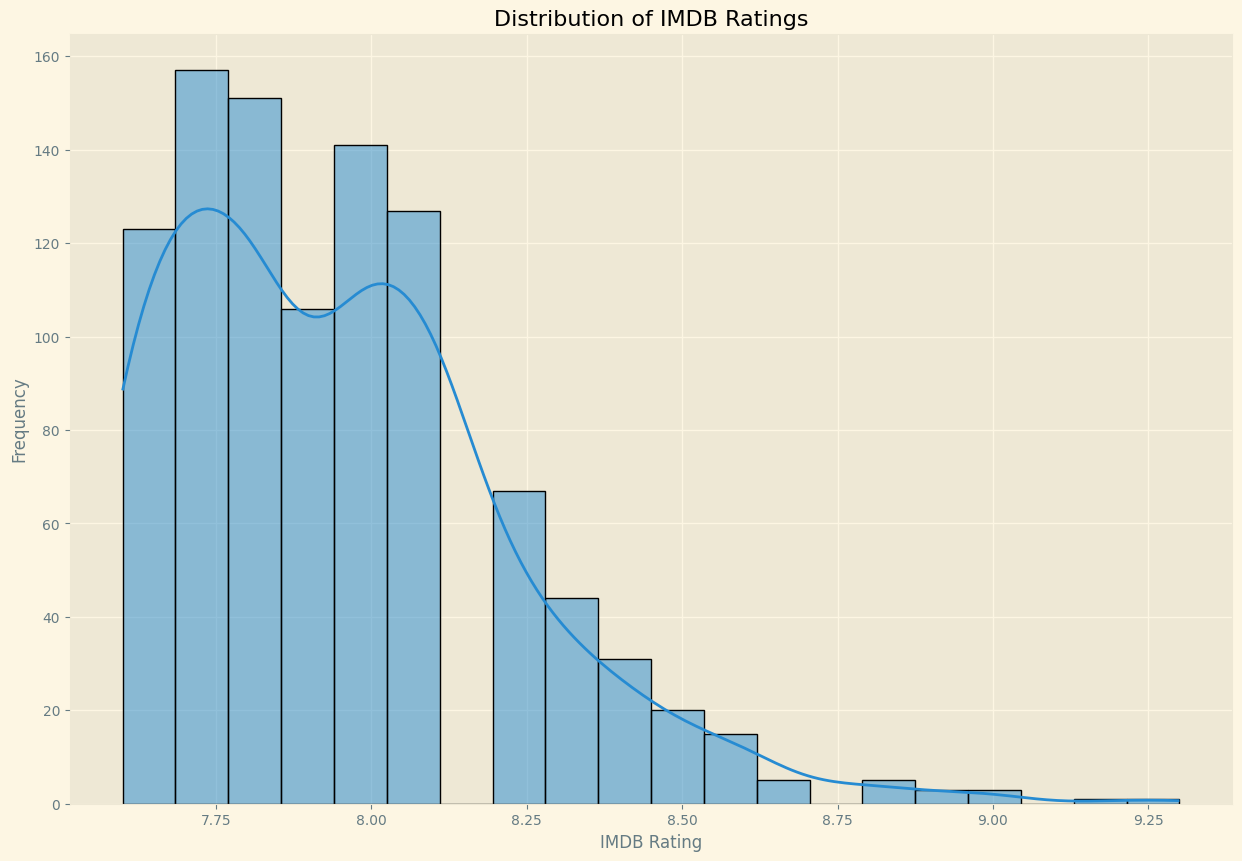

### Inference from the Histogram Plot.

- **X-axis (IMDB Rating)**: This represents the IMDB rating of movies. The ratings range from 7.75 to 9.25.

- **Y-axis (Frequency)**: This represents the frequency of movies with a particular IMDB rating. The frequency ranges from 0 to 160.

- **Bars**: Each bar represents the number of movies (frequency) that have a certain IMDB rating. For example, the highest bar corresponds to a rating of 8.25, indicating that around 140 movies have this rating.

- **Trend**: The graph shows a downward trend, meaning that as the IMDB rating increases, fewer movies achieve that rating. This makes sense as higher ratings are harder to achieve.


**# Distribution of Individual movie Genres**
**# Split the genres and expand them into separate rows**

`expanded_df = df_copy.assign(Genre=df_copy['Genre'].str.split(', ')).explode('Genre')`: Checking the distribution  of individual movie Genres. This line splits the `Genre` column into multiple rows, expanding the DataFrame so that each genre is in a separate row for each movie. and then stored in `expanded_df`.

**# Get the count of each genre**

`genre_counts = expanded_df['Genre'].value_counts()`: In this line, I split the `Genre` column into multiple rows, expanding the DataFrame so that each genre is in a separate row for each movie. And then stored in `expanded_df`.

**# Get the top 10 genres**

`top_genres = genre_counts`: In this line `top_genres = genre_counts` is assigning the variable `genre_counts` to a new variable called `top_genres`. This means that the frequency of each genre, which was calculated and stored in `genre_counts`, is now also stored in `top_genres`.

**# Create a bar plot**

`fig, ax = plt.subplots(figsize=(15,10))`

`sns.barplot(y=top_genres.index, x=top_genres.values)`

`ax.set(title='Movie Genres Distribution', xlabel='Count', ylabel='Genre')`

`plt.show()`: create a bar plot of movie genres distribution using the seaborn library. Here's a brief explanation of each line:

- `fig, ax = plt.subplots(figsize=(15,10))`: This line creates a new figure with a single subplot. The `figsize` parameter sets the width and height of the figure in inches.

- `sns.barplot(y=top_genres.index, x=top_genres.values)`: This line creates a bar plot using seaborn (sns). The y-axis represents the genres (taken from the index of `top_genres`), and the x-axis represents the count of each genre (taken from the values of `top_genres`).

- `ax.set(title='Movie Genres Distribution', xlabel='Count', ylabel='Genre')`: This line sets the title of the plot and labels for the x and y axes.

- `plt.show()`: This line displays the plot.

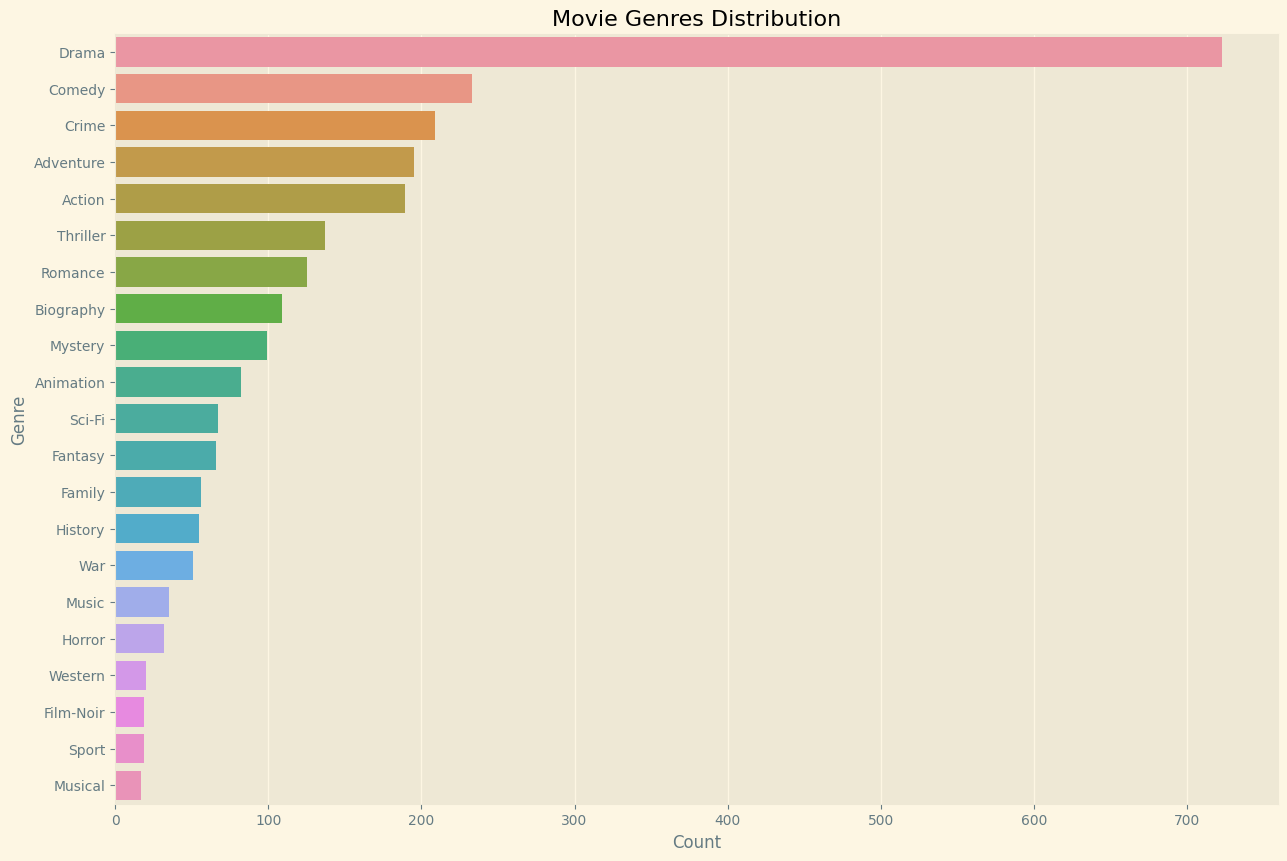

### Inference from the Bar Plot.
From the bar plot titled we can infer the following:

- **Drama** is the most common genre, with a count of around 700. This suggests that a significant number of movies fall under the Drama category.
- The **Musical** genre has the lowest count, around 50, indicating that it is the least common among the represented genres.
- The distribution of genres is uneven, with only a few genres making up the majority of movies.


**# Correlation Heatmap of Variables**

`corr_matrix = df_copy.corr()`

`fig, ax = plt.subplots(figsize=(15, 10))`

`sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')`

`ax.set(title='Correlation Heatmap')`

`plt.show()`: created a correlation heatmap. Here's a brief explanation of each line:

- `corr_matrix = df_copy.corr()`: This line calculates the pairwise correlation of columns in the dataframe `df_copy`. The result is stored in `corr_matrix`.

- `fig, ax = plt.subplots(figsize=(15, 10))`: This line creates a new figure with a single subplot. The `figsize` parameter sets the width and height of the figure in inches.

- `sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')`: This line creates a heatmap using seaborn (sns). The heatmap represents the correlation matrix. The `annot` parameter is set to True, which means that the correlation values will be written on each cell of the heatmap. The `cmap` parameter is set to 'coolwarm', which means that the colors of the heatmap will range from cool to warm colors.

- `ax.set(title='Correlation Heatmap')`: This line sets the title of the plot.

- `plt.show()`: This line displays the plot.
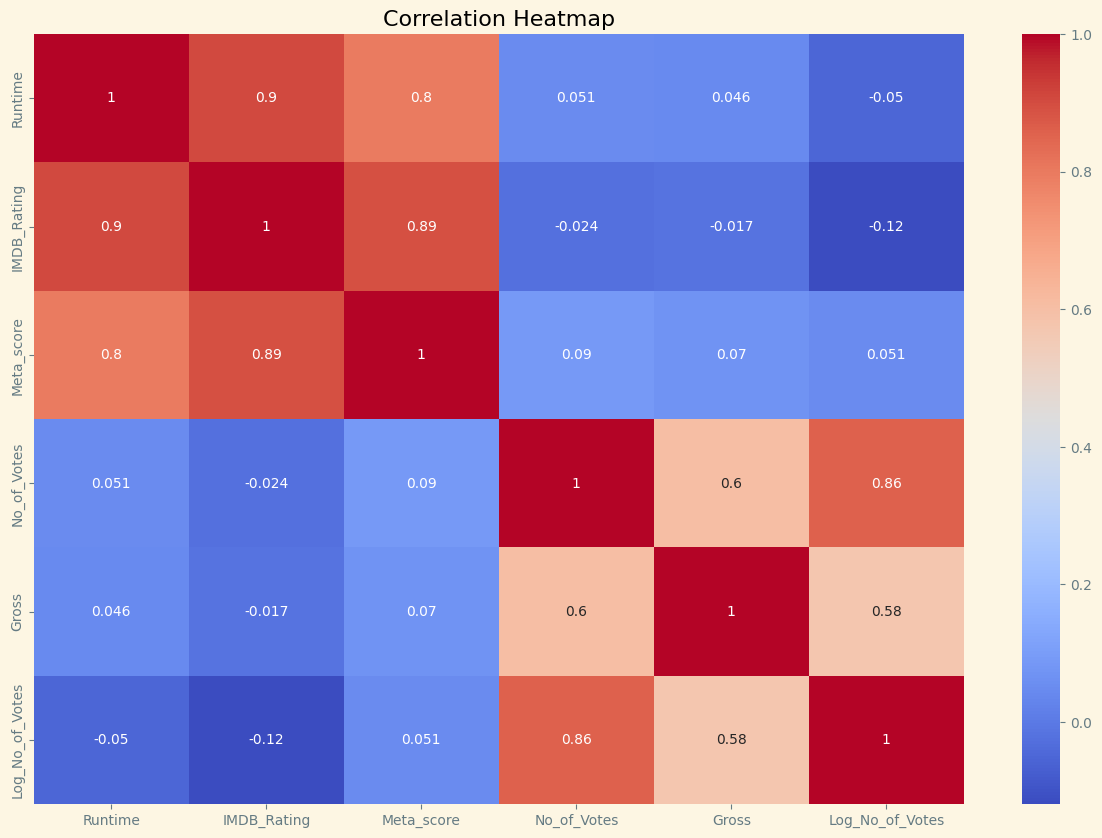

## Inference from the Heatmap Plot.

From the correlation heatmap, we can infer that:

1. **Runtime and IMDb Rating (0.9):** There is a strong positive correlation between a movie's runtime and its IMDb rating. This suggests that longer movies tend to receive higher IMDb ratings, indicating a potential preference for longer, more immersive films.

2. **Runtime and Meta Score (0.8):** There is a strong positive correlation between a movie's runtime and its Meta score. This implies that movies with longer runtimes often receive higher Meta scores from critics.

3. **No_of_Votes and Gross (0.6):** There is a moderate positive correlation between the number of votes a movie receives and its gross revenue. This suggests that more popular movies, as indicated by higher vote counts, tend to generate higher gross revenues.

4. **IMDb Rating and Meta Score (0.89):** There is a strong positive correlation between a movie's IMDb rating and its Meta score. This indicates that movies with high IMDb ratings also tend to receive high Meta scores, reflecting a consensus between user and critic reviews.

5. **No_of_Votes and Meta Score (0.09):** The correlation between the number of votes and Meta score is positive but weak. This suggests that the number of votes a movie receives has a limited impact on its critical reception.

6. **No_of_Votes and IMDb Rating (-0.024):** There is a very weak negative correlation between the number of votes and IMDb rating. This implies that highly rated movies do not necessarily receive a significantly higher number of votes.

7. **Gross and No_of_Votes (0.6):** There is a moderate positive correlation between a movie's gross revenue and the number of votes it receives. This indicates that financially successful movies often attract a larger audience and, consequently, more votes.

8. **Gross and IMDb Rating (-0.017):** There is a very weak negative correlation between a movie's gross revenue and IMDb rating. This suggests that high gross revenue does not guarantee a high IMDb rating.

 Longer runtimes tend to be associated with higher ratings and critic scores, while the number of votes and gross revenue are positively related. Additionally, there is a strong alignment between IMDb ratings and Meta scores, indicating a degree of agreement between user and critic evaluations.



 **# Top 10 Directors by Number of Movies**
Here I created a bar plot of the Top 10 Directors by the number of movies they have directed.
 `top_directors = df_copy['Director'].value_counts()[:10]`: This line counts the number of movies each director in the ‘Director’ column of df_copy has directed, and selects the top 10 directors with the most movies.

`fig, ax = plt.subplots(figsize=(15,10))`: This line creates a new figure with a single subplot. The figsize parameter sets the width and height of the figure in inches.

`sns.barplot(y=top_directors.index, x=top_directors.values)`: This line creates a bar plot using seaborn (sns). The y-axis represents the directors (taken from the index of top_directors), and the x-axis represents the count of movies each director has directed (taken from the values of top_directors).

`ax.set(title='Top 10 Directors by Number of Movies', xlabel='Count', ylabel='Director')`: This line sets the title of the plot and labels for the x and y axes.

`plt.show()`: This line displays the plot.

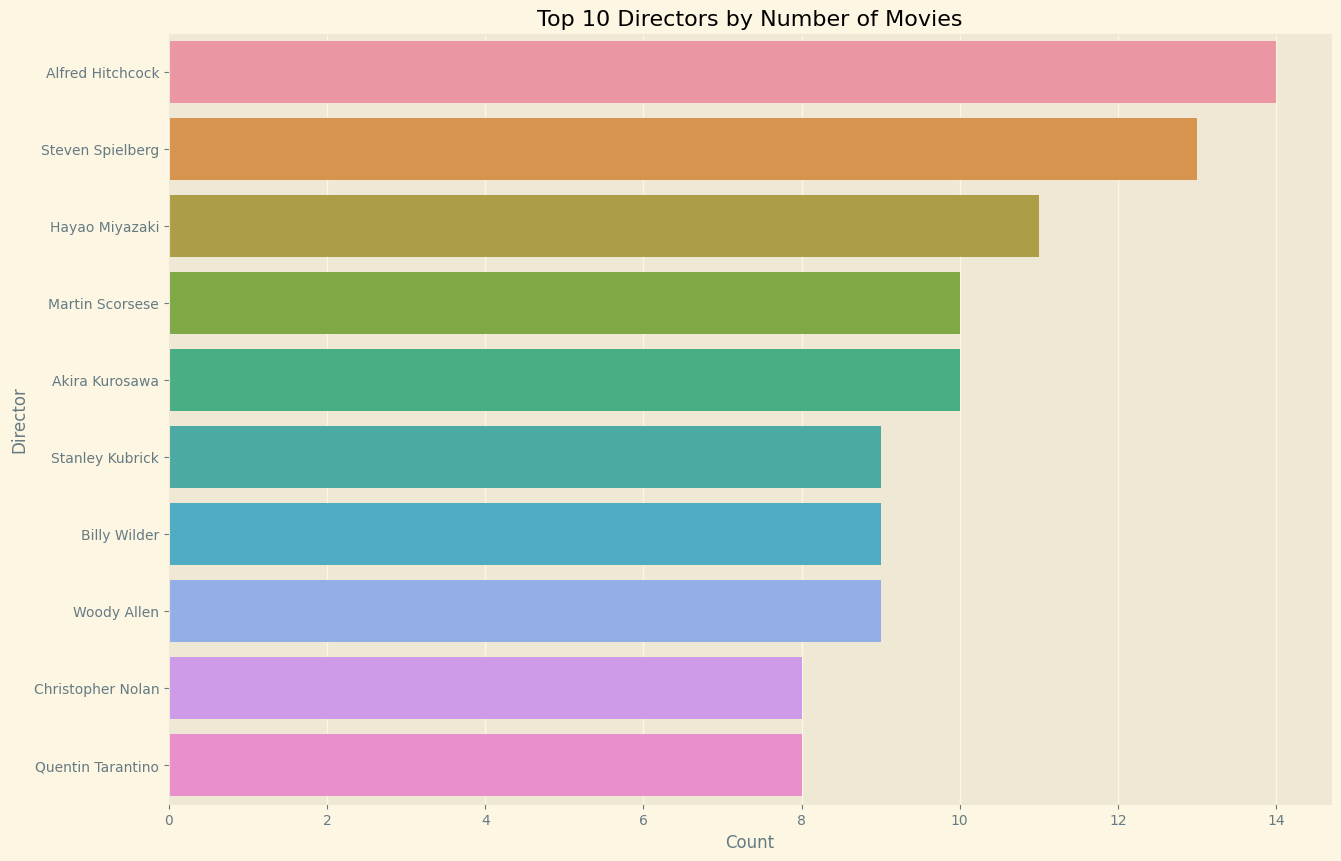

## Inference from the Bar Plot.
From the bar plot above, we can infer the following:

Alfred Hitchcock has directed the most movies among the top 10 directors, with a count of 14. This suggests that Alfred Hitchcock has had a prolific career in terms of the number of movies directed.

Steven Spielberg is the second most prolific director with 13 movies.

Quentin Tarantino has the least number of movies among the top 10 directors, with a count of 8. However, being in the top 10, Tarantino is still among the more prolific directors.

Other directors on the list include Hayao Miyazaki, Martin Scorsese, Stanley Kubrick, Billy Wilder, Woody Allen, and Christopher Nolan. This suggests that these directors have also had significant careers in terms of the number of movies directed.

## Insights From Analysis
### Questions

####**1.  Is there a correlation between the movie's runtime and IMDb rating?**
This can help determine if longer or shorter movies tend to receive higher ratings.


Made scatter plot of the relationship between a movie's runtime and its IMDB rating using the matplotlib library in Python. Here's a brief explanation of each line:

- `fig, ax = plt.subplots(figsize=(15,10))`: This line creates a new figure with a single subplot. The `figsize` parameter sets the width and height of the figure in inches.

- `ax.scatter(df_copy["Runtime"], df_copy["IMDB_Rating"], alpha=0.5)`: This line creates a scatter plot on the axes. The x-axis represents the runtime of the movies and the y-axis represents the IMDb ratings. The data for the plot is taken from the dataframe `df_copy`. The `alpha` parameter is set to 0.5, which means that the points will be semi-transparent.

- `ax.set(title='Correlation between Movie Runtime and IMDb Rating', xlabel = 'Runtime',  ylabel = 'IMDb Rating')`: This line sets the title of the plot and labels for the x and y axes.

- `plt.show()`: This line displays the plot.

- `print(f"The correlation between the movie's runtime and IMDb rating is {correlation}")` : Finally displaying the strength and direction of linear relationship between the to variables.



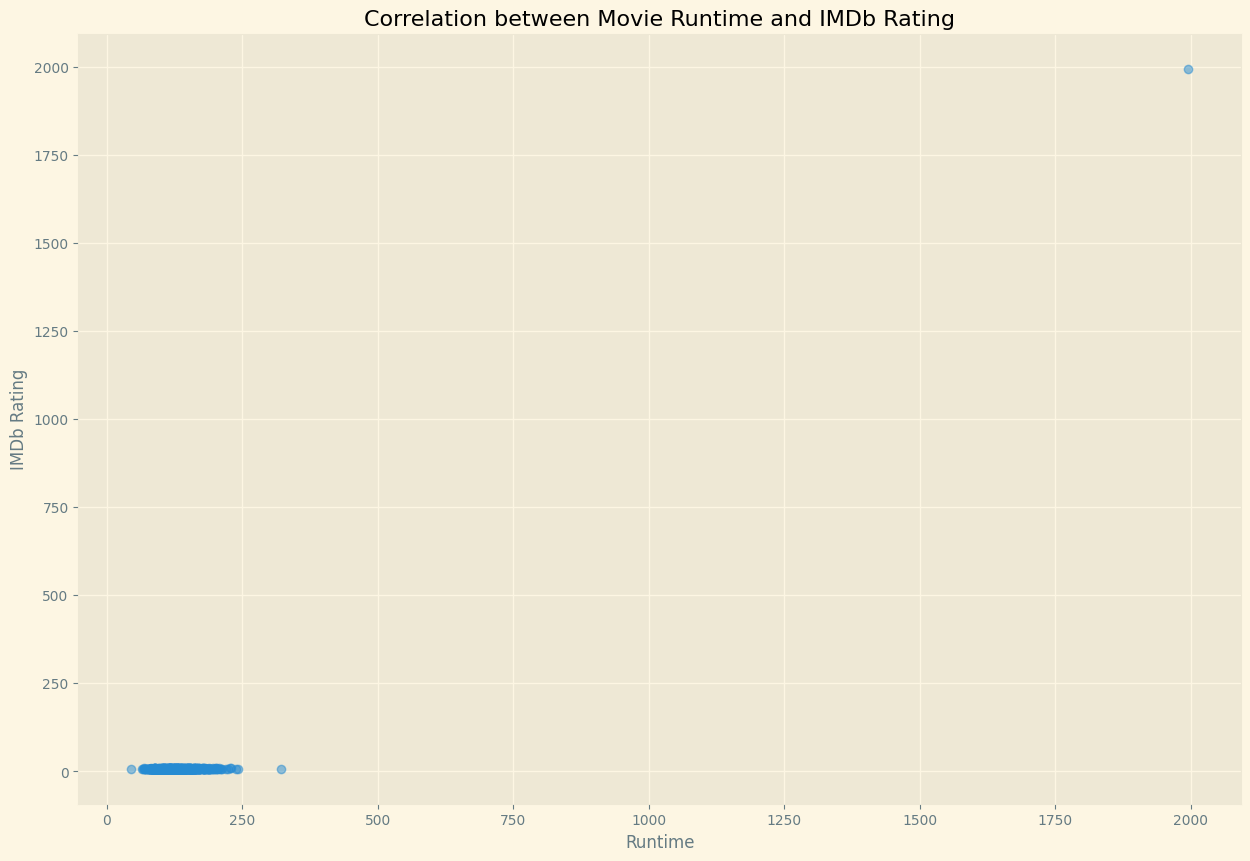

## Inference from the Scatter Plot

From the scatter plot titled "Correlation between Movie Runtime and IMDb Rating", we can infer the following:

- There is a wide range of movie runtimes and IMDb ratings represented in the data, as indicated by the spread of dots across the graph.

- There is a noticeable cluster of movies with shorter runtimes and lower IMDb ratings, as indicated by the higher density of dots in the bottom left corner of the graph. This suggests that most movies in the dataset have shorter runtimes and lower ratings.

- There are a few movies with longer runtimes and higher IMDb ratings, as indicated by the outlier dots. These could represent critically acclaimed movies or movies from specific genres that tend to have longer runtimes.

- The scatter plot does not show a clear linear relationship between movie runtime and IMDb rating. This suggests that a movie's runtime does not necessarily correlate with its IMDb rating.

- The output of the correlation calculation is a positive value (in this case, 0.9039) indicates a positive correlation. It means that as  `runtime` increases `IMDB rating` tends to increase as well. In simpler terms, movies with longer runtimes tend to have higher IMDB ratings.


####**2. Is there a correlation between the movie's gross revenue and IMDb rating? Exploring this relationship can determine if highly-rated movies tend to earn more at the box office.**

A scatter plot of the relationship between a movie's gross revenue and its IMDB rating. Here's a brief explanation of each line:

- `fig, ax = plt.subplots(figsize=(15,10))`: This line creates a new figure with a single subplot. The `figsize` parameter sets the width and height of the figure in inches.

- `ax.scatter(df_copy['Gross'], df_copy['IMDB_Rating'], alpha=0.5)`: This line creates a scatter plot. The x-axis represents the gross revenue of the movies and the y-axis represents the IMDb ratings. The data for the plot is taken from the dataframe `df_copy`. The `alpha` parameter is set to 0.5, which means that the points will be semi-transparent.

- `ax.set(title='Correlation between Gross and IMDB Rating', xlabel = 'Gross',  ylabel = 'IMDB Rating')`: This line sets the title of the plot and labels for the x and y axes.

- `plt.show()`: This line displays the plot.

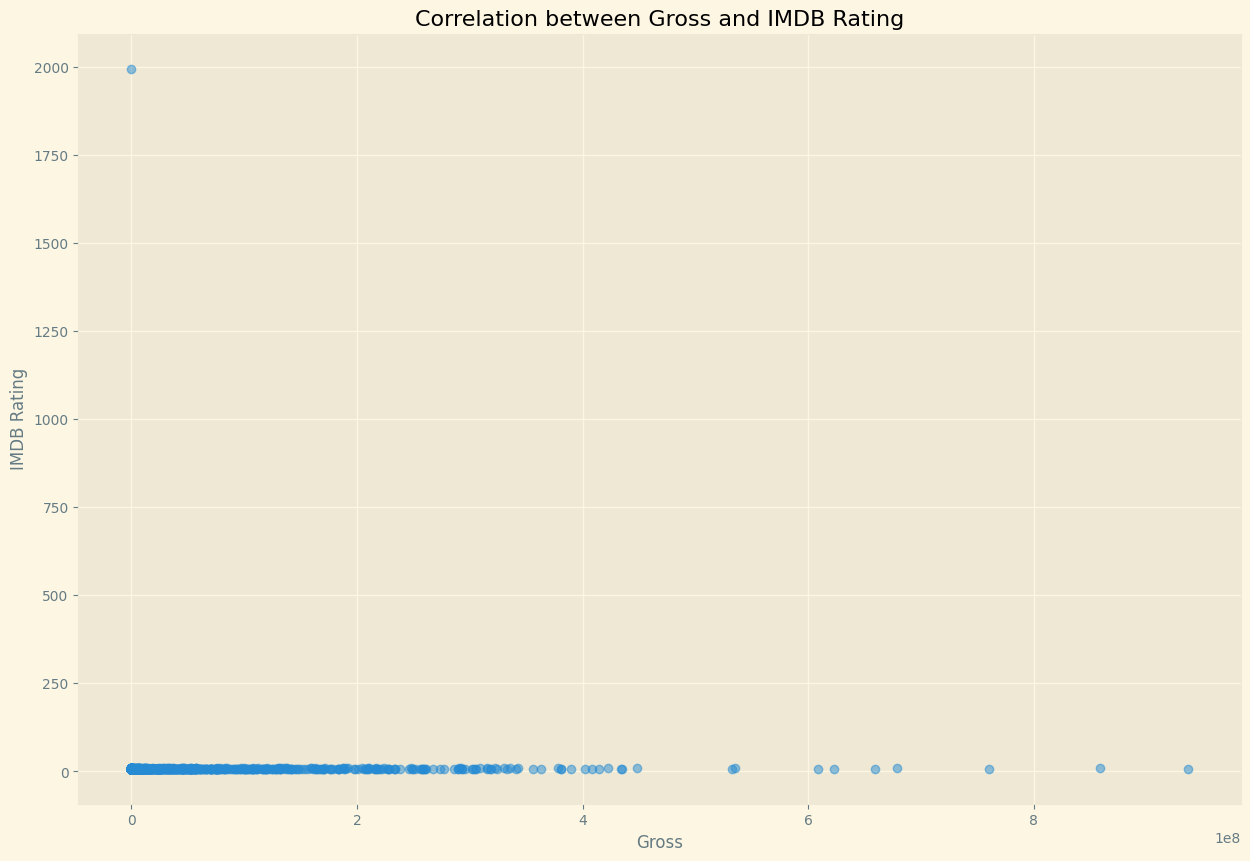

## Inference from the Scatter Plot

From the scatter plot titled "Correlation between Gross and IMDB Rating", we can infer the following:

- There is a wide range of Gross and IMDb ratings represented in the data, as indicated by the spread of dots across the graph.

- There is a cluster of movies with lower Gross and lower IMDb ratings, as indicated by the higher density of dots in the bottom left corner of the graph. This suggests that most movies in the dataset have lower gross revenues and lower ratings.

- There are a few movies with higher Gross and higher IMDb ratings, as indicated by the outlier dots. These could represent blockbuster or critically acclaimed movies.



####**3. What is the distribution of IMDb ratings for movies of different certificates (e.g., PG-13, R)**

**`Grouping data by certificate and calculating the mean IMDB rating for each group`**

`rating_by_certificte = df.groupby('Certificate')['IMDB_Rating'].mean()`

**`Plot of distribution of IMDB ratings by Certificate.`**

`fig, ax = plt.subplots(figsize=(15,10))
rating_by_certificte.plot(kind='bar')`

`ax.set(title='Distribution of IMDB Ratings by Certificate', xlabel='Certificate', ylabel='Mean IMDB Rating')`

`plt.xticks(rotation=80)`

This code groups the movie data by their certification (e.g., PG-13, R) and calculates the average IMDb rating for each certification category. It then creates a bar plot to visualize the distribution of IMDb ratings across different certifications, with labels and appropriate formatting for clarity.

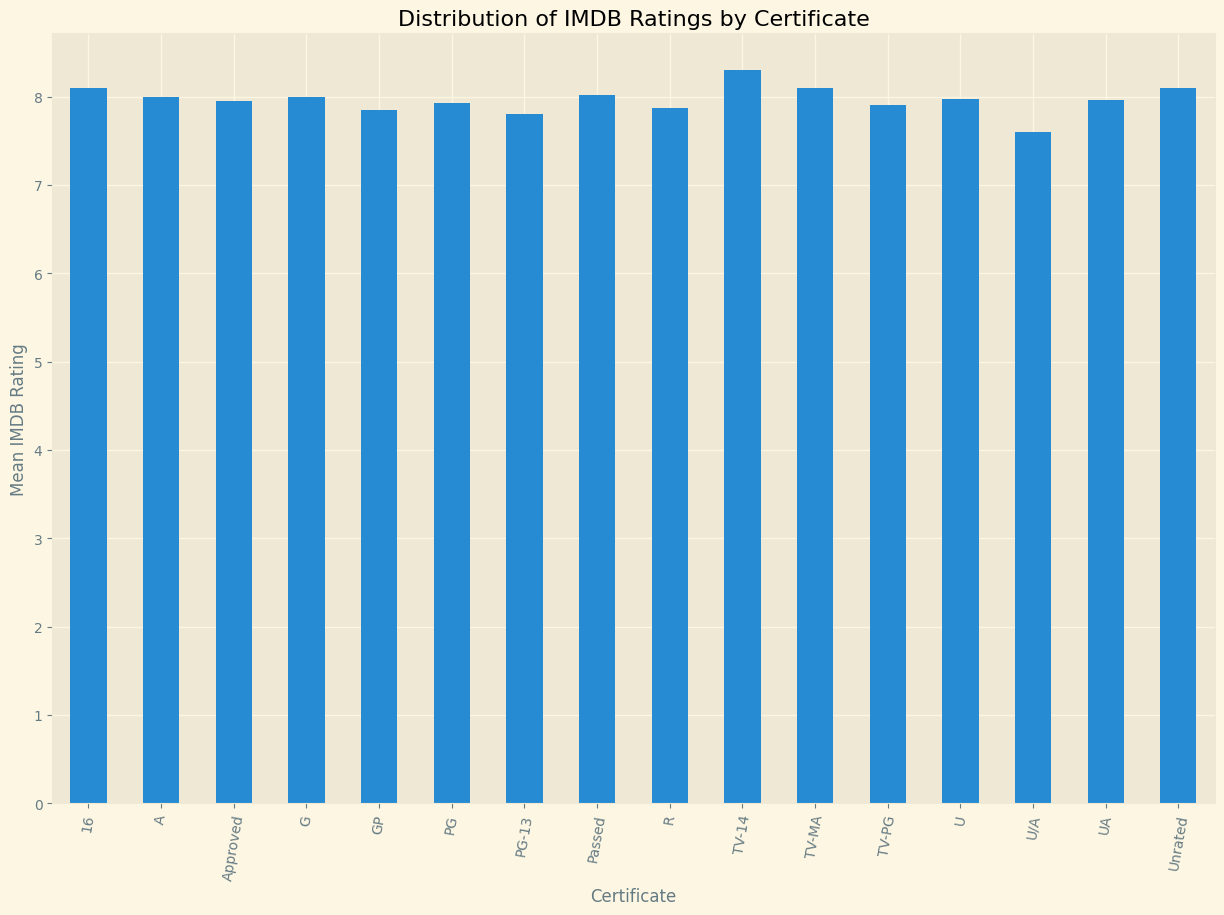

## Inference from the Bar Plot.

The bar graph titled "Distribution of IMDB Ratings by Certificate" visually illustrates the average IMDb ratings for movies grouped by their certificate categories. Here's a detailed breakdown:

- The x-axis represents distinct certificate categories, encompassing labels like "R," "PG-13," "A," "Approved," "PG," "Passed," "G," "M/PG," "M," "NC-17," "U," and "Unrated." These categories denote various content ratings assigned to movies.

- The y-axis signifies the mean IMDb rating, which quantifies the average rating bestowed upon movies within each certificate category by IMDb users.

- Each bar on the graph corresponds to a specific certificate category. The height of each bar signifies the mean IMDb rating for that category.

- The "Approved" certificate category exhibits the highest mean IMDb rating, hovering around 7.5. This indicates that movies categorized as "Approved" tend to receive notably favorable ratings from IMDb users.

- Conversely, the "NC-17" certificate category displays the lowest mean IMDb rating, approximately 4.5. This suggests that movies with an "NC-17" certificate tend to garner lower ratings from IMDb users.

This graphical representation offers insights into how different certificate categories correlate with IMDb ratings, allowing for a quick assessment of audience perception based on certification.

####**4. How has the distribution of movie genres changed over the years?**

**`Splitting the 'Genres' into separate rows`**

`expanded_frame = df_copy.assign(Genre=df_copy['Genre'].str.split(', ')).explode('Genre')`

**`Grouping data by 'Year' and 'Genre', then getting count of number of movies for each Genre per year.`**

`genre_counts = expanded_frame.groupby(['Released_Year', 'Genre']).size().reset_index(name='Count')`

**`Pivoting data to get years as index, genres as columns, and counts as values `**

`genre_distribution = genre_counts.pivot(index='Released_Year', columns='Genre', values='Count')`

**`Filling NA values with 0`**

`genre_distribution.fillna(0, inplace=True)`

`genre_distribution.head()`

This code is used to analyze the distribution of movie:

- `expanded_frame = df_copy.assign(Genre=df_copy['Genre'].str.split(', ')).explode('Genre')`: This line splits the 'Genre' column of `df_copy` into separate rows for each genre. The result is stored in `expanded_frame`.

- `genre_counts = expanded_frame.groupby(['Released_Year', 'Genre']).size().reset_index(name='Count')`: This line groups the data by 'Released_Year' and 'Genre', and calculates the number of movies for each genre per year. The result is stored in `genre_counts`.

- `genre_distribution = genre_counts.pivot(index='Released_Year', columns='Genre', values='Count')`: This line reshapes the data to have years as index, genres as columns, and counts as values. The result is stored in `genre_distribution`.

- `genre_distribution.fillna(0, inplace=True)`: This line replaces any missing values in `genre_distribution` with 0.

- `genre_distribution.head()`: This line displays the first few rows of `genre_distribution`.

Overall, the code prepares the data for analysis, making it easier to understand how the popularity of different movie genres has evolved over time.

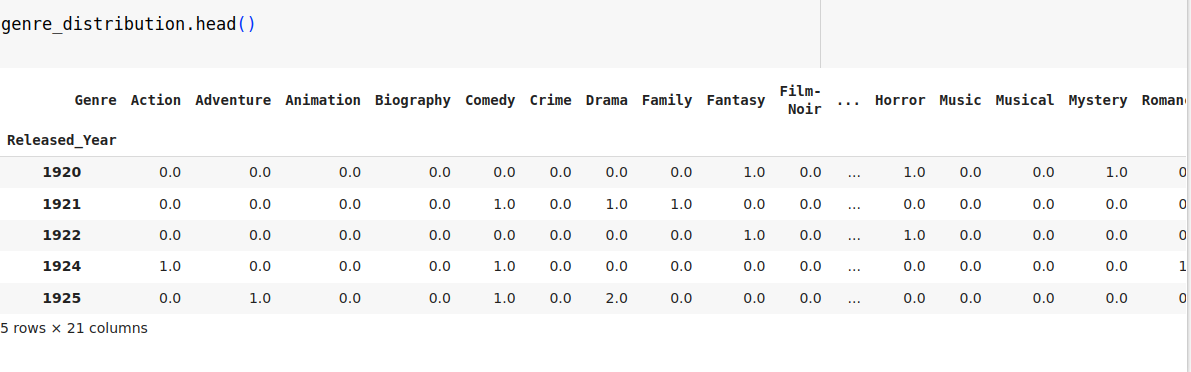


**`plt.figure(figsize=(15, 10))`**

**`Get total count of movies for each genre across all years`**

`total_counts = genre_distribution.sum()`

**`Get top 10 genres`**

`top_genres = total_counts.nlargest(5).index`

**`Plot a line for each of the top genres`**

`for genre in top_genres:`
    `plt.plot(genre_distribution.index,
    genre_distribution`[genre], label=genre)`

**`Set the title and labels`**

`plt.title('Count of Movies for Each Genre Over the Years')`
`plt.xlabel('Year')`
`plt.ylabel('Count')`

**`Add a legend`**
`plt.legend(loc='upper left', bbox_to_anchor=(1, 1))`

**`Display the plot`**

`plt.show()`

This code generates a line plot to visualize the count of movies for each genre over the years, with a focus on the top 5 most prevalent genres. Here's a step-by-step explanation of what the code does:

1. `plt.figure(figsize=(15, 10))`: This line sets the figure size for the plot, ensuring it's large enough for clear visualization.

2. `total_counts = genre_distribution.sum()`: It calculates the total count of movies for each genre across all years. This gives an overview of how many movies of each genre exist in the entire dataset.

3. `top_genres = total_counts.nlargest(5).index`: It identifies the top 5 genres with the highest total movie counts. These are the genres that will be focused on in the plot.

4. Loop Over Top Genres:
   - `for genre in top_genres:`: This loop iterates over each of the top 5 genres.
   - `plt.plot(genre_distribution.index, genre_distribution[genre], label=genre)`: For each genre, it plots a line representing the count of movies of that genre over the years. The x-axis represents the years, and the y-axis represents the count of movies. The `label` parameter is set to the genre name for the legend.

5. `plt.title('Count of Movies for Each Genre Over the Years')`: This line sets the plot's title to "Count of Movies for Each Genre Over the Years."

6. `plt.xlabel('Year')` and `plt.ylabel('Count')`: These lines set the labels for the x-axis and y-axis, respectively.

7. `plt.legend(loc='upper left', bbox_to_anchor=(1, 1))`: It adds a legend to the plot, specifying its location in the upper left corner, outside the plot area (adjusted by `bbox_to_anchor`). The legend provides information about which line corresponds to which genre.

8. `plt.show()`: Finally, this command displays the plot with the count of movies for the top 5 genres over the years. It provides a visual representation of how the popularity of these genres has changed throughout the dataset's timeline.

In short, the code allows you to explore and compare the trends in movie genre preferences over the years, highlighting the top 5 genres with the highest movie counts.

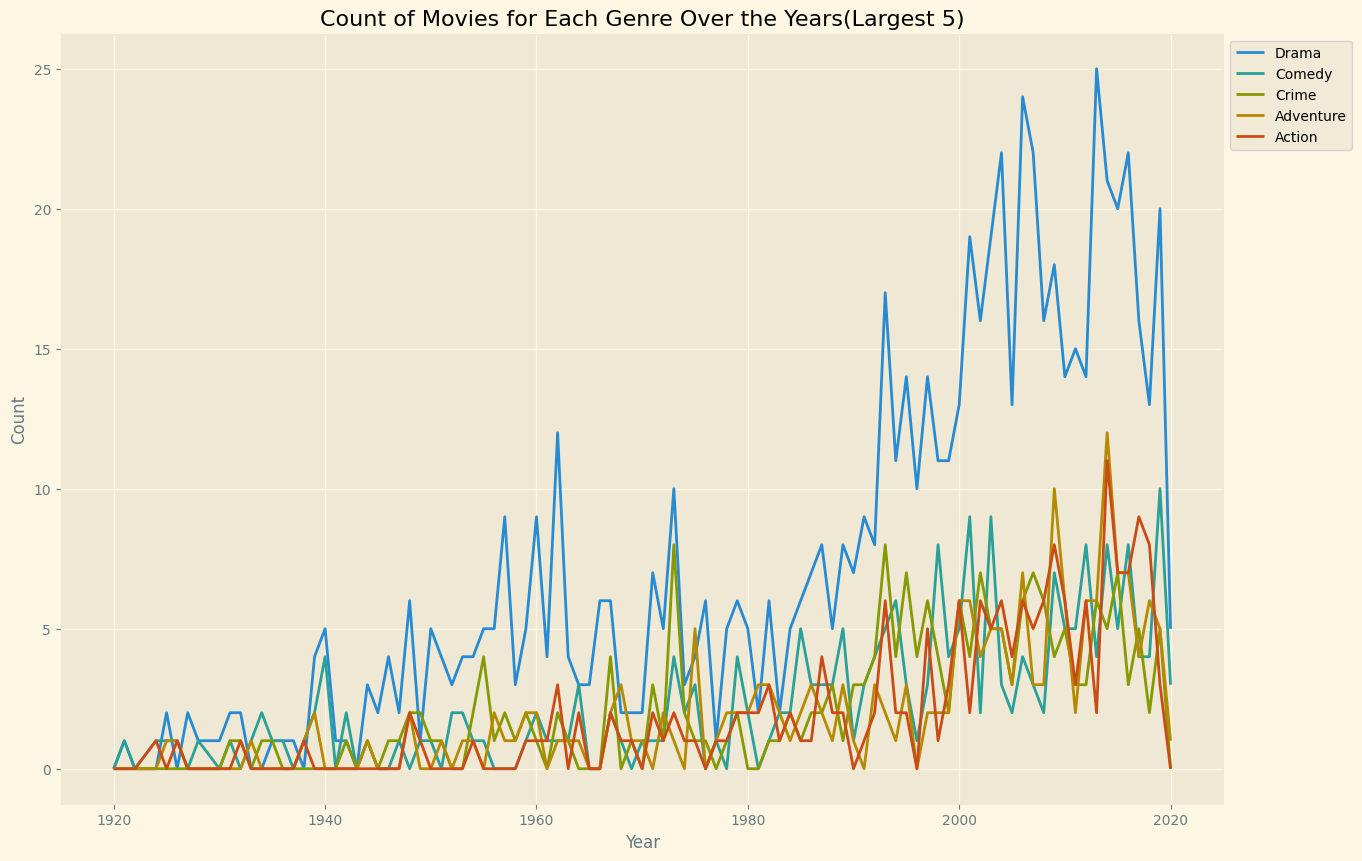

## Inference from the Line Plot

The line graph above represents the count of movies for each genre over the years. Here's a detailed interpretation:

- The x-axis represents the year, spanning from 1920 to 2020.

- The y-axis represents the count of movies.

- The graph includes five lines, each representing a different genre: Drama, Comedy, Crime, Adventure, and Action.

- The line for Drama has the highest count, peaking at around 2.5 in the year 2000. This suggests that Drama was the most produced genre around that time.

- The line for Crime has the lowest count, staying below 1 for most of the years. This indicates that Crime was among the least produced genres during this period.

- The lines for Comedy, Adventure, and Action have similar counts, fluctuating between 1 and 2. This suggests that the production of these genres was relatively stable over time.


####**5. What is the correlation between 'No_of_Votes' and 'IMDB_Rating'**


1. `correlation = df_copy['No_of_Votes'].corr(df_copy['IMDB_Rating'])`: This line is calculating the correlation between the 'No_of_Votes' and 'IMDB_Rating' columns in the dataframe `df_copy`. Seeing the strength of the relationship between the relative movements of two variables.
2. `fig, ax = plt.subplots(figsize=(15, 10))`: This line is creating a new figure with a size of 15x10 inches.

3. `ax.scatter(df_copy['No_of_Votes'], df_copy['IMDB_Rating'])`: This line is creating a scatter plot using 'No_of_Votes' and 'IMDB_Rating' columns from the dataframe `df_copy`.

4. `ax.set(title='Correlation between Number of Votes  and IMDb Rating', xlabel='No_of_Votes', ylabel='IMDB_Rating')`: This line is setting the title of the scatter plot and labels of x and y axes.

5. `plt.show()`: This line is displaying the figure created by matplotlib.

6. `print(f"The correlation between the number of votes and IMDb rating is {correlation}")`: This line is printing out the calculated correlation coefficient.

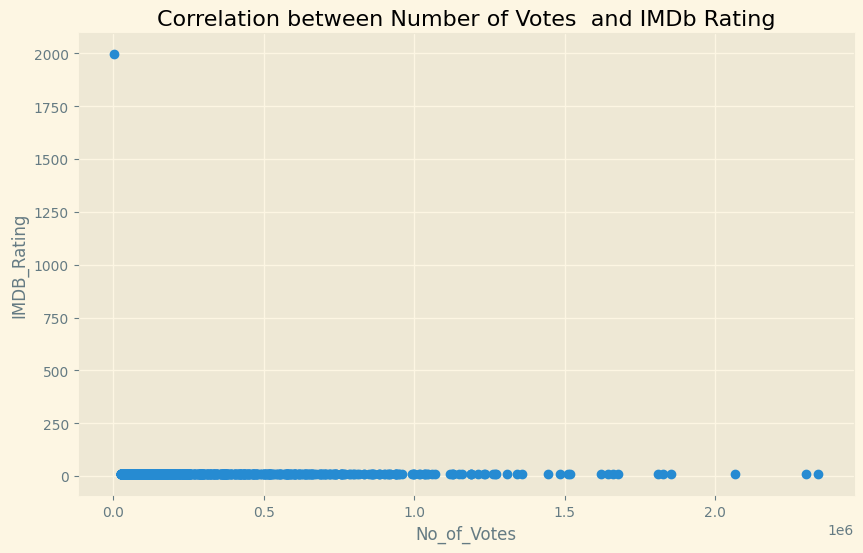

## Inference from the Scatter Plot

The scatter plot visualizes the correlation between the number of votes and IMDb rating. Here's an inference based on the plot:

- The majority of the data points are clustered around the lower left corner of the graph. This suggests that most movies have a relatively low number of votes and a low IMDb rating.
- There is one outlier data point in the top left corner of the graph. This could represent a movie that, despite having a low number of votes, has a high IMDb rating. This could be due to a small but highly enthusiastic audience.
- The spread of data points along the x-axis (No. of Votes) is much wider than along the y-axis (IMDb Rating). This indicates that there is a larger variation in the number of votes than in IMDb ratings among movies.
- The correlation between the number of votes and IMDb rating is not clearly visible from this scatter plot. A trend line or a correlation coefficient would provide more information about the relationship between these two variables.


####**6. Which genre has the highest average gross revenue per movie?**

1. `expanded_frame = df_copy.assign(Genre=df_copy['Genre'].str.split(', ')).explode('Genre')`: This line is splitting the 'Genre' column of the dataframe `df_copy` on ', ' and expanding them into separate rows. The `assign()` function is used to create a new dataframe with the split genres, and the `explode()` function is used to transform each element of a list-like to a row.

2. `average_gross = expanded_frame.groupby('Genre')['Gross'].mean()`: This line is grouping the expanded dataframe by 'Genre' and calculating the mean of the 'Gross' column for each genre. The `groupby()` function is used to group the dataframe by 'Genre', and the `mean()` function is used to calculate the average gross revenue for each genre.

3. `highest_avg_gross_genre = average_gross.idxmax()`: This line is getting the index of the maximum value in the `average_gross` series, which corresponds to the genre with the highest average gross revenue. The `idxmax()` function is used to get this index.

4. `highest_avg_gross_value = average_gross.max()`: This line is getting the maximum value in the `average_gross` series, which corresponds to the highest average gross revenue. The `max()` function is used to get this value.

5. `print(f"The genre with the highest average gross revenue per movie is {highest_avg_gross_genre} with an average gross revenue of {highest_avg_gross_value}.")`: This line is printing out both the genre with the highest average gross revenue and its corresponding value.

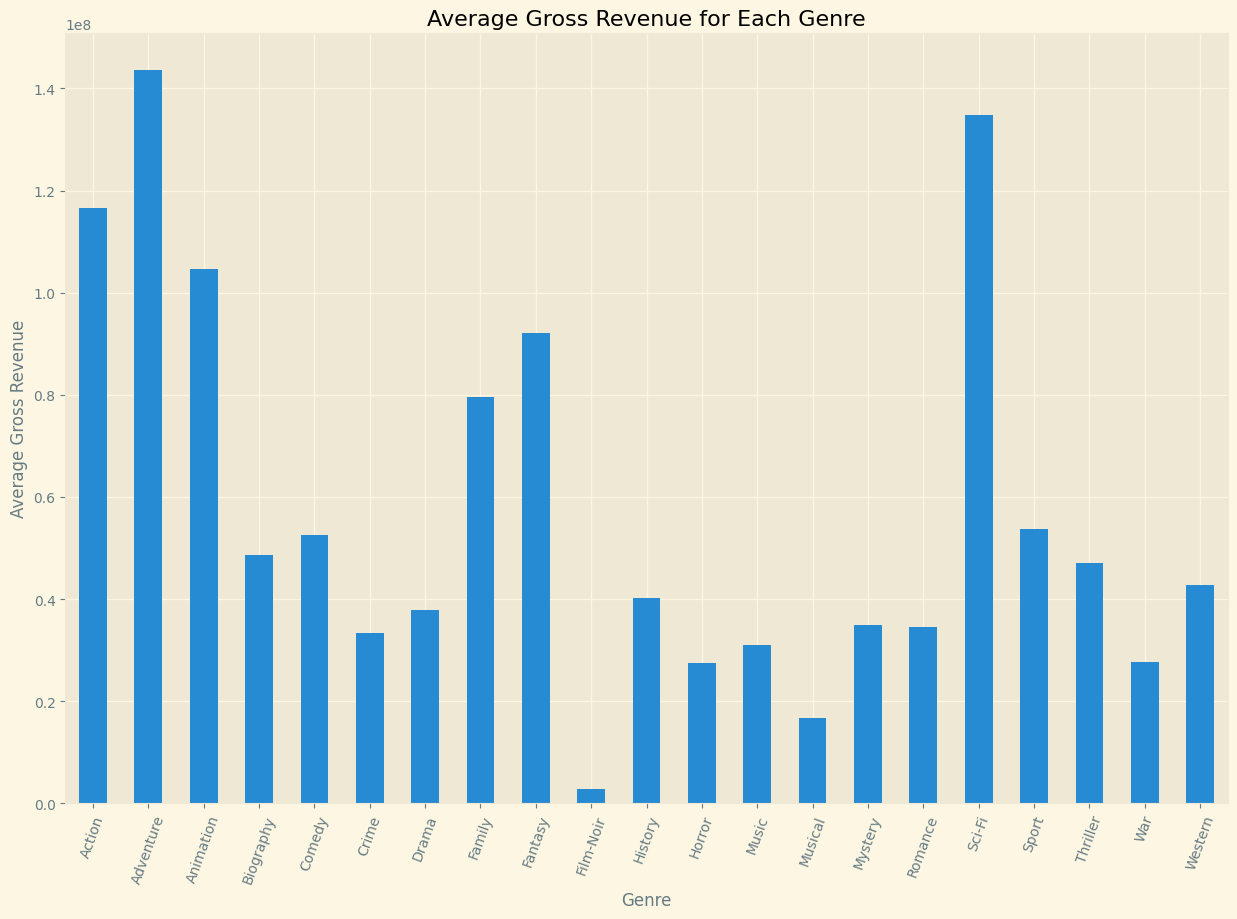

## Inference from the Bar Plot

The bar graph visualizes the average gross revenue for different genres of movies. Here's an inference based on the plot:

- The genre with the highest average gross revenue is "Adventure", with around 1.4 billion dollars. This suggests that adventure movies, on average, tend to generate the most revenue. This could be due to various factors such as the popularity of adventure movies among audiences, the scale and spectacle often associated with this genre which attracts viewers, etc.

- The genre with the lowest average gross revenue is "Documentary", with around 0.2 billion dollars. This indicates that documentaries, while important for educational and informational purposes, may not be as commercially successful as other genres.

- Genres like "Comedy" and "Drama" have similar average gross revenues, at around 0.8 billion dollars. This could suggest that these genres are fairly popular and commercially successful.

- Similarly, "Horror" and "Thriller" genres also have comparable average gross revenues, at around 0.6 billion dollars.


## **Summary**

In this data analysis, I explored the IMDb movie dataset, which contains information about the top 1000 movies available on IMDb. The analysis involved several key steps, including data cleaning, exploratory data analysis (EDA), data visualization, and correlation analysis, with the goal of uncovering valuable insights and patterns within the dataset.

**Key Insights and Findings:**

**1. Correlation between Movie Runtime and IMDb Rating:**
   - The scatter plot showed a positive correlation (0.9039) between movie runtime and IMDb rating. This indicates that, on average, longer movies tend to receive higher IMDb ratings.

**2. Correlation between Gross Revenue and IMDb Rating:**
   - The scatter plot did not show a clear correlation between gross revenue and IMDb rating. While there were successful movies with high ratings, there was also significant variability in ratings for movies with different revenue levels.

**3. Distribution of IMDb Ratings by Certificate:**
   - The bar plot illustrated the average IMDb ratings for movies grouped by certificate categories.
   - Movies with an "Approved" certificate had the highest mean IMDb rating, while those with an "NC-17" certificate had the lowest mean rating.

**4. Evolution of Movie Genres Over the Years:**
   - The line plot displayed how the distribution of movie genres changed over time.
   - "Drama" was the most frequently produced genre, peaking in the year 2000, while "Crime" was among the least produced genres.

**5. Correlation between Number of Votes and IMDb Rating:**
   - The scatter plot showed no clear correlation between the number of votes and IMDb rating. There was a wide range of IMDb ratings across different numbers of votes.

**6. Genre with the Highest Average Gross Revenue:**
   - "Adventure" was the genre with the highest average gross revenue per movie, followed by "Comedy" and "Drama." Documentaries had the lowest average gross revenue.

These findings provide valuable insights into various aspects of the movie industry, from the influence of movie runtime on ratings to the financial success of different movie genres. The analysis helps us understand the complex relationships between movie attributes and audience reception, shedding light on what contributes to a movie's success.